In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('./dataset/train.csv')

In [2]:
data = np.array(data)
m, n = data.shape

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [3]:
def init_params():
    W1 = np.random.rand(20, 784) - 0.5
    b1 = np.random.rand(20, 1) - 0.5
    W2 = np.random.rand(10, 20) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    W3 = np.random.rand(10, 10) - 0.5
    b3 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2 , W3, b3

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, W3, b3, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = ReLU(Z2)
    Z3 = W3.dot(A2) + b3
    A3 = softmax(Z3)
    return Z1, A1, Z2, A2 , Z3, A3


def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y):
    one_hot_Y = one_hot(Y)
    dZ3 = A3 - one_hot_Y
    dW3 = 1 / m * dZ3.dot(A2.T)
    db3 = 1 / m * np.sum(dZ3)
    dZ2 = W3.T.dot(dZ3) * ReLU_deriv(Z2)
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2 , dW3, db3

def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2
    W3 = W3 - alpha * dW3
    b3 = b3 - alpha * db3    
    return W1, b1, W2, b2 , W3, b3

In [4]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 , W3, b3= init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
        dW1, db1, dW2, db2 , dW3, db3= backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y)
        W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A3)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2 , W3, b3

In [5]:
W1, b1, W2, b2, W3, b3 = gradient_descent(X_train, Y_train, 0.5, 1000)

Iteration:  0
[0 9 9 ... 0 5 0] [1 5 1 ... 7 6 9]
0.06460975609756098
Iteration:  10
[1 9 1 ... 7 6 4] [1 5 1 ... 7 6 9]
0.4631707317073171
Iteration:  20
[1 9 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.5995609756097561
Iteration:  30
[1 8 1 ... 7 6 4] [1 5 1 ... 7 6 9]
0.6282926829268293
Iteration:  40
[1 9 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.7143658536585366
Iteration:  50
[1 4 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.7373170731707317
Iteration:  60
[1 8 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.7652439024390244
Iteration:  70
[1 8 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.7877560975609756
Iteration:  80
[1 8 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.794219512195122
Iteration:  90
[1 8 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.7608536585365854
Iteration:  100
[1 8 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.8428048780487805
Iteration:  110
[1 8 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.8195121951219512
Iteration:  120
[1 8 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.850390243902439
Iteration:  130
[1 8 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.8496829268292683
Iteration:  140
[1

In [6]:
def make_predictions(X, W1, b1, W2, b2, W3, b3):
    _, _, _, A2, _, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
    predictions = get_predictions(A3)
    return predictions

def test_prediction(index, W1, b1, W2, b2 , W3, b3):
    current_image = X_train[:, index, None]
    
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2, W3, b3)
    label = Y_train[index]
    print("Prediction: ", prediction,current_image.shape)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1] (784, 1)
Label:  1


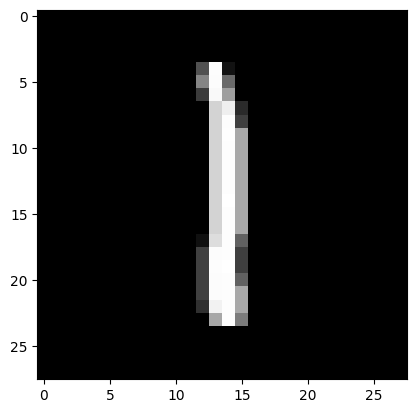

Prediction:  [5] (784, 1)
Label:  5


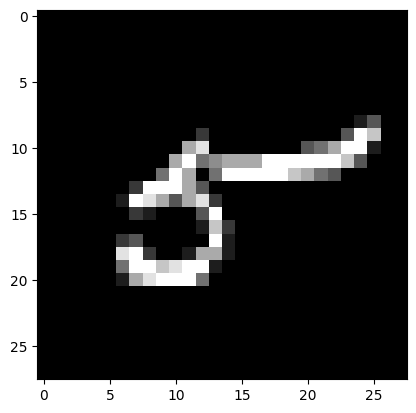

Prediction:  [1] (784, 1)
Label:  1


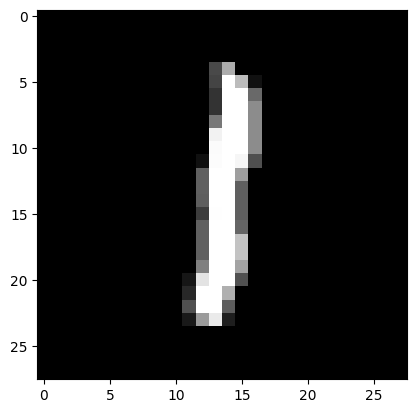

Prediction:  [7] (784, 1)
Label:  7


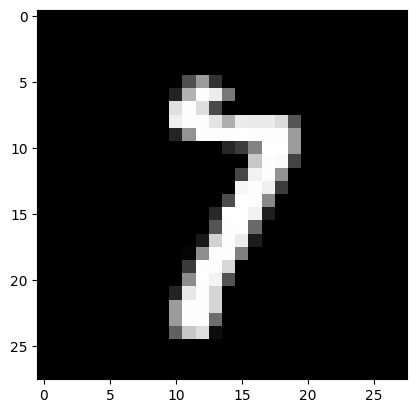

In [7]:
test_prediction(0, W1, b1, W2, b2, W3, b3)
test_prediction(1, W1, b1, W2, b2, W3, b3)
test_prediction(2, W1, b1, W2, b2, W3, b3)
test_prediction(3, W1, b1, W2, b2, W3, b3)

In [8]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2, W3, b3)
get_accuracy(dev_predictions, Y_dev)

[1 0 1 4 0 0 7 3 5 3 8 9 1 3 3 1 2 0 7 6 8 6 2 0 2 3 6 9 9 7 8 9 4 9 2 1 3
 1 1 4 9 1 4 9 2 6 3 7 7 4 7 5 1 9 0 2 2 3 9 1 6 1 5 0 6 3 4 8 1 0 3 9 6 3
 6 4 7 1 4 1 5 4 8 9 2 9 9 8 9 6 5 6 4 6 2 9 1 2 0 5 9 2 7 7 5 8 8 5 0 6 0
 0 2 9 0 4 7 7 1 5 7 9 4 6 1 2 7 6 5 0 4 7 7 6 1 8 7 3 7 2 1 0 3 4 5 4 0 5
 4 0 3 5 1 0 8 3 7 0 9 6 6 8 5 4 6 9 3 5 4 2 8 8 7 9 5 8 8 8 3 6 9 3 1 0 4
 1 5 9 0 6 2 1 7 0 6 0 0 8 3 2 0 0 6 0 0 4 7 2 7 1 9 9 3 9 8 4 6 6 1 3 8 1
 8 7 1 3 7 6 3 6 3 6 3 2 3 3 2 7 9 2 2 2 7 5 5 8 8 2 0 1 4 0 6 3 7 1 1 1 4
 7 0 2 4 2 0 5 6 0 8 9 6 2 0 0 7 2 0 4 2 0 9 1 6 9 3 0 0 2 0 6 8 4 0 7 2 1
 9 5 2 4 8 5 2 9 7 9 2 9 7 4 9 3 6 7 3 6 3 6 8 8 3 7 0 9 2 7 9 0 5 4 5 8 4
 3 3 1 7 8 9 7 2 2 1 7 0 5 6 5 2 9 5 4 6 2 2 2 9 0 7 7 2 2 6 3 4 2 0 5 9 6
 2 1 9 0 6 0 4 6 4 3 1 5 4 2 9 5 7 3 1 5 4 5 3 7 3 8 6 2 4 6 1 1 4 0 0 5 8
 6 7 4 2 8 0 2 5 4 8 3 0 4 4 8 6 4 1 8 1 5 4 7 4 3 2 0 6 0 7 9 2 9 8 9 6 5
 2 4 4 6 4 8 4 1 7 5 8 9 5 9 3 7 3 8 2 2 7 2 8 9 1 9 3 6 0 2 2 4 1 2 7 2 1
 3 4 9 1 8 0 2 2 3 4 1 3 

np.float64(0.944)

In [9]:
df_test  = pd.read_csv('./dataset/test.csv')

In [10]:
def test_prediction2(index, W1, b1, W2, b2 , W3, b3):
    current_image = df_test[:, index, None]
    prediction = make_predictions(df_test[:, index, None], W1, b1, W2, b2, W3, b3)
    print("Prediction: ", prediction)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

In [11]:
df_test = np.array(df_test).T

Prediction:  [0]


/tmp/ipykernel_49471/2709749436.py:14: RuntimeWarning: overflow encountered in exp
  A = np.exp(Z) / sum(np.exp(Z))
/tmp/ipykernel_49471/2709749436.py:14: RuntimeWarning: invalid value encountered in divide
  A = np.exp(Z) / sum(np.exp(Z))


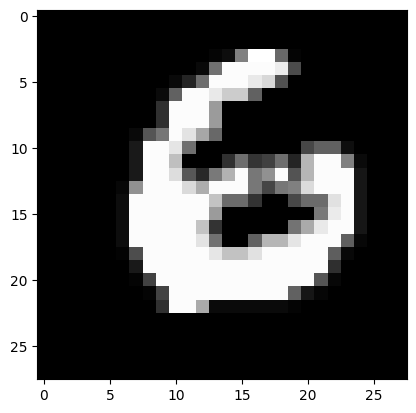

Prediction:  [3]


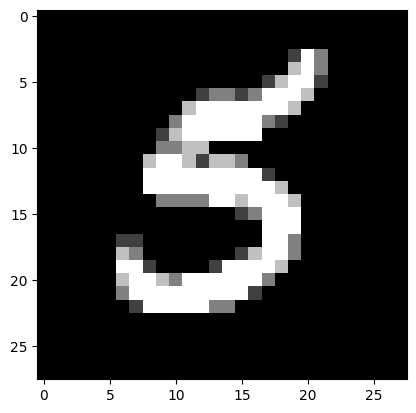

Prediction:  [4]


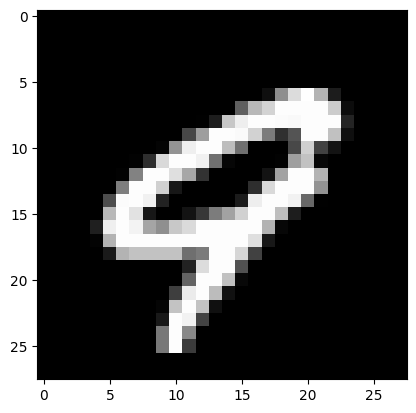

Prediction:  [4]


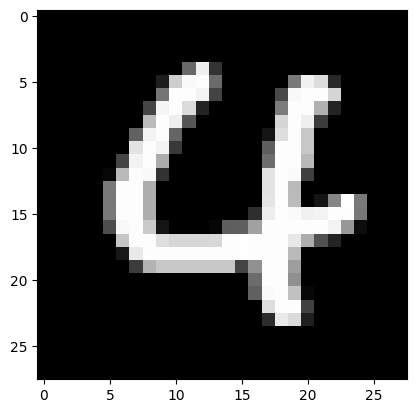

Prediction:  [1]


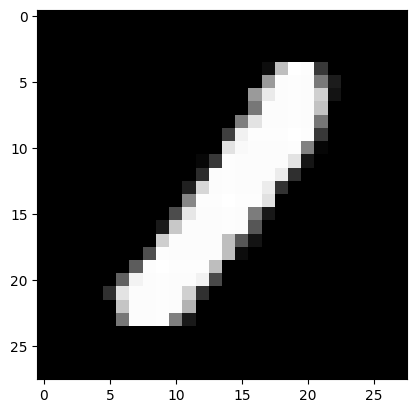

Prediction:  [2]


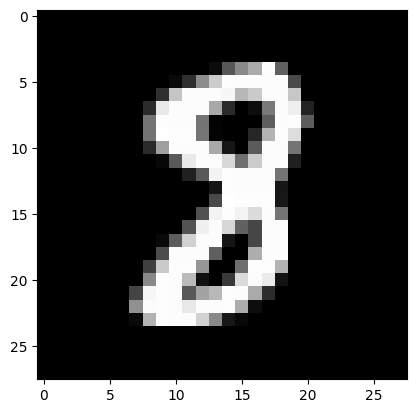

Prediction:  [3]


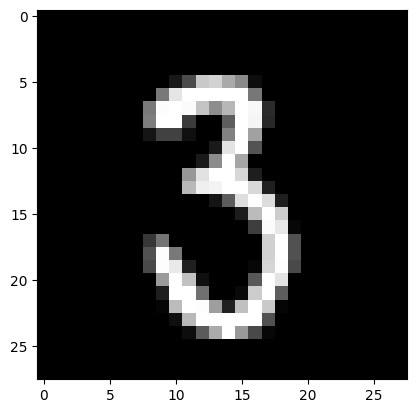

Prediction:  [3]


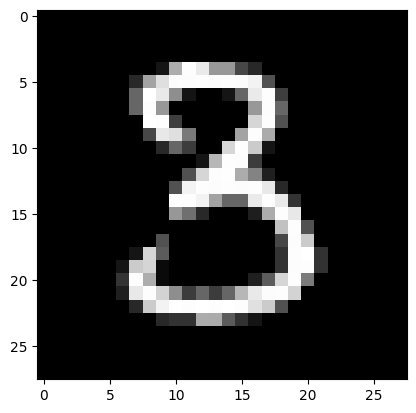

Prediction:  [0]


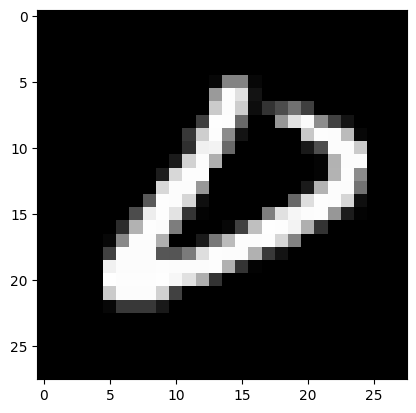

Prediction:  [5]


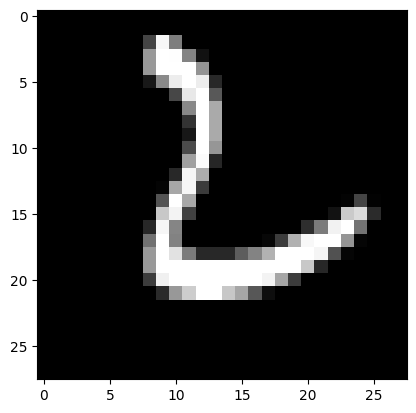

Prediction:  [7]


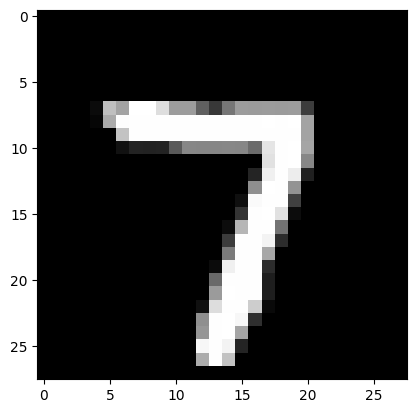

Prediction:  [5]


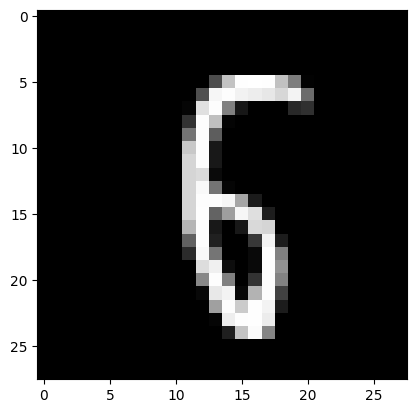

Prediction:  [5]


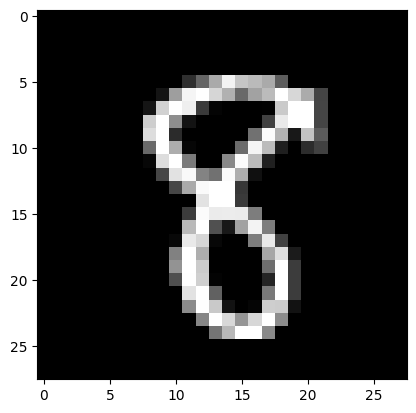

Prediction:  [3]


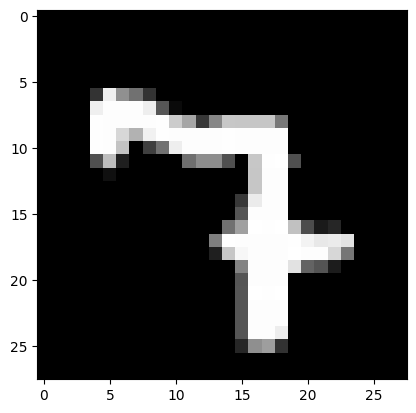

Prediction:  [3]


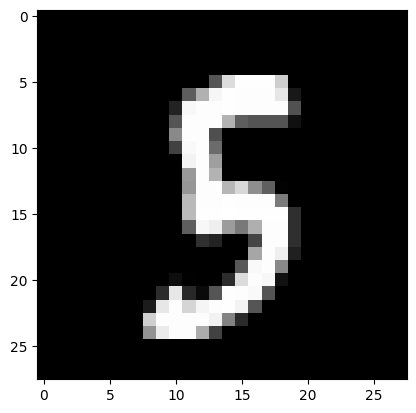

Prediction:  [1]


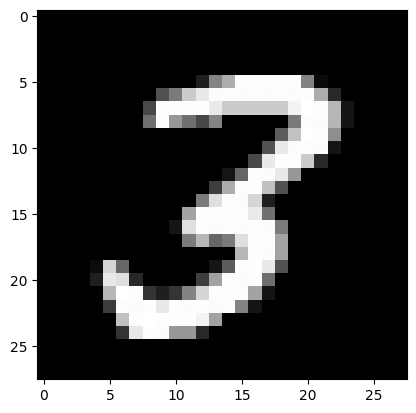

Prediction:  [1]


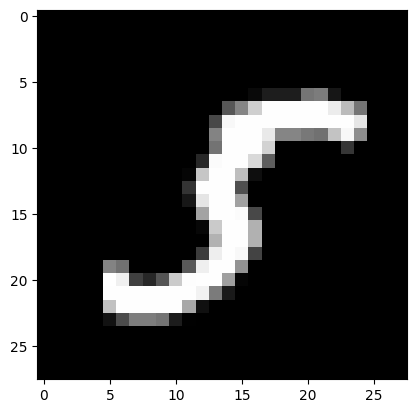

Prediction:  [3]


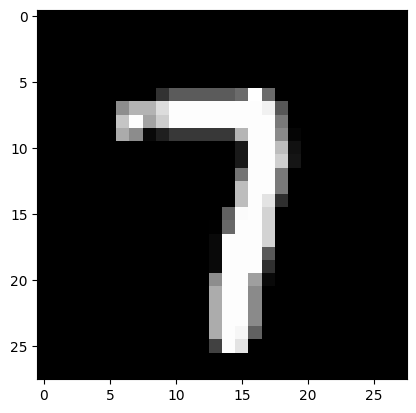

Prediction:  [4]


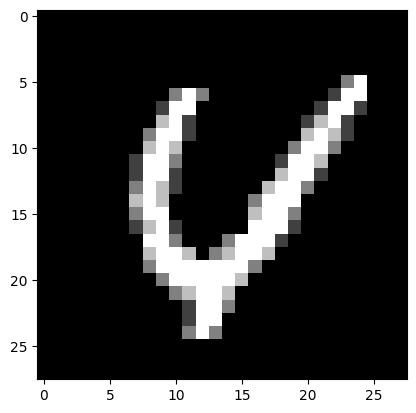

Prediction:  [2]


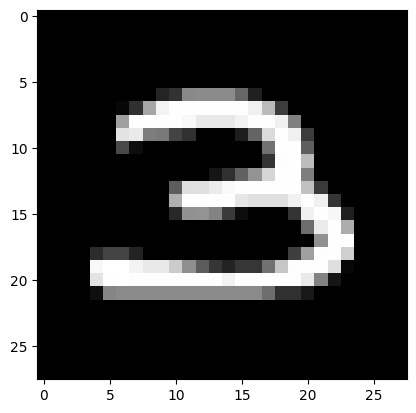

Prediction:  [6]


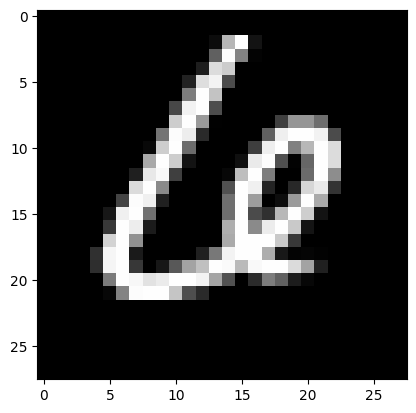

Prediction:  [4]


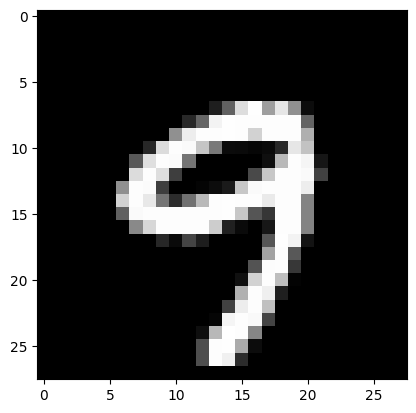

Prediction:  [0]


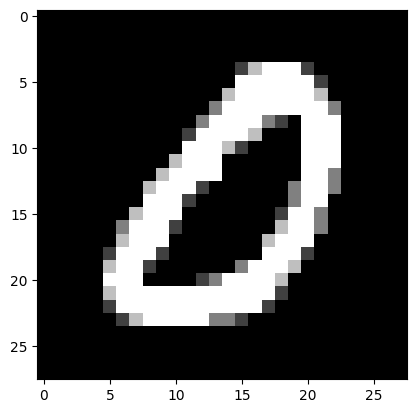

Prediction:  [7]


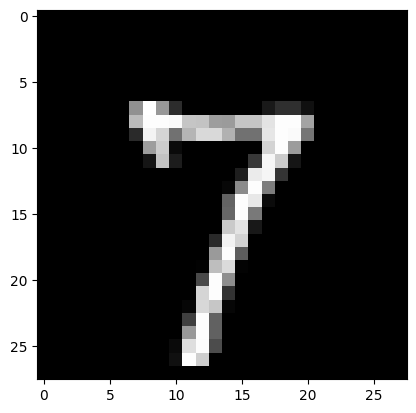

Prediction:  [7]


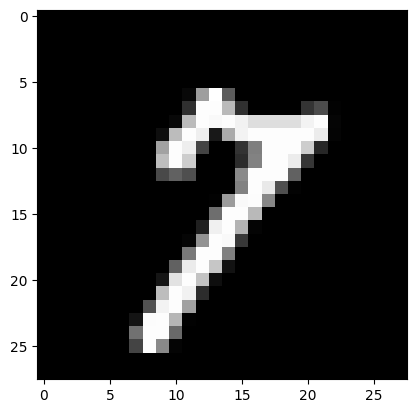

Prediction:  [1]


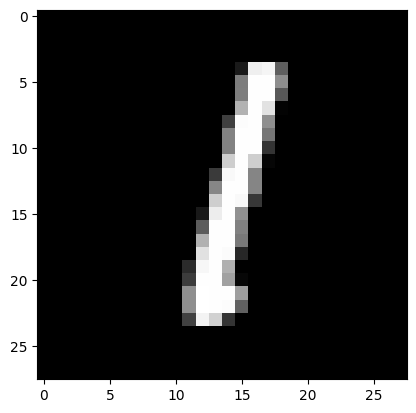

Prediction:  [0]


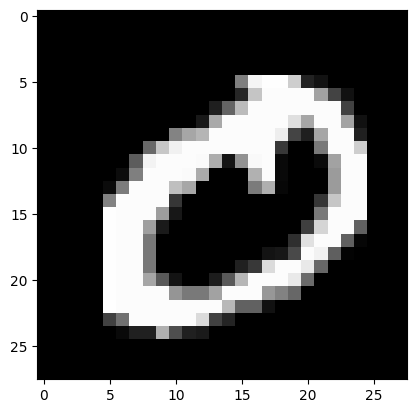

Prediction:  [1]


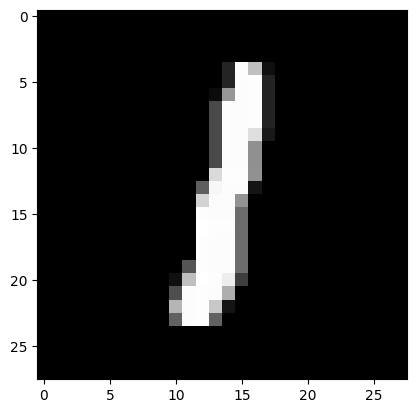

Prediction:  [1]


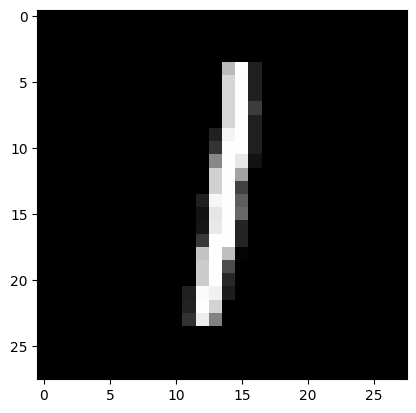

Prediction:  [7]


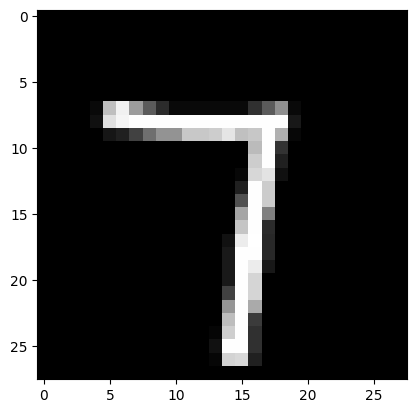

Prediction:  [0]


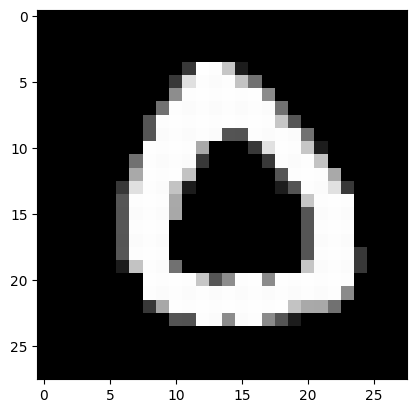

Prediction:  [5]


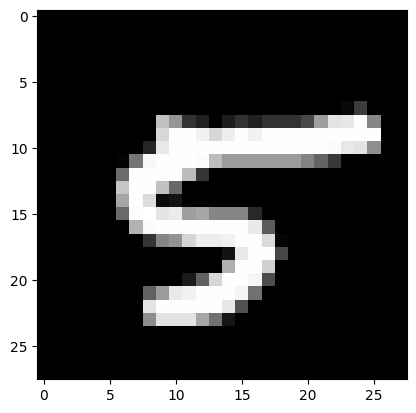

Prediction:  [1]


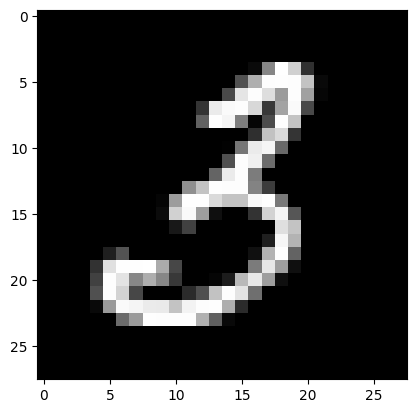

Prediction:  [3]


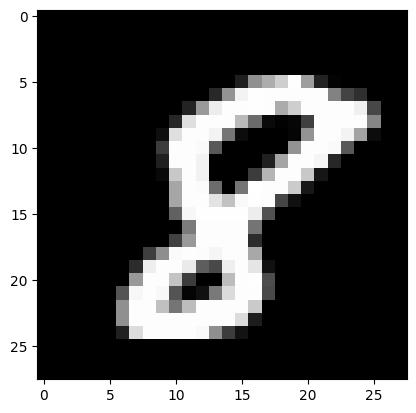

Prediction:  [3]


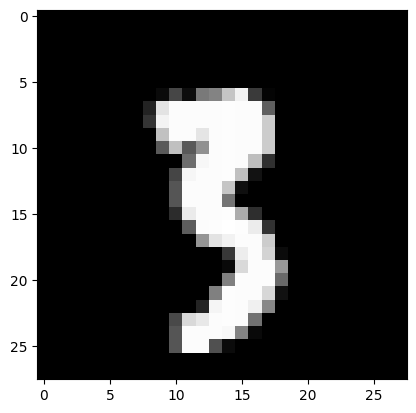

Prediction:  [5]


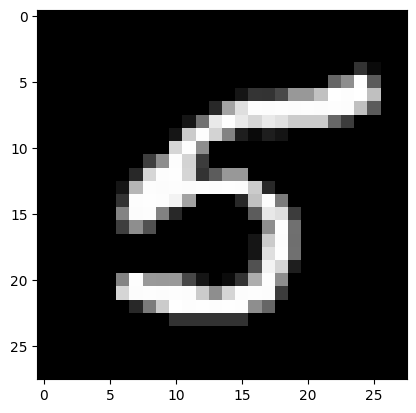

Prediction:  [0]


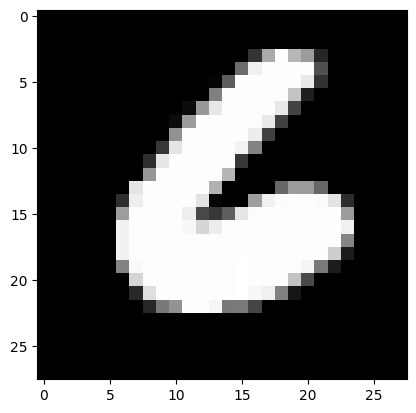

Prediction:  [3]


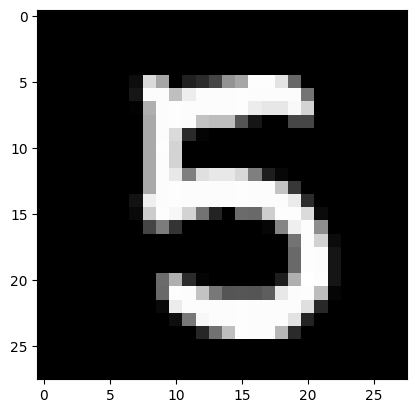

Prediction:  [4]


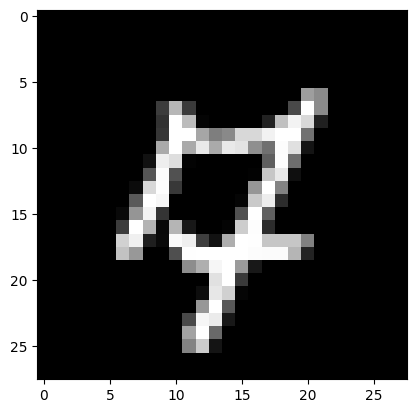

Prediction:  [1]


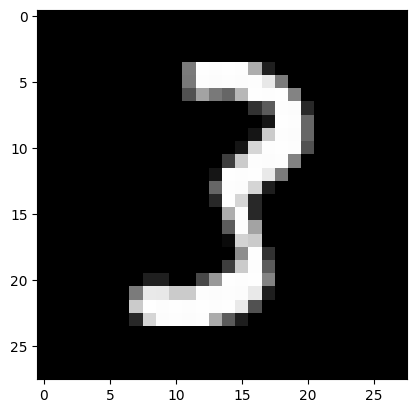

Prediction:  [0]


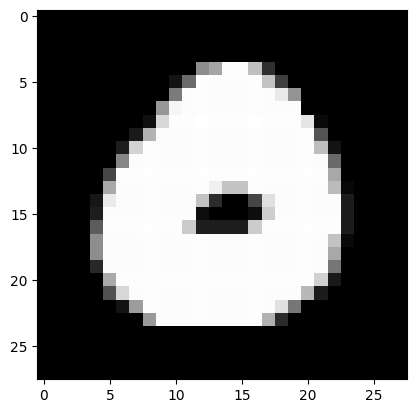

Prediction:  [2]


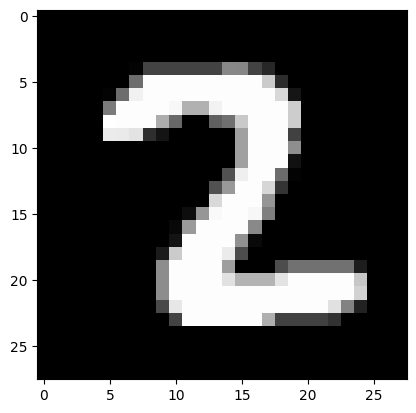

Prediction:  [5]


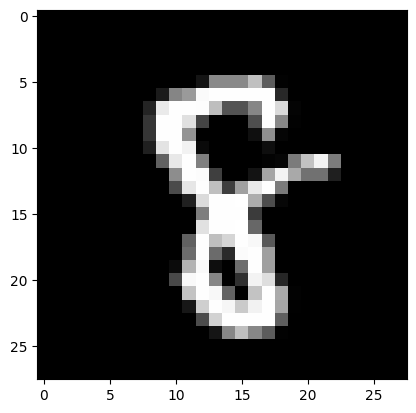

Prediction:  [2]


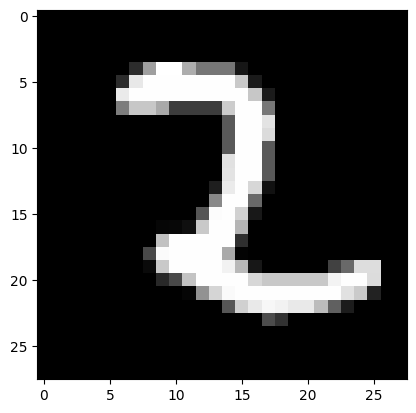

Prediction:  [0]


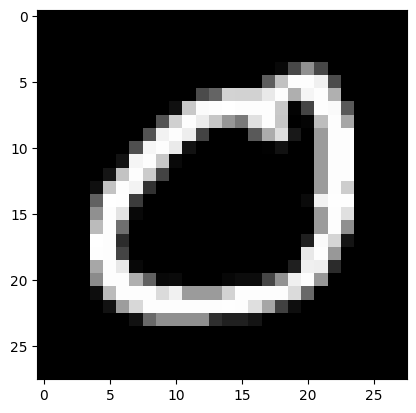

Prediction:  [3]


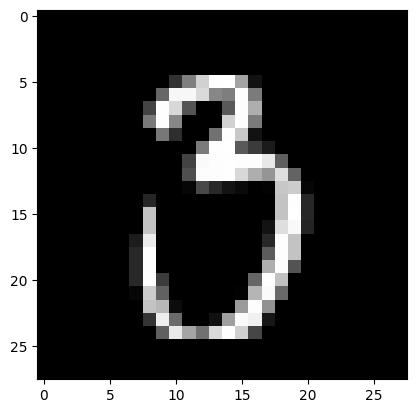

Prediction:  [0]


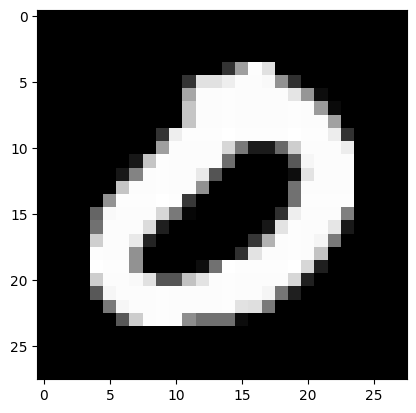

Prediction:  [4]


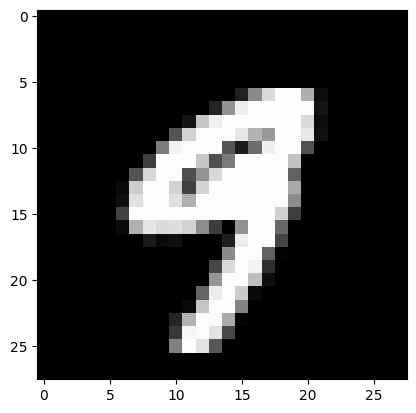

Prediction:  [2]


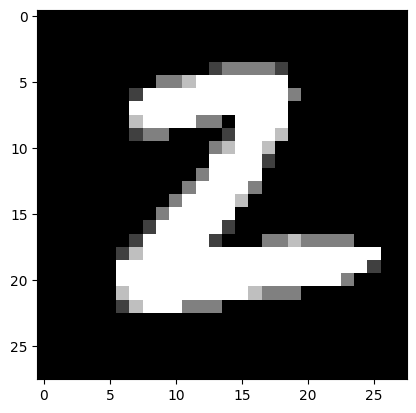

Prediction:  [1]


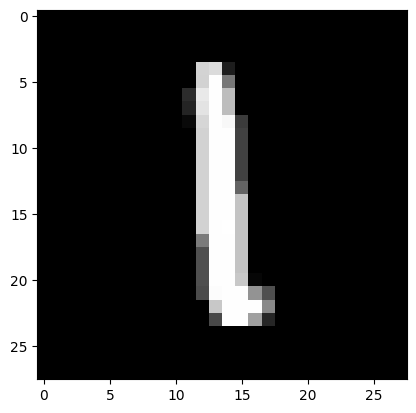

Prediction:  [1]


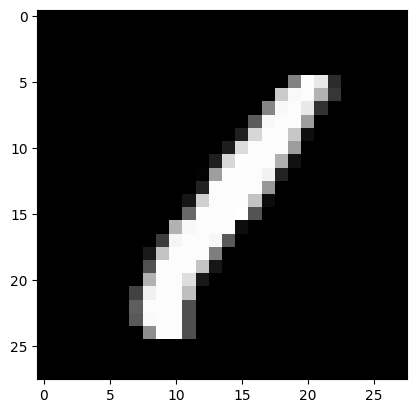

Prediction:  [3]


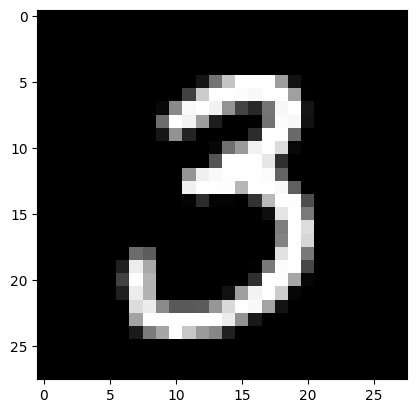

Prediction:  [0]


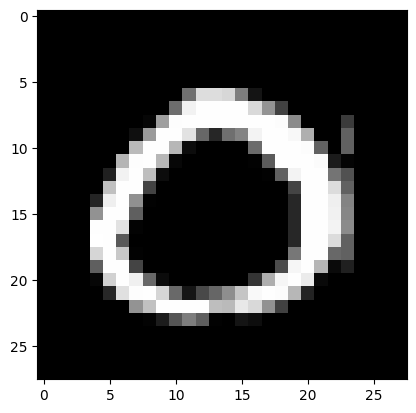

Prediction:  [3]


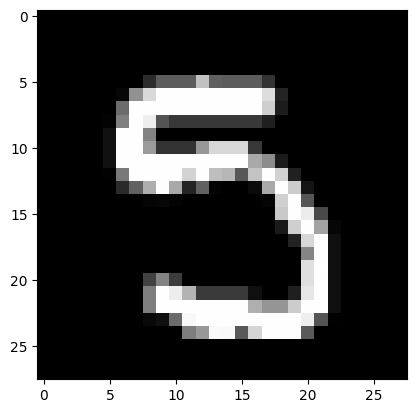

Prediction:  [0]


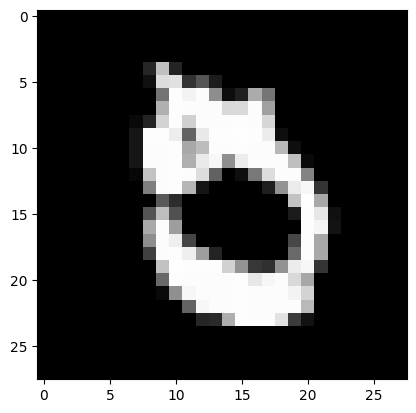

Prediction:  [0]


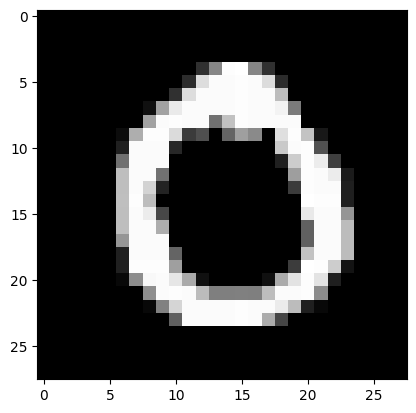

Prediction:  [7]


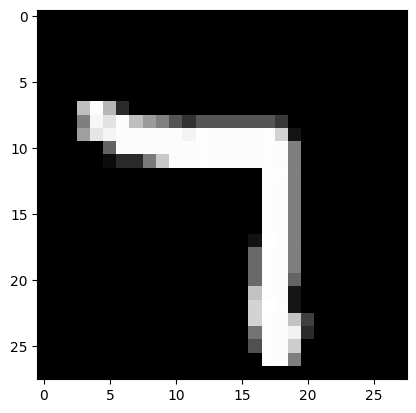

Prediction:  [3]


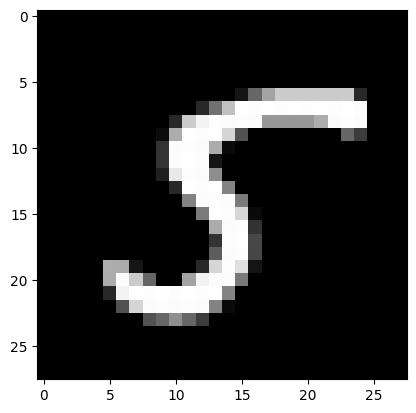

Prediction:  [2]


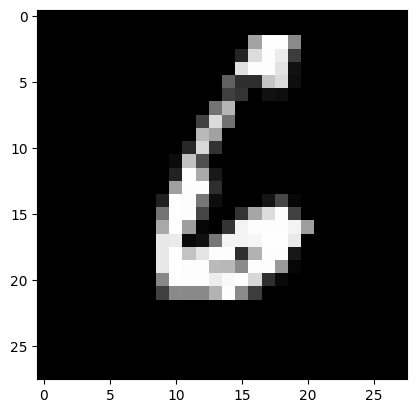

Prediction:  [2]


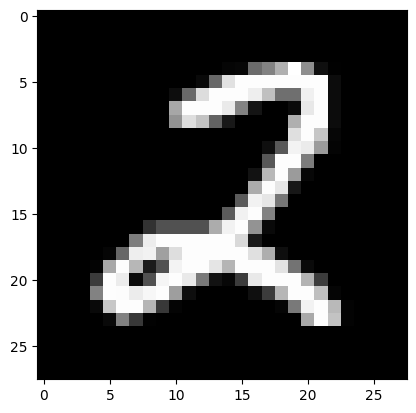

Prediction:  [0]


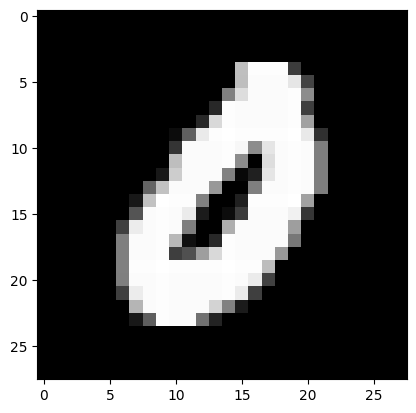

Prediction:  [1]


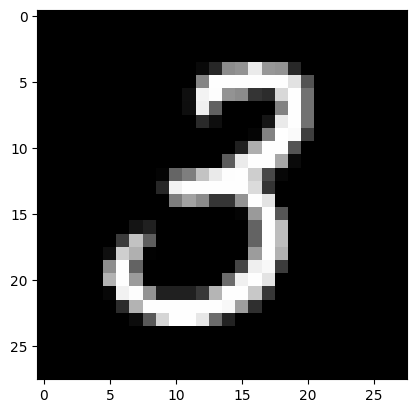

Prediction:  [1]


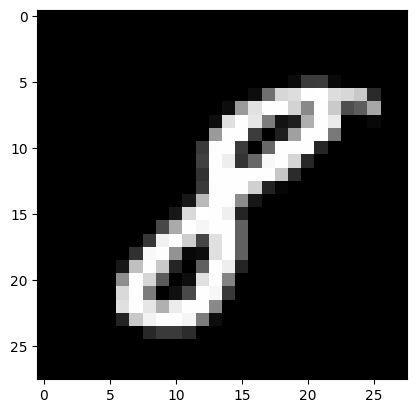

Prediction:  [1]


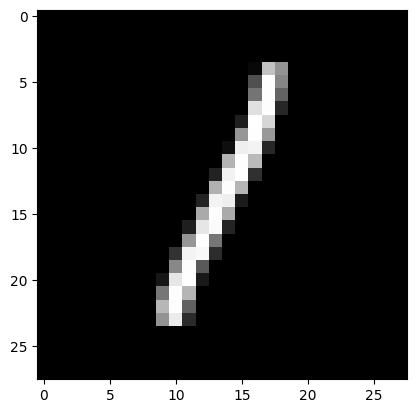

Prediction:  [2]


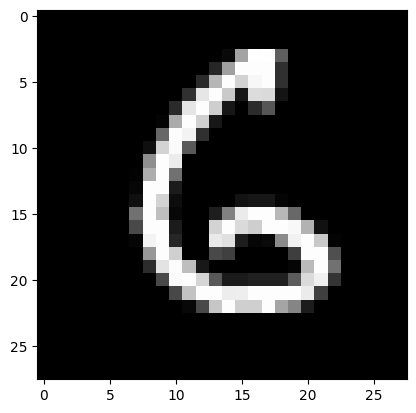

Prediction:  [3]


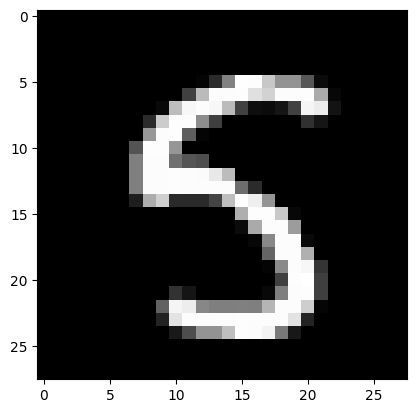

Prediction:  [4]


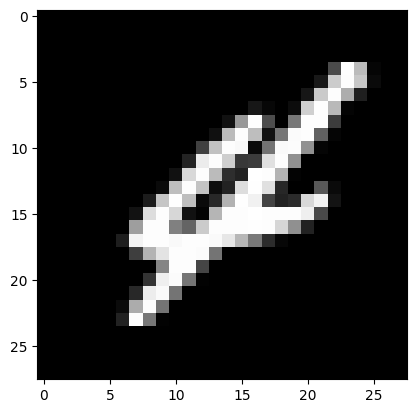

Prediction:  [1]


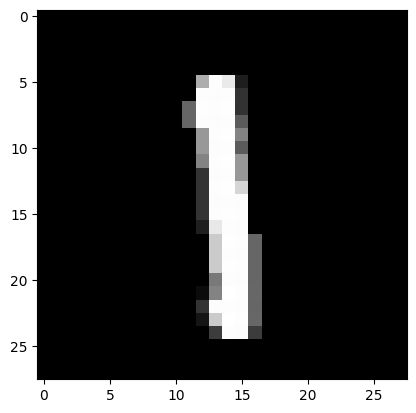

Prediction:  [1]


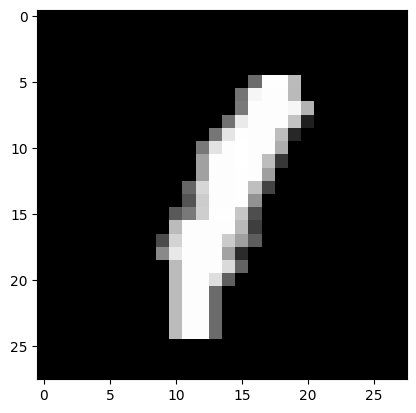

Prediction:  [4]


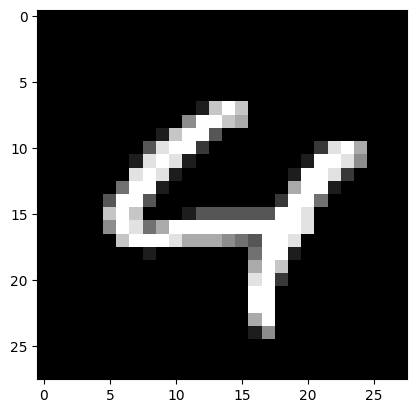

Prediction:  [6]


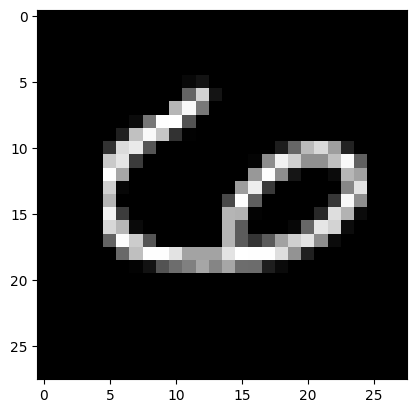

Prediction:  [5]


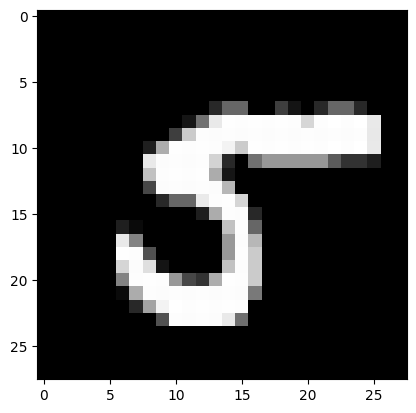

Prediction:  [3]


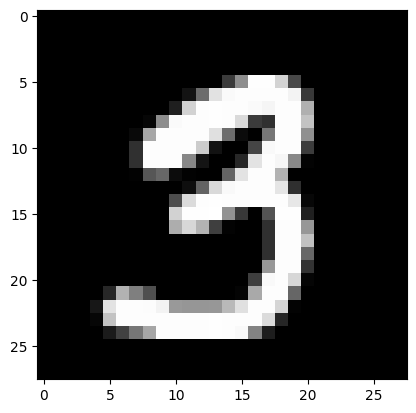

Prediction:  [6]


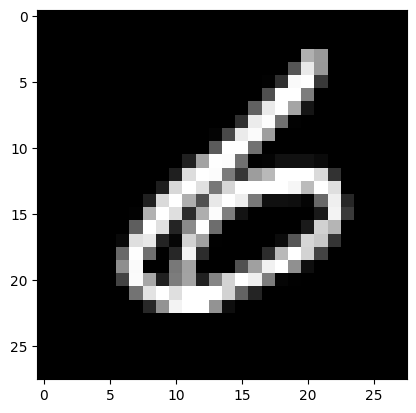

Prediction:  [0]


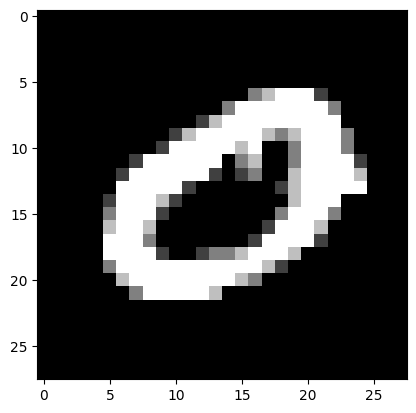

Prediction:  [4]


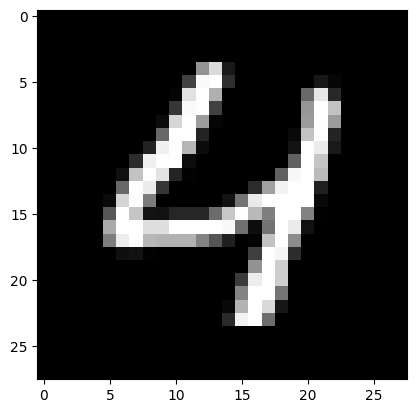

Prediction:  [2]


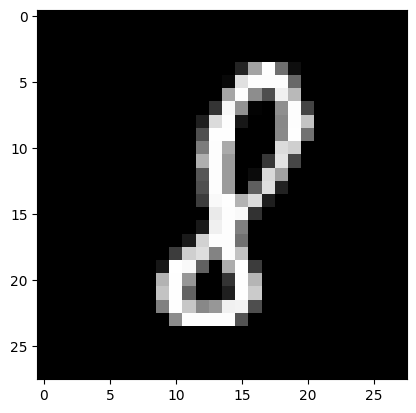

Prediction:  [2]


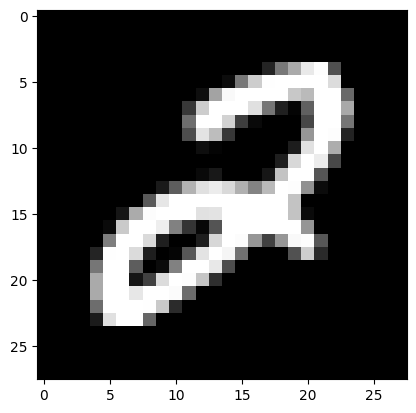

Prediction:  [4]


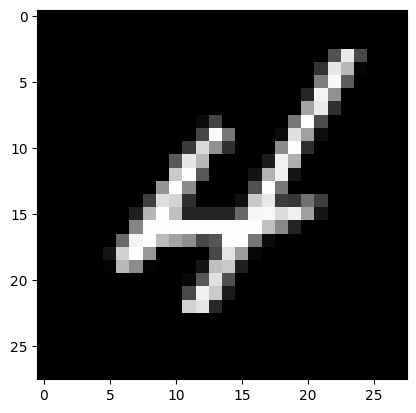

Prediction:  [2]


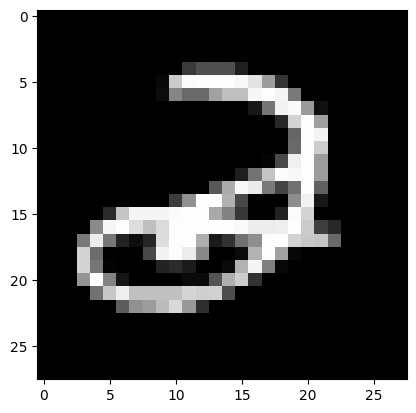

Prediction:  [0]


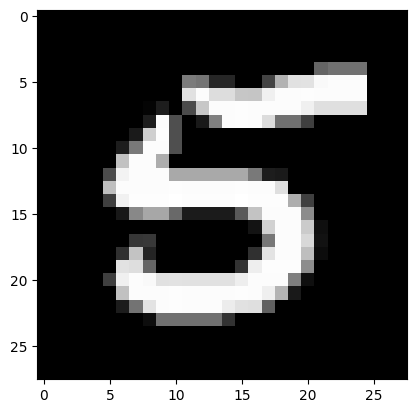

Prediction:  [1]


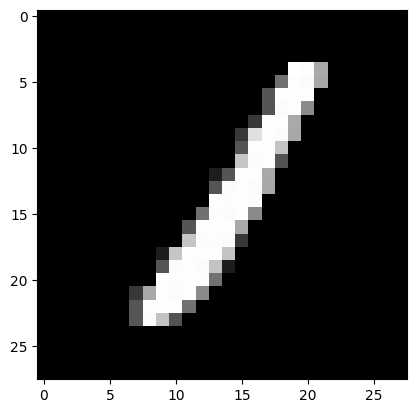

Prediction:  [3]


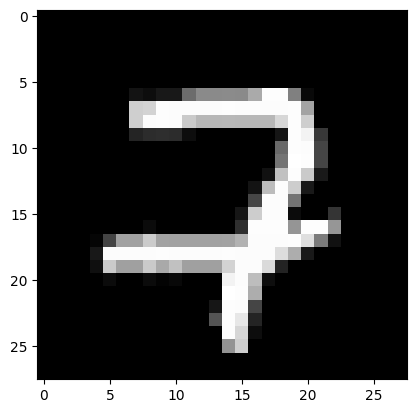

Prediction:  [2]


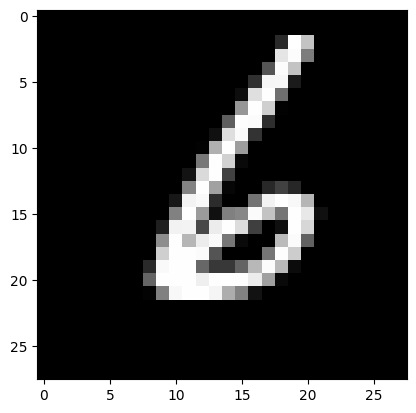

Prediction:  [4]


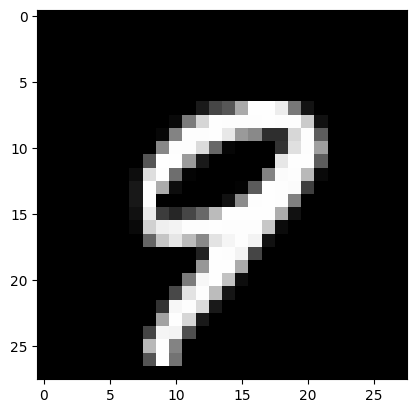

Prediction:  [1]


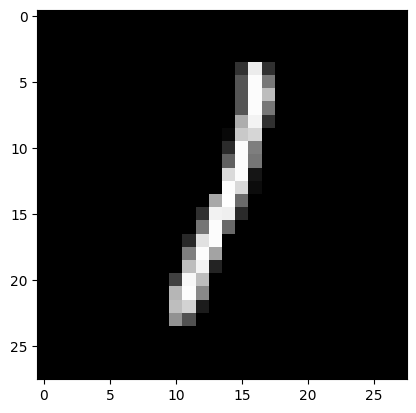

Prediction:  [7]


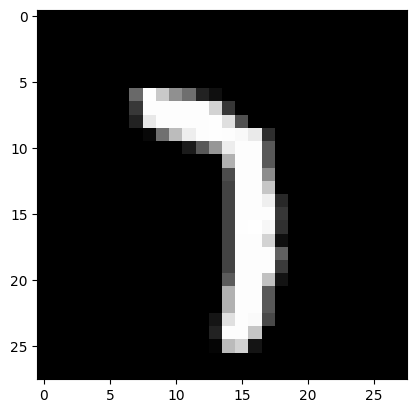

Prediction:  [3]


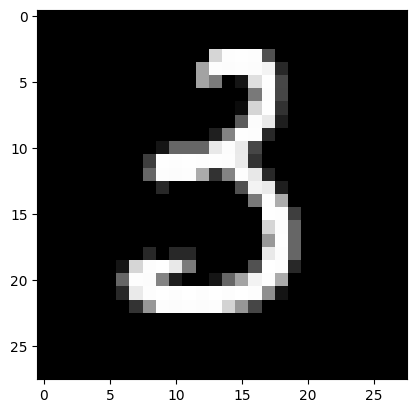

Prediction:  [2]


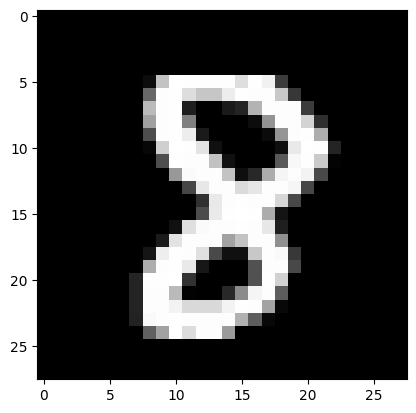

Prediction:  [0]


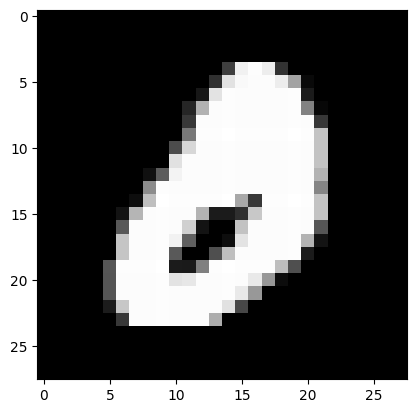

Prediction:  [2]


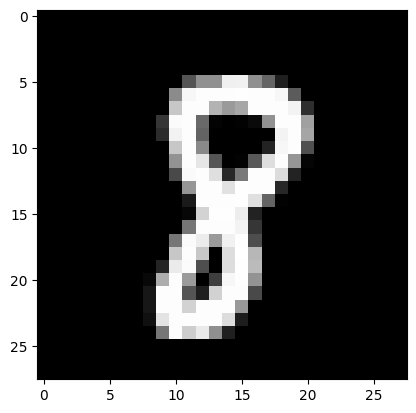

Prediction:  [3]


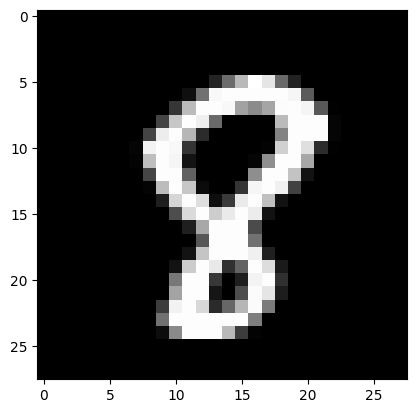

Prediction:  [4]


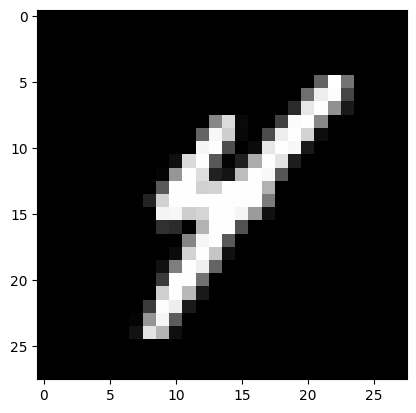

Prediction:  [0]


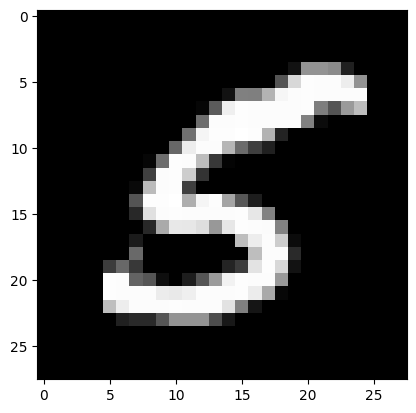

Prediction:  [3]


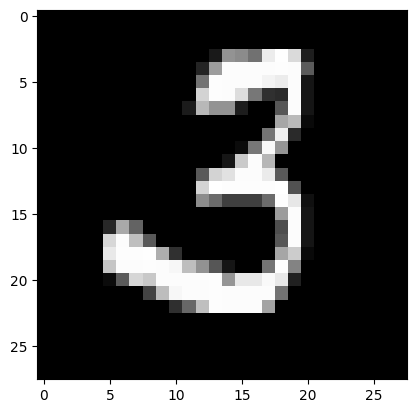

Prediction:  [0]


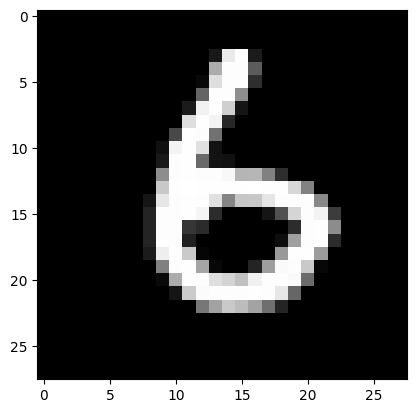

Prediction:  [0]


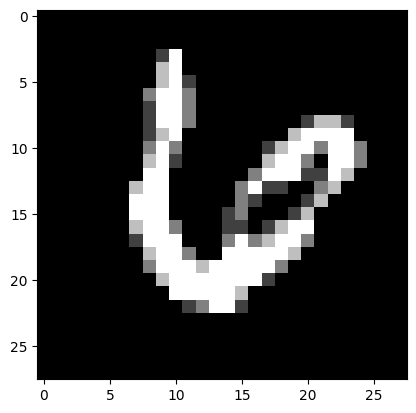

Prediction:  [6]


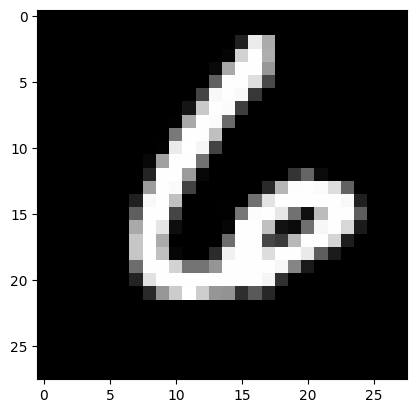

Prediction:  [0]


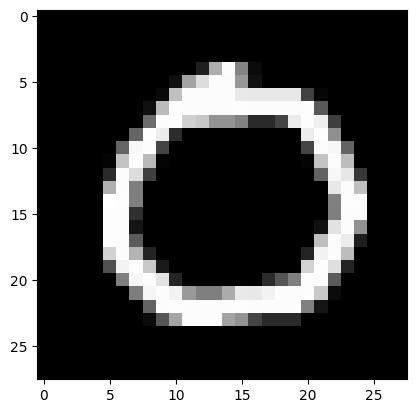

Prediction:  [3]


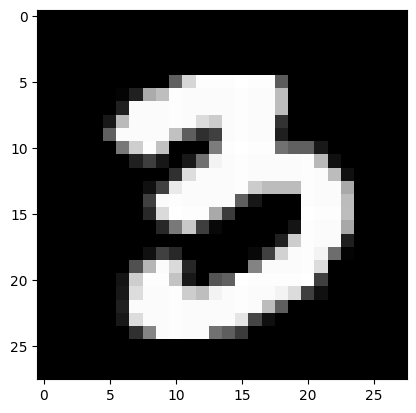

Prediction:  [5]


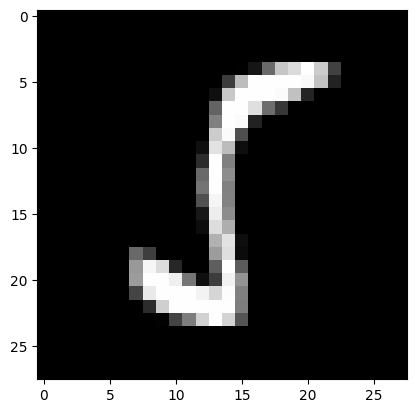

Prediction:  [1]


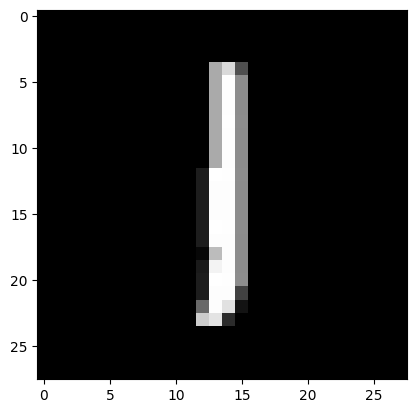

Prediction:  [3]


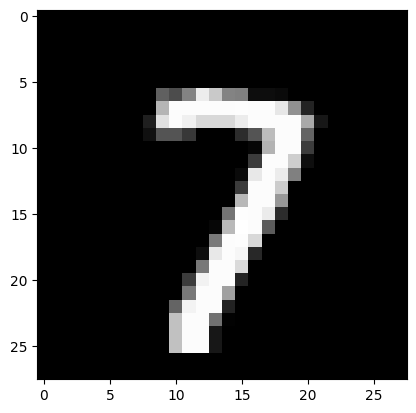

Prediction:  [1]


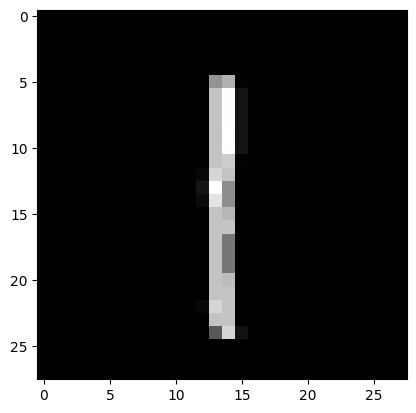

Prediction:  [2]


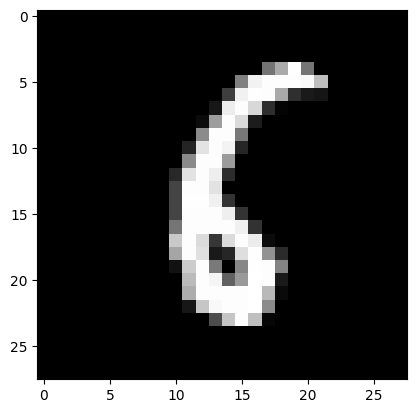

Prediction:  [2]


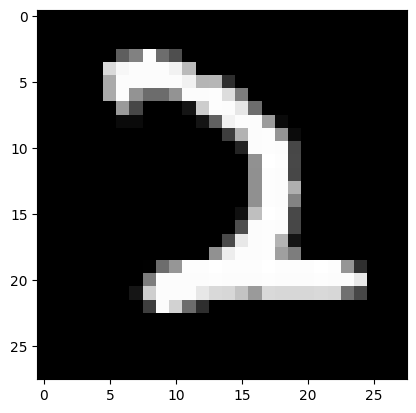

Prediction:  [2]


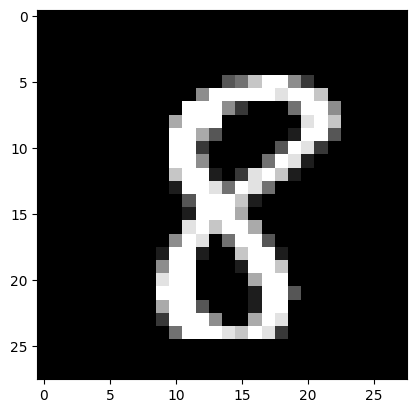

Prediction:  [5]


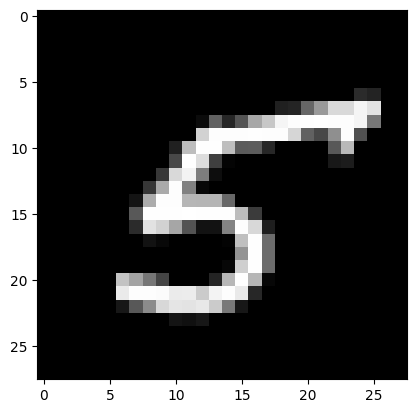

Prediction:  [6]


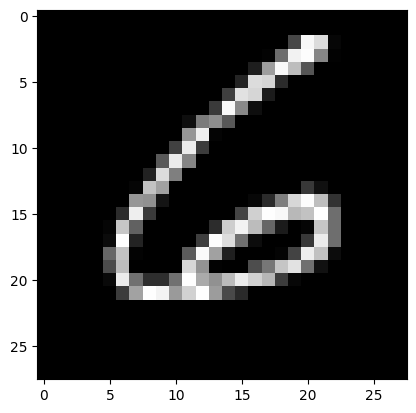

Prediction:  [4]


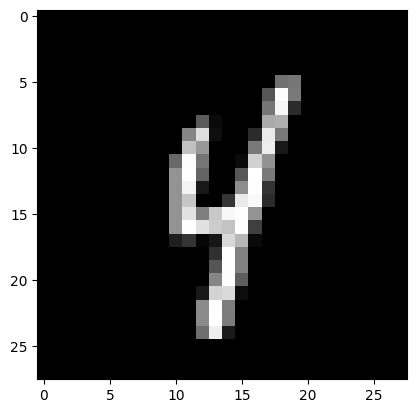

Prediction:  [7]


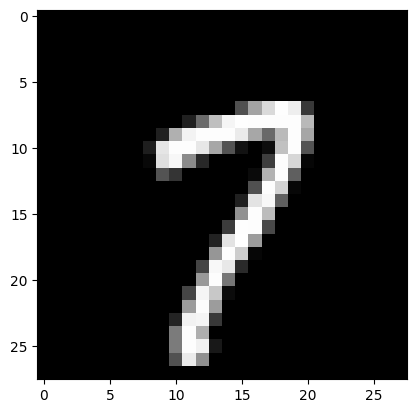

Prediction:  [4]


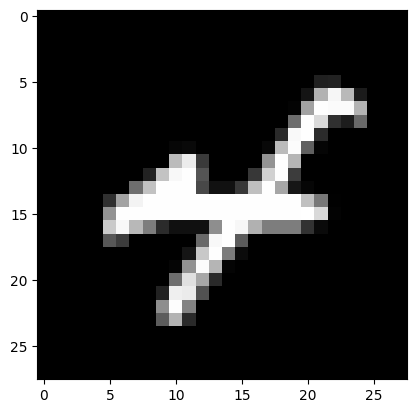

Prediction:  [2]


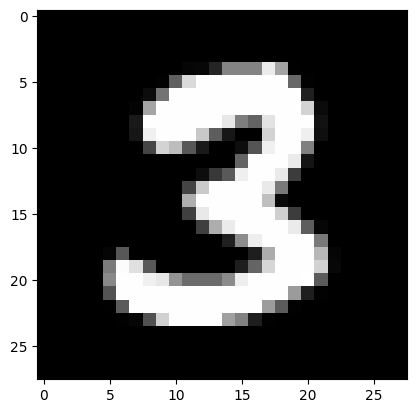

Prediction:  [3]


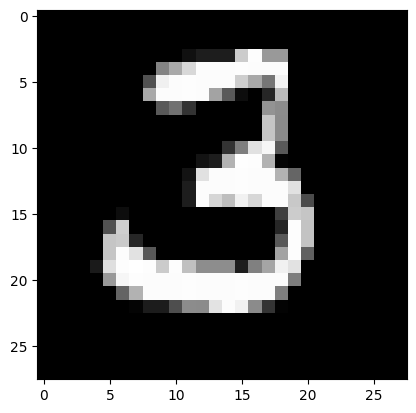

Prediction:  [2]


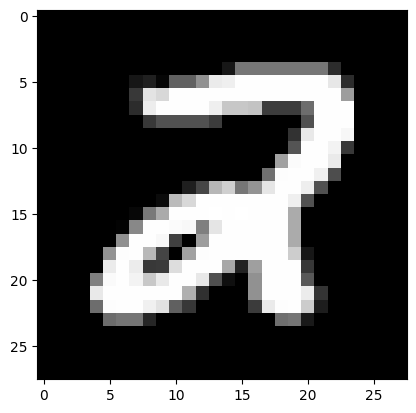

Prediction:  [4]


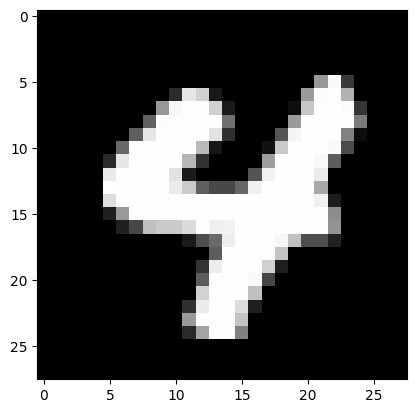

Prediction:  [7]


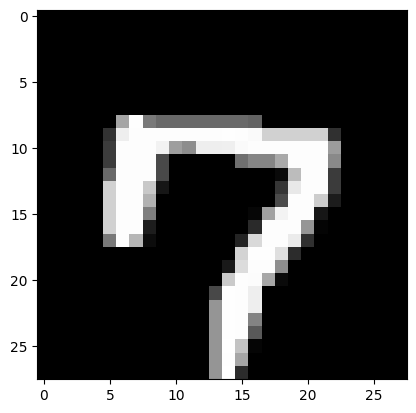

Prediction:  [0]


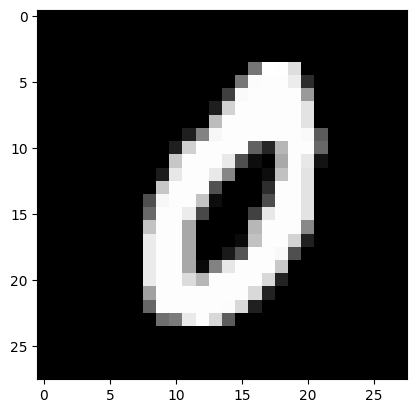

Prediction:  [0]


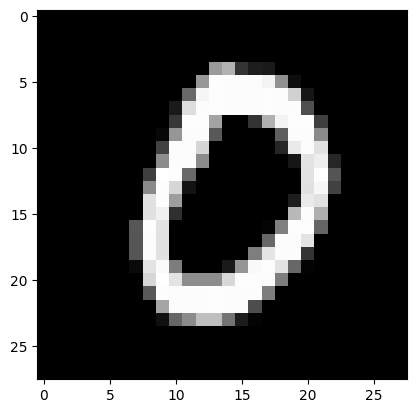

Prediction:  [4]


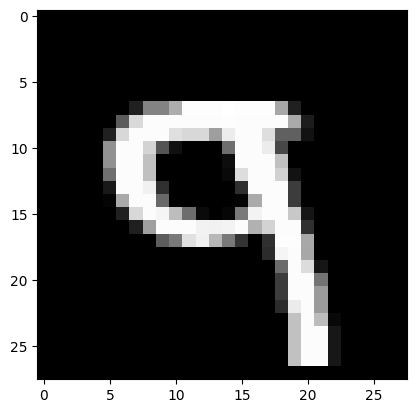

Prediction:  [2]


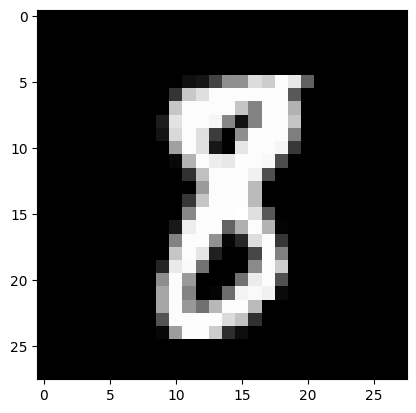

Prediction:  [3]


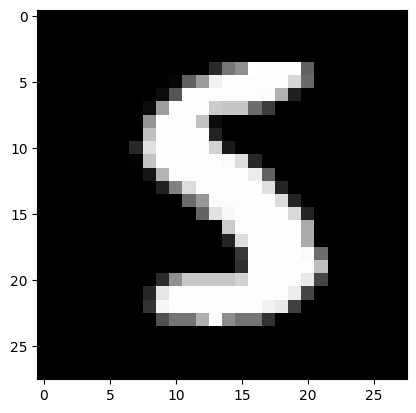

Prediction:  [3]


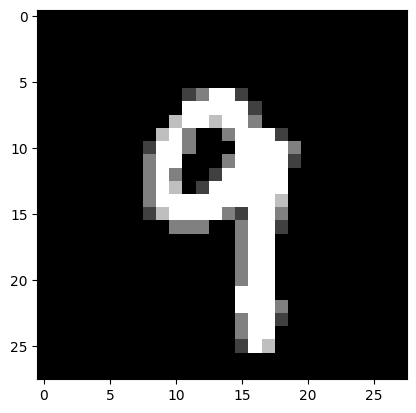

Prediction:  [4]


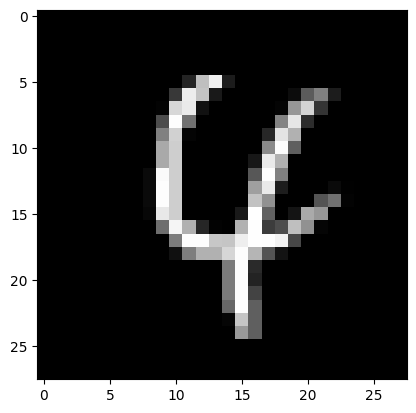

Prediction:  [0]


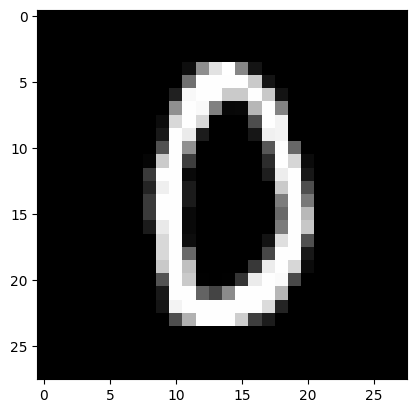

Prediction:  [4]


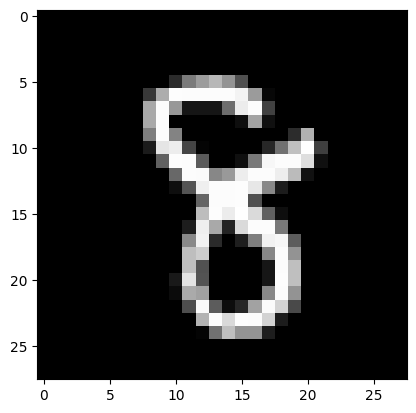

Prediction:  [1]


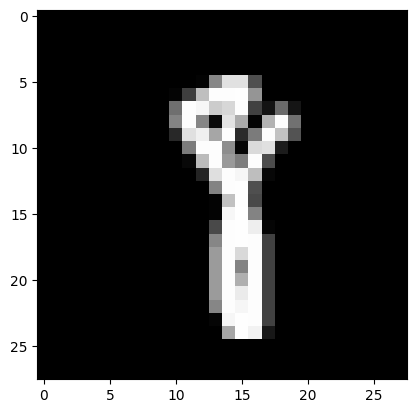

Prediction:  [3]


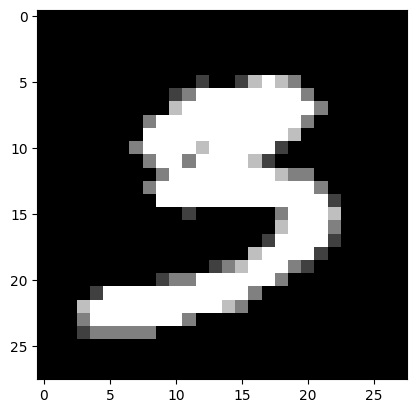

Prediction:  [6]


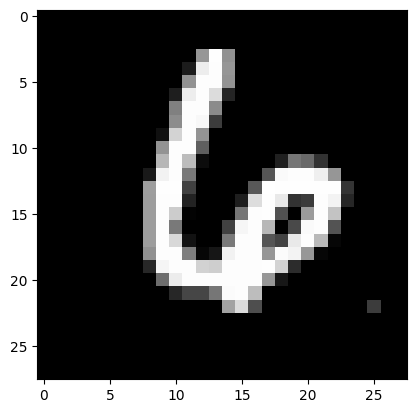

Prediction:  [2]


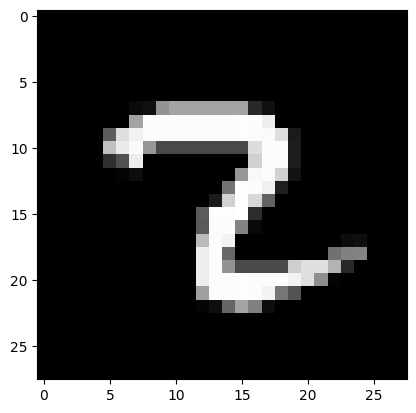

Prediction:  [2]


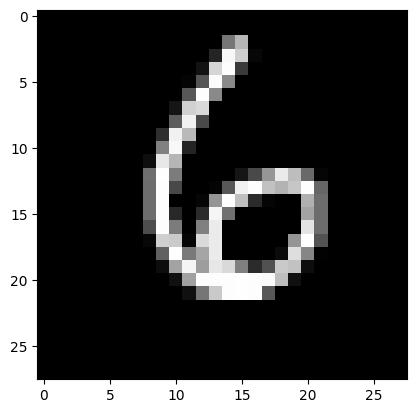

Prediction:  [1]


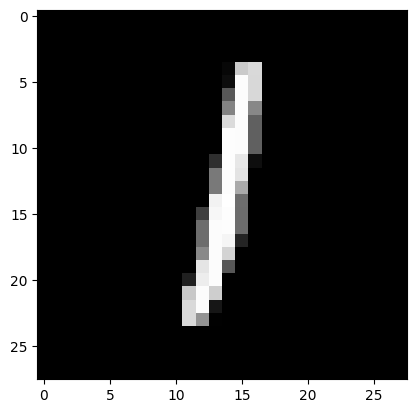

Prediction:  [3]


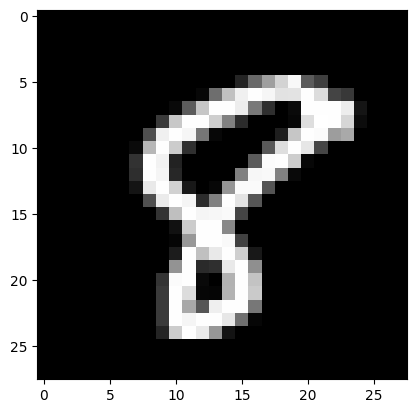

Prediction:  [6]


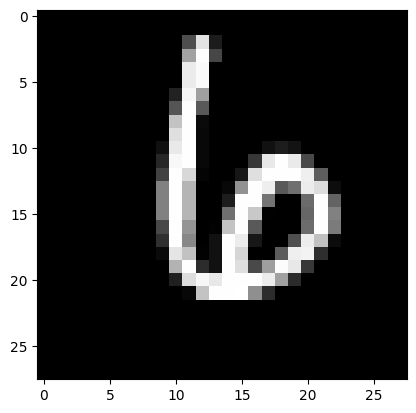

Prediction:  [1]


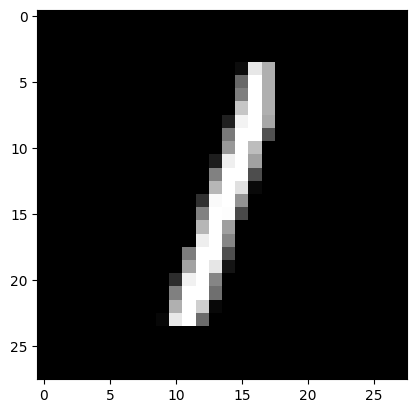

Prediction:  [4]


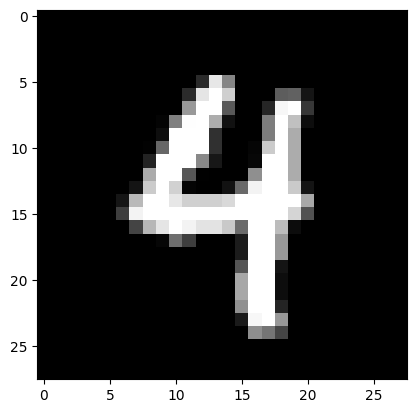

Prediction:  [7]


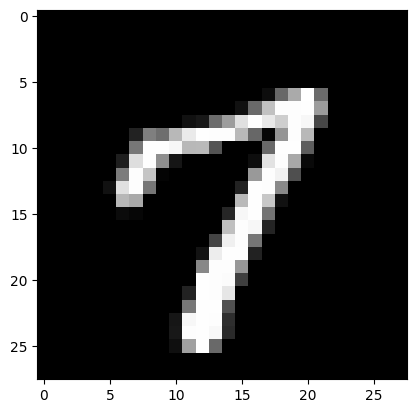

Prediction:  [7]


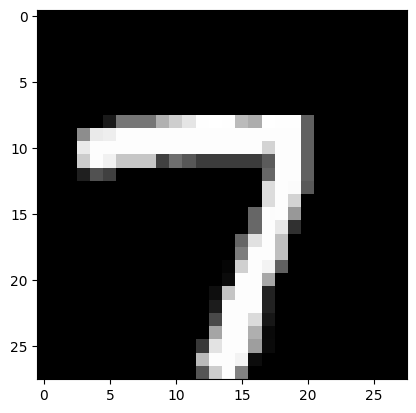

Prediction:  [2]


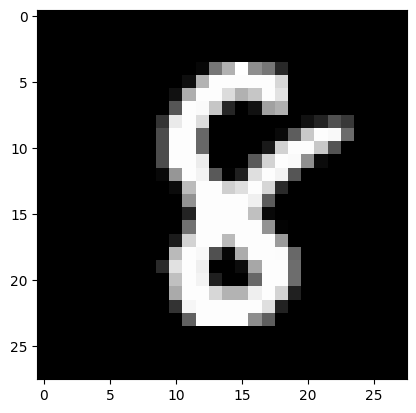

Prediction:  [3]


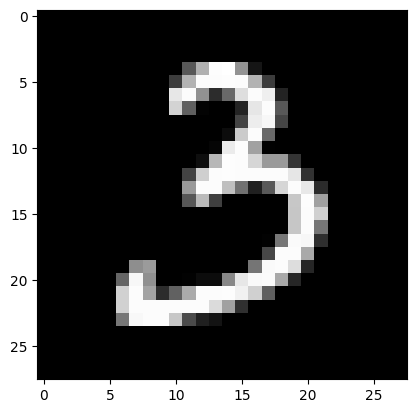

Prediction:  [0]


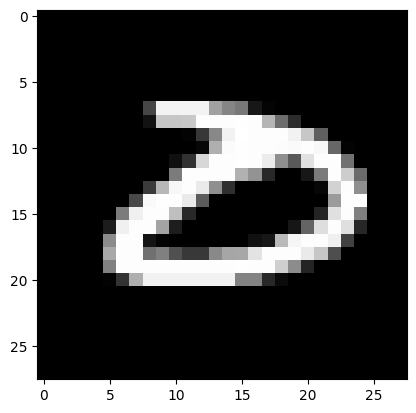

Prediction:  [4]


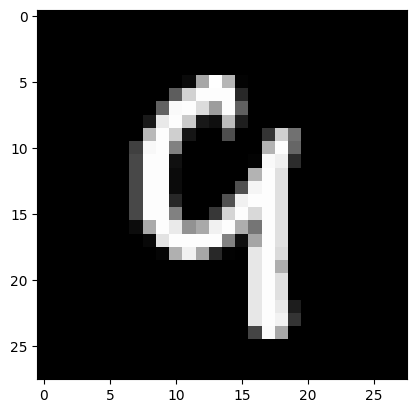

Prediction:  [4]


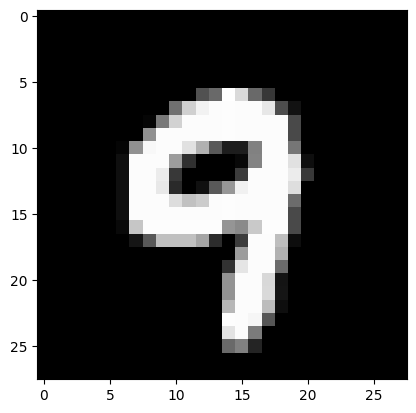

Prediction:  [2]


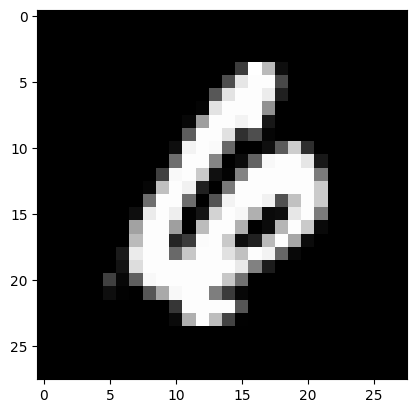

Prediction:  [7]


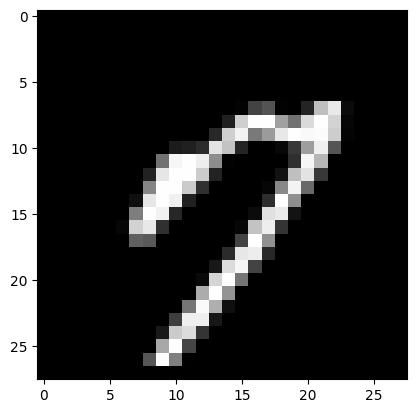

Prediction:  [2]


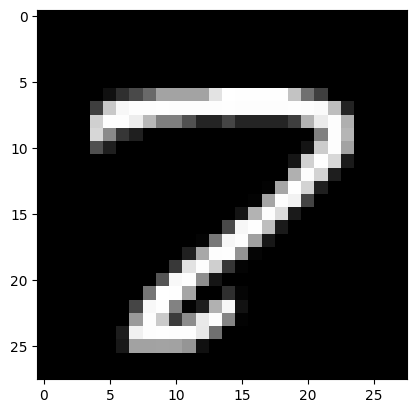

Prediction:  [4]


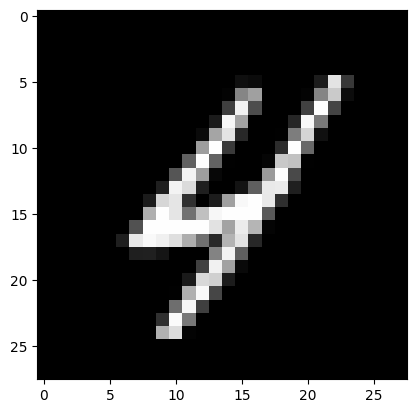

Prediction:  [4]


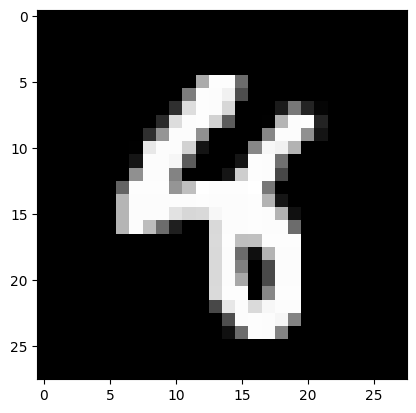

Prediction:  [1]


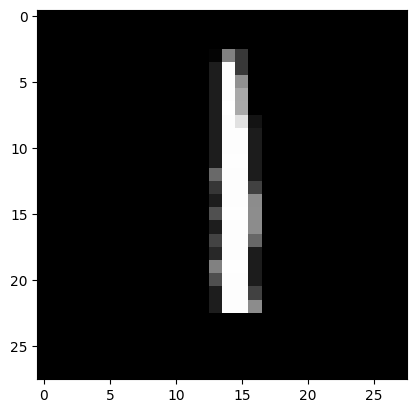

Prediction:  [2]


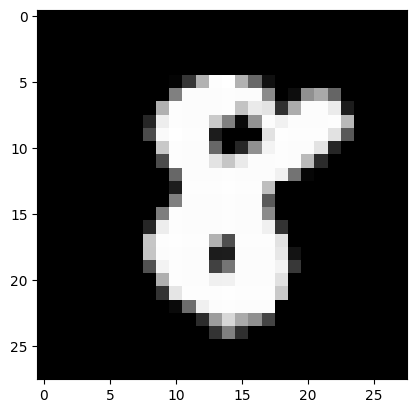

Prediction:  [4]


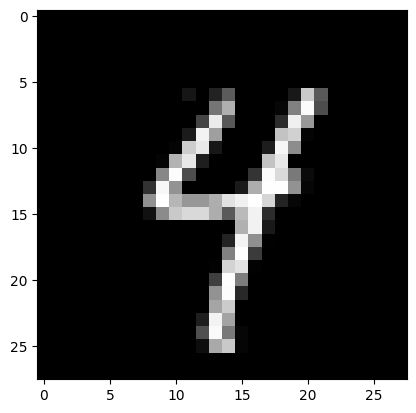

Prediction:  [3]


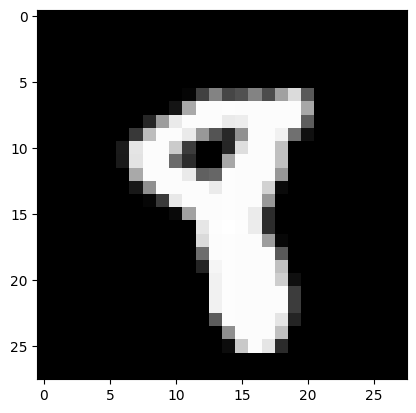

Prediction:  [0]


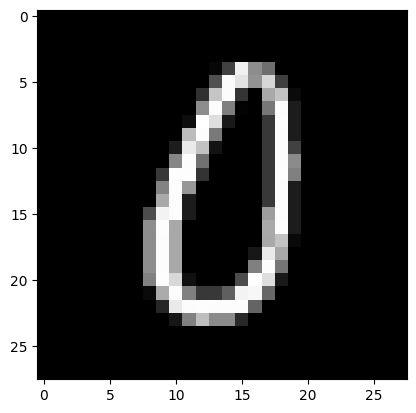

Prediction:  [2]


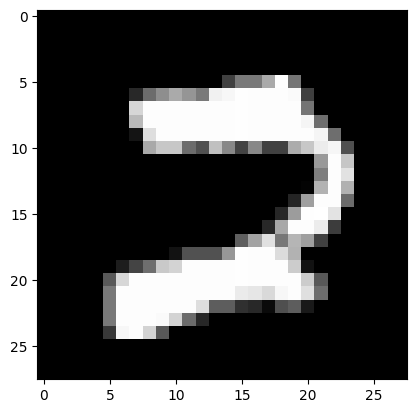

Prediction:  [2]


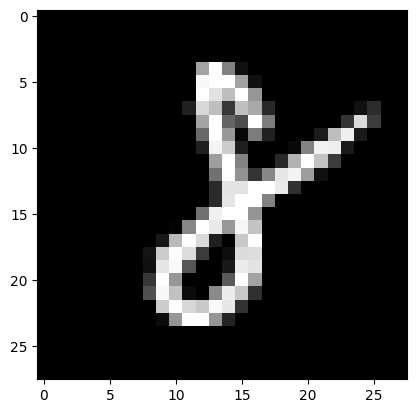

Prediction:  [2]


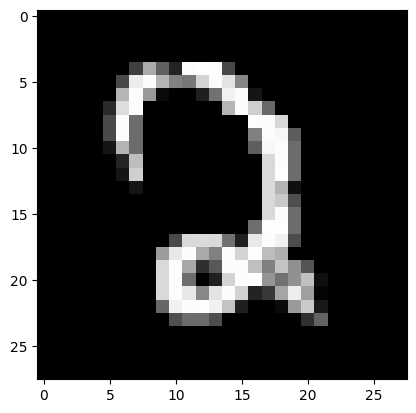

Prediction:  [4]


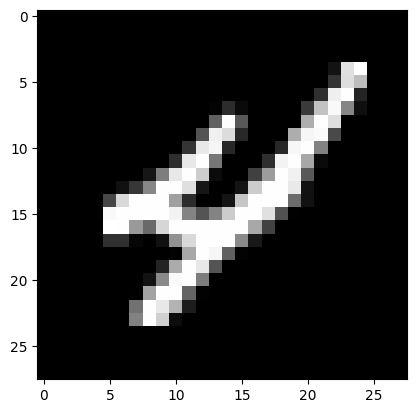

Prediction:  [3]


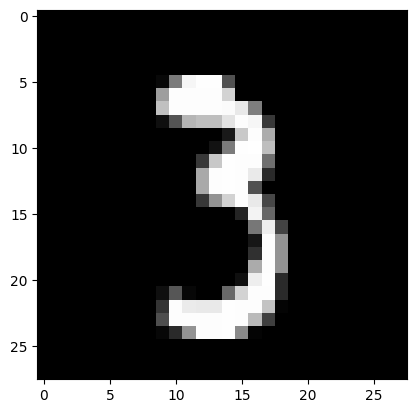

Prediction:  [1]


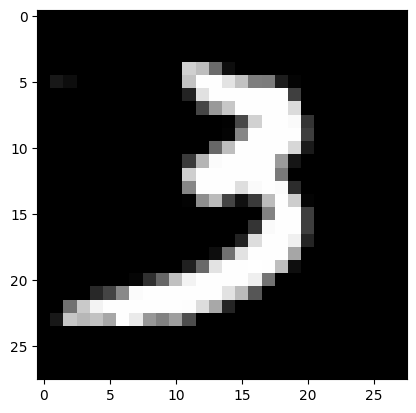

Prediction:  [7]


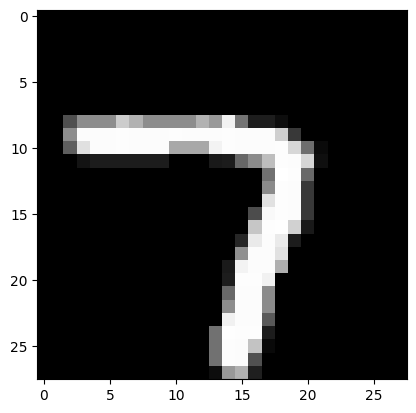

Prediction:  [2]


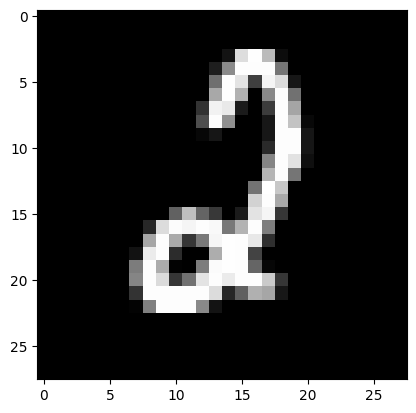

Prediction:  [2]


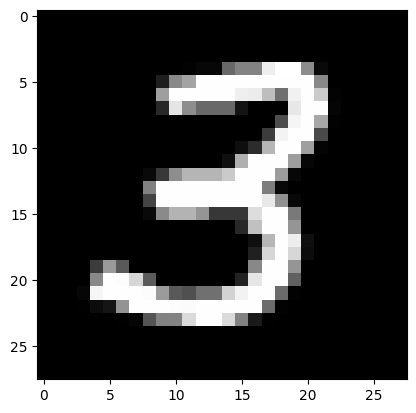

Prediction:  [4]


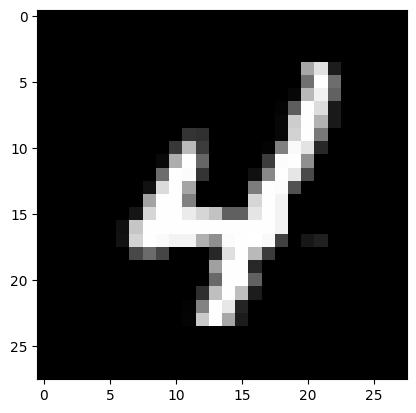

Prediction:  [0]


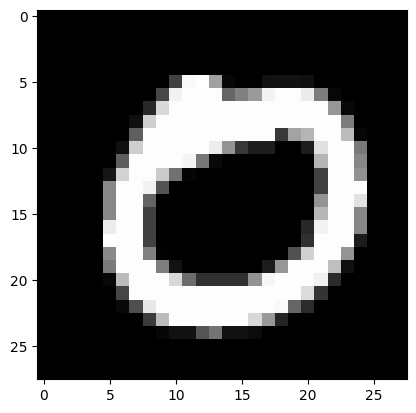

Prediction:  [4]


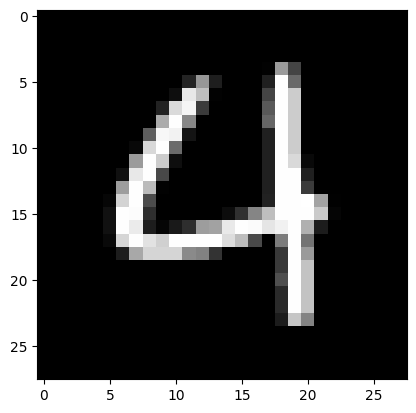

Prediction:  [1]


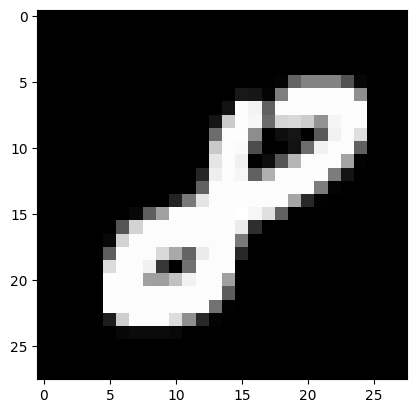

Prediction:  [1]


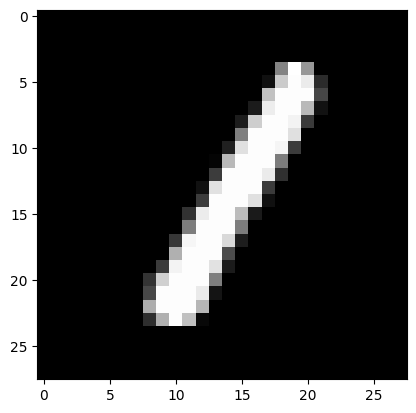

Prediction:  [1]


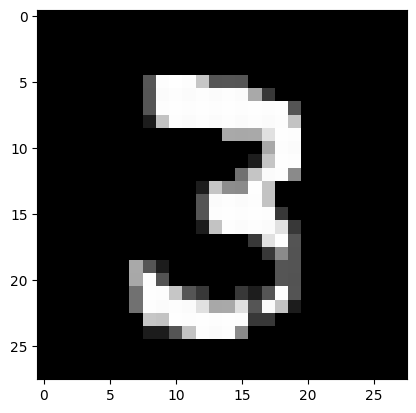

Prediction:  [3]


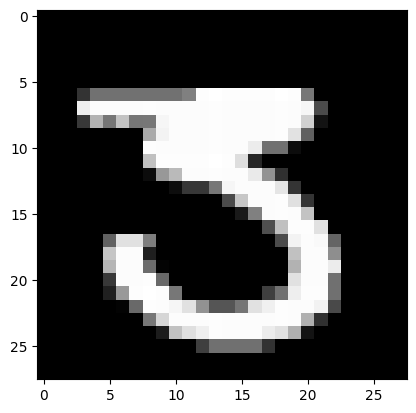

Prediction:  [0]


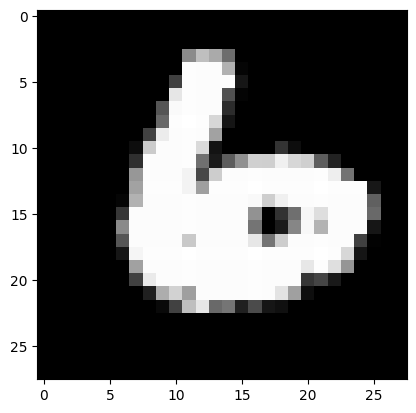

Prediction:  [3]


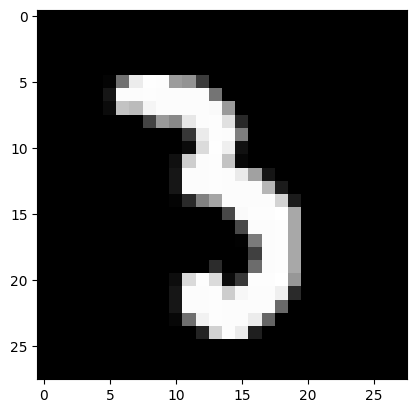

Prediction:  [3]


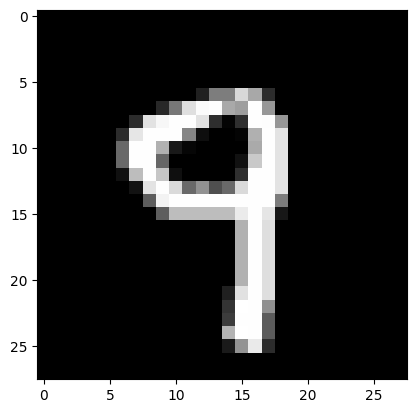

Prediction:  [4]


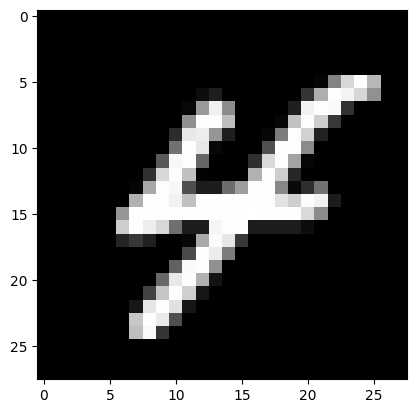

Prediction:  [3]


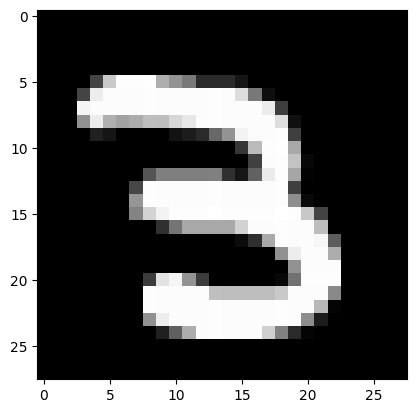

Prediction:  [3]


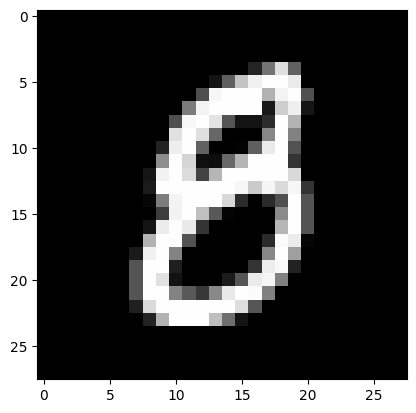

Prediction:  [7]


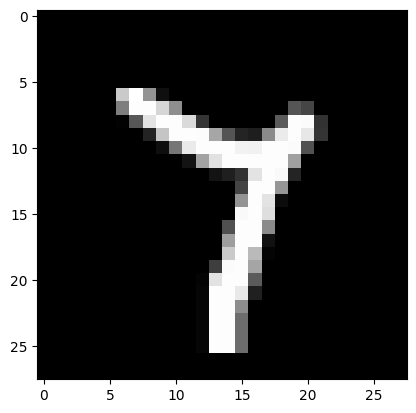

Prediction:  [7]


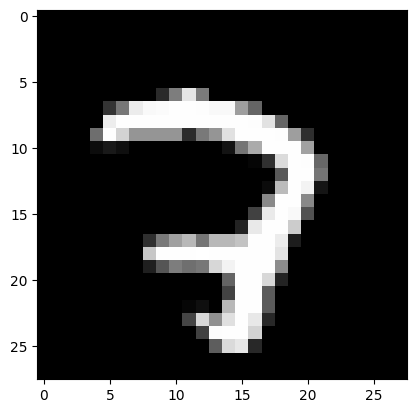

Prediction:  [2]


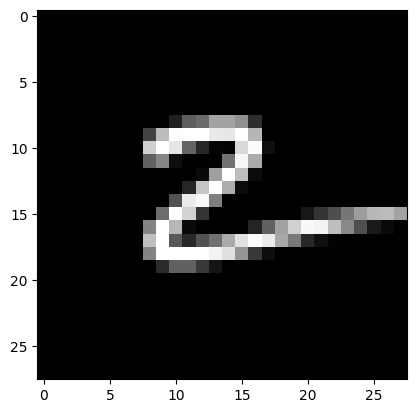

Prediction:  [2]


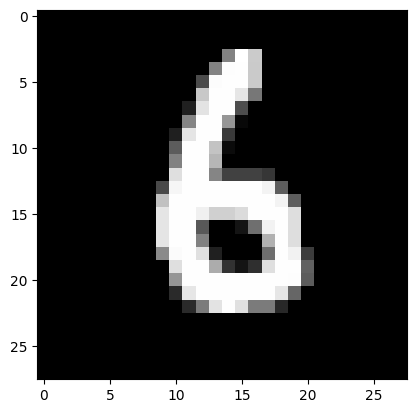

Prediction:  [0]


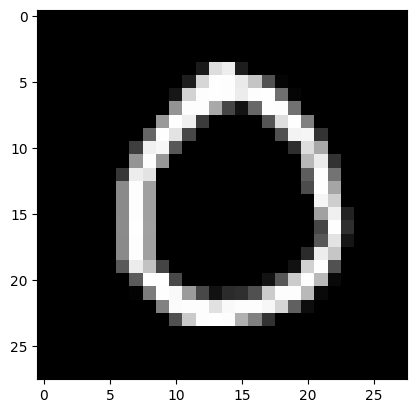

Prediction:  [2]


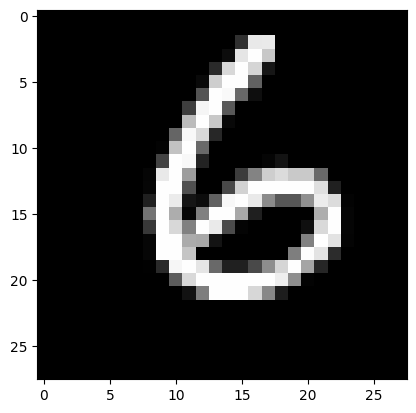

Prediction:  [9]


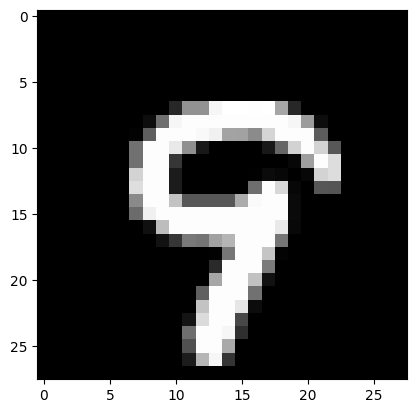

Prediction:  [3]


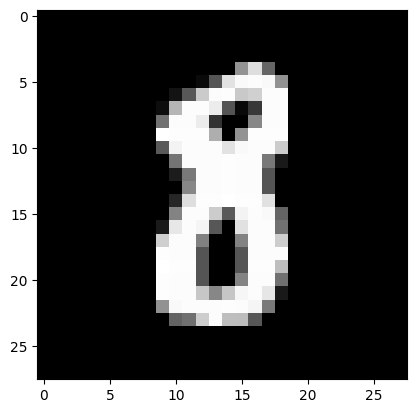

Prediction:  [8]


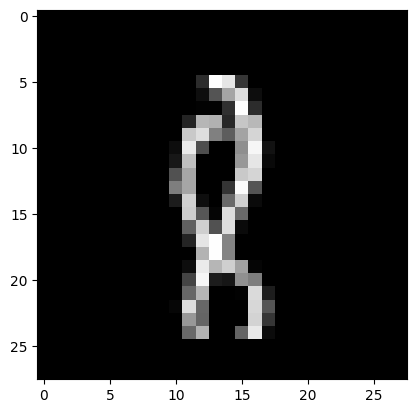

Prediction:  [1]


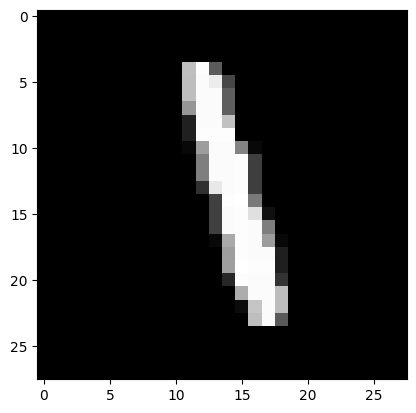

Prediction:  [3]


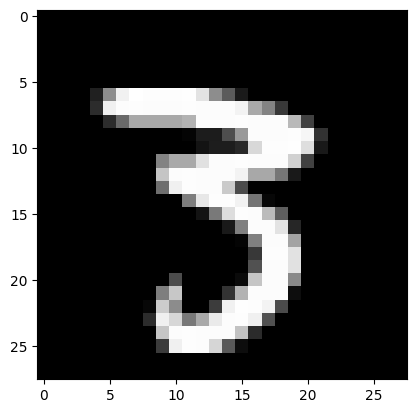

Prediction:  [4]


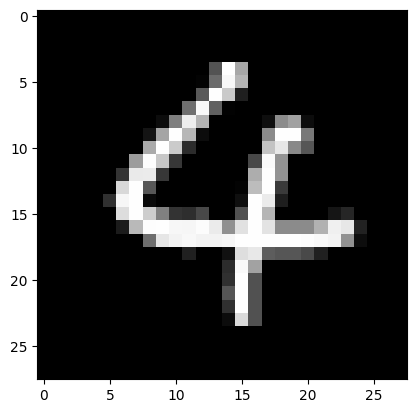

Prediction:  [2]


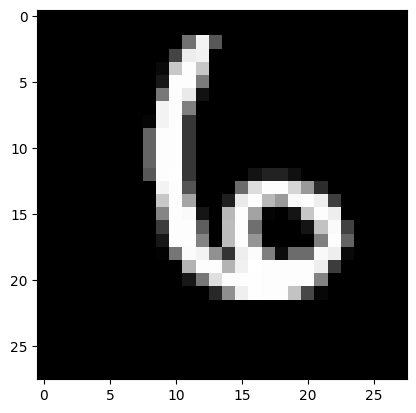

Prediction:  [4]


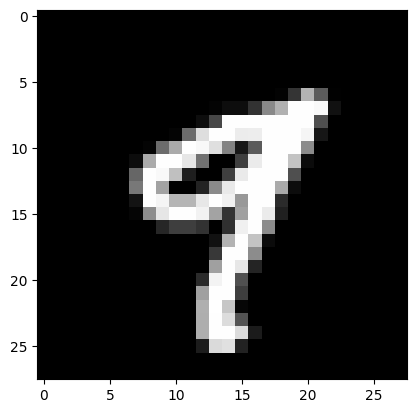

Prediction:  [4]


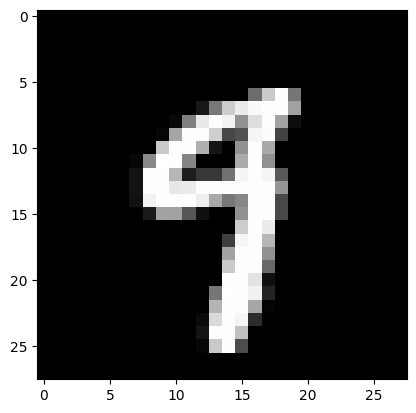

Prediction:  [1]


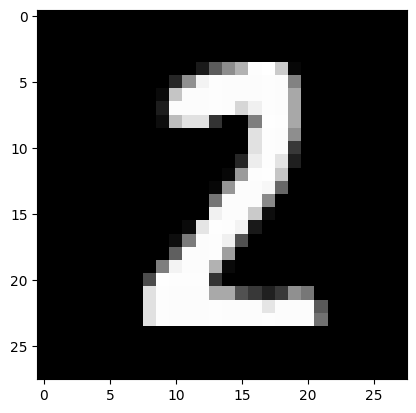

Prediction:  [6]


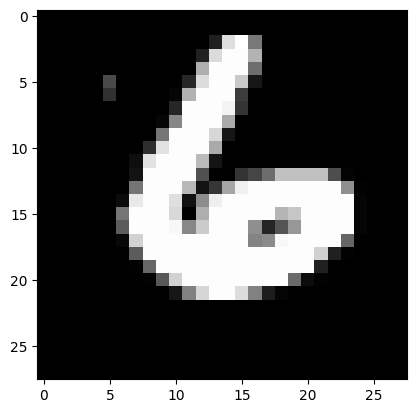

Prediction:  [0]


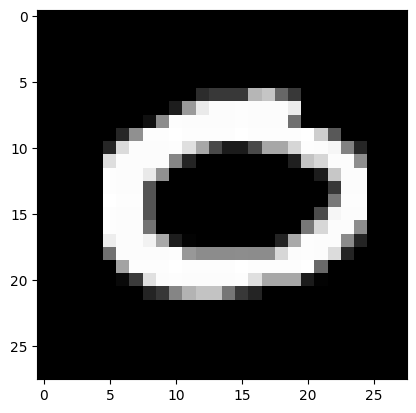

Prediction:  [1]


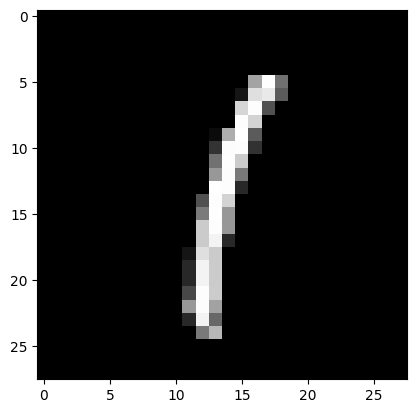

Prediction:  [8]


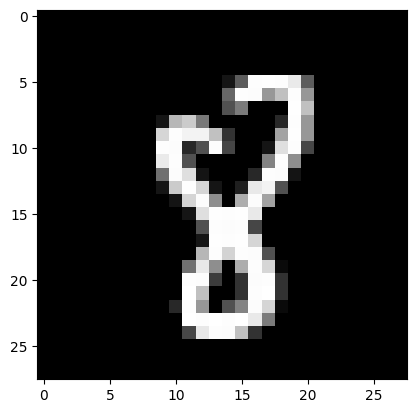

Prediction:  [4]


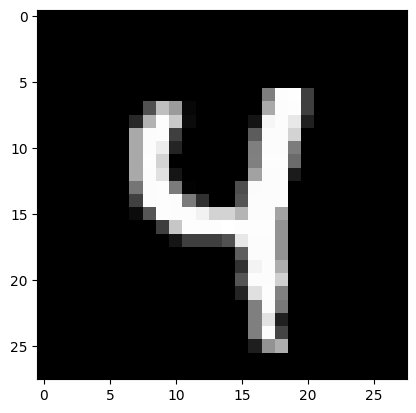

Prediction:  [3]


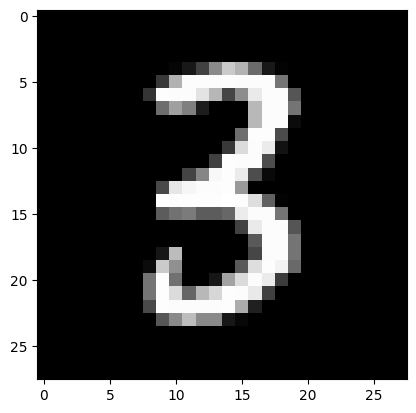

Prediction:  [4]


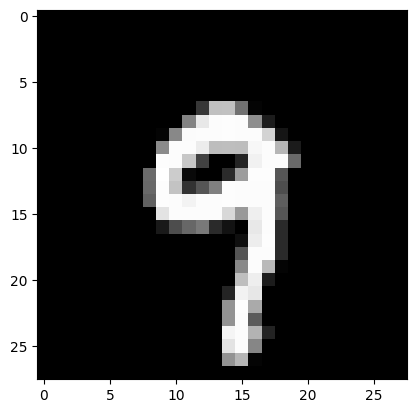

Prediction:  [5]


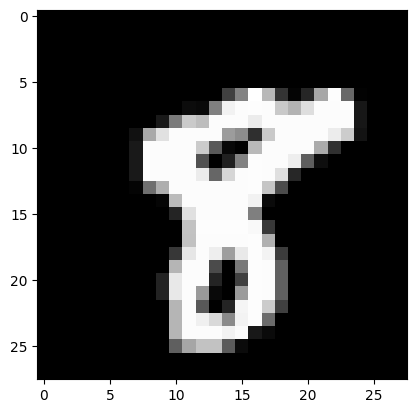

Prediction:  [2]


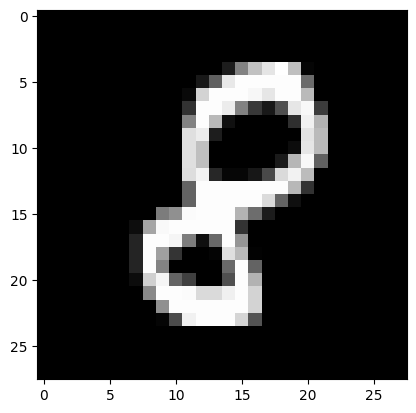

Prediction:  [4]


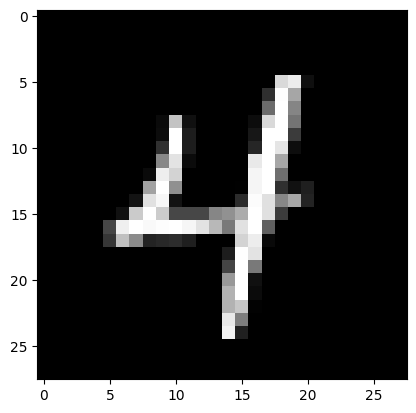

Prediction:  [0]


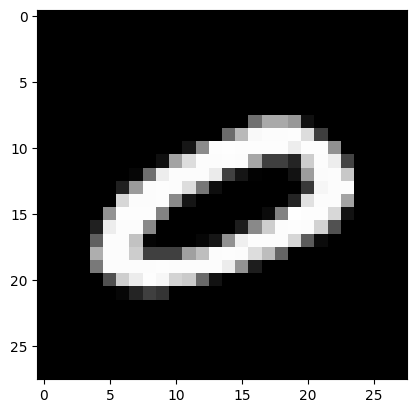

Prediction:  [5]


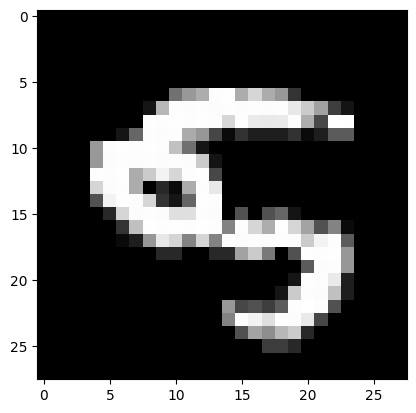

Prediction:  [0]


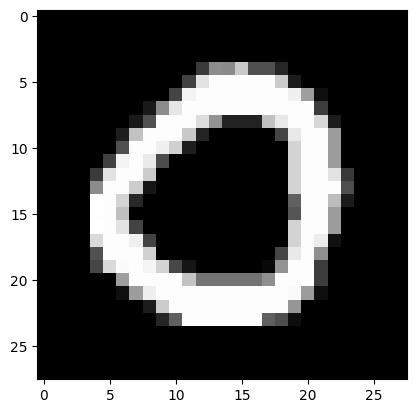

Prediction:  [2]


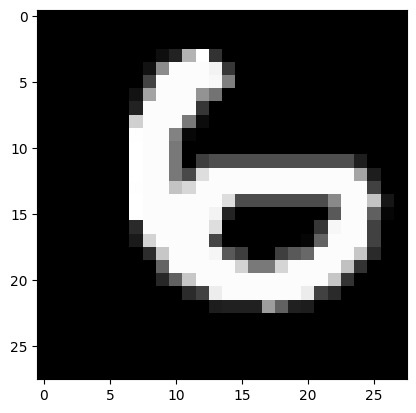

Prediction:  [0]


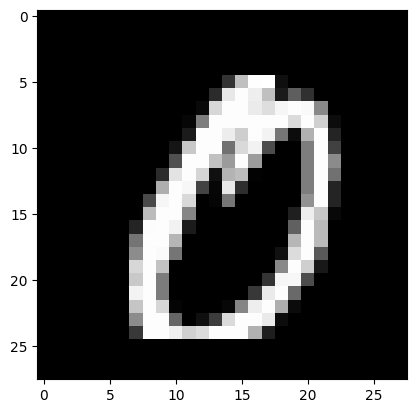

Prediction:  [4]


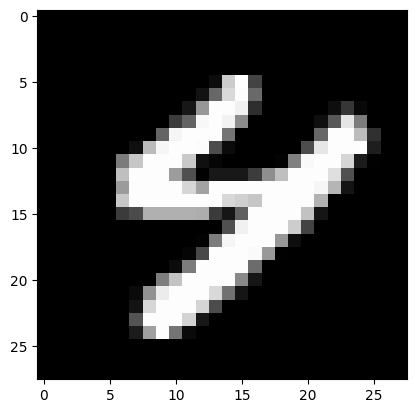

Prediction:  [4]


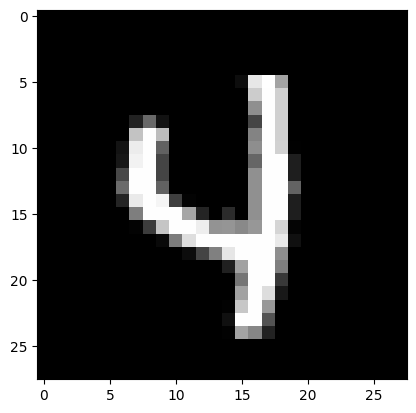

Prediction:  [2]


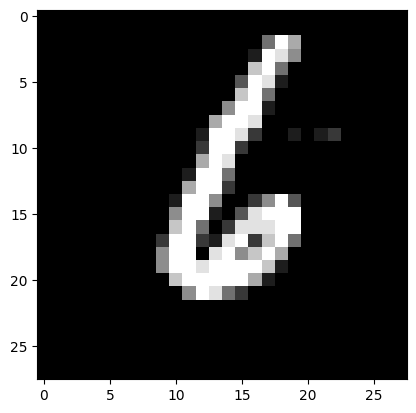

Prediction:  [5]


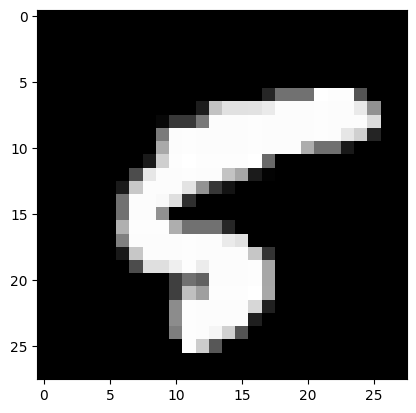

Prediction:  [3]


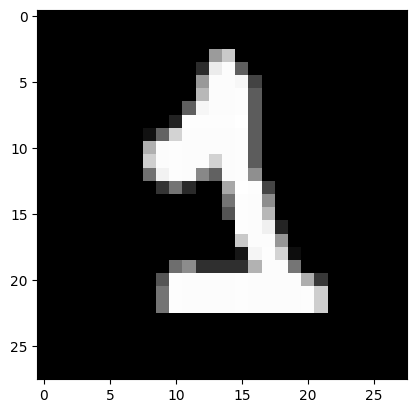

Prediction:  [2]


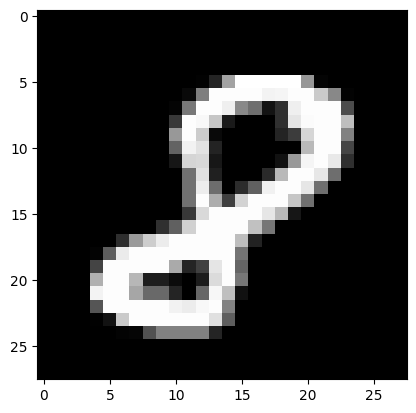

Prediction:  [1]


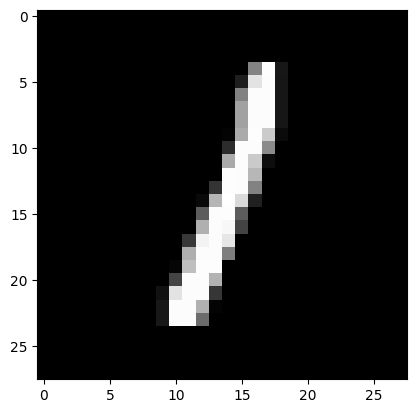

Prediction:  [3]


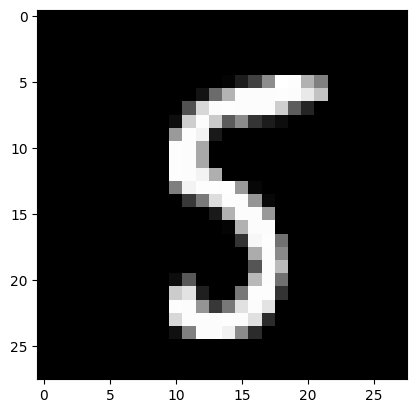

Prediction:  [3]


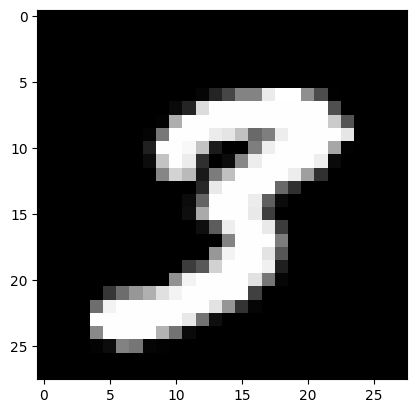

Prediction:  [2]


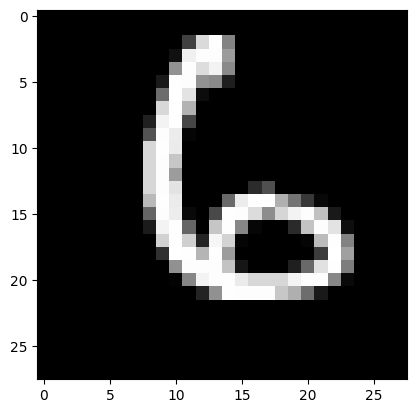

Prediction:  [2]


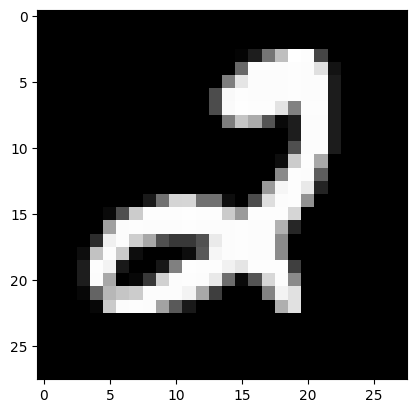

Prediction:  [3]


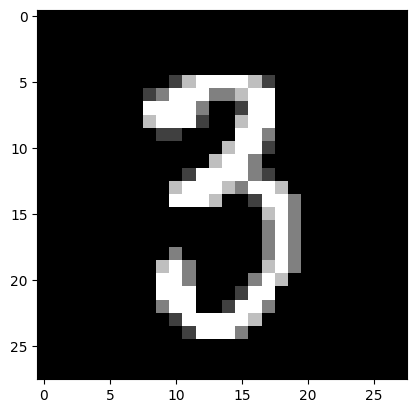

Prediction:  [2]


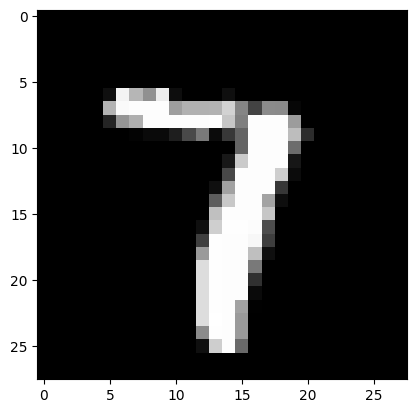

Prediction:  [4]


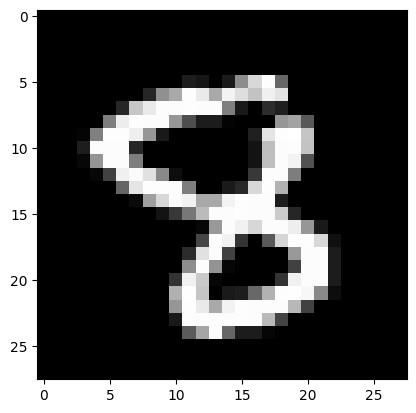

Prediction:  [4]


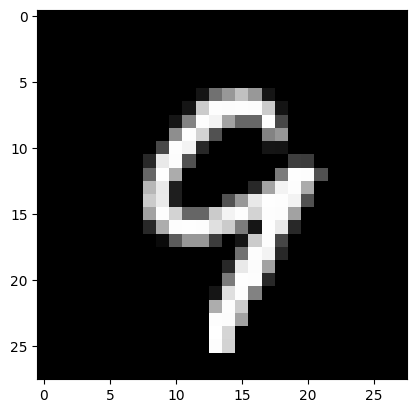

Prediction:  [1]


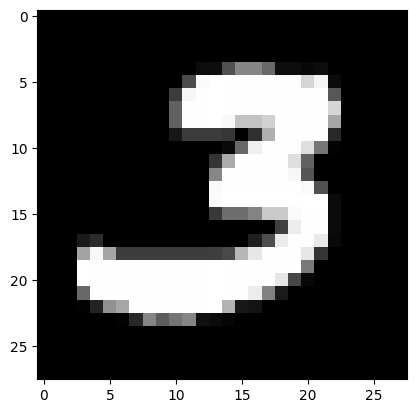

Prediction:  [1]


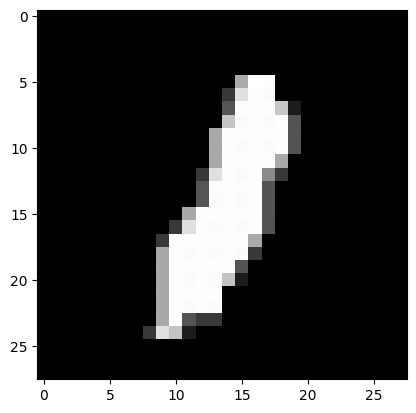

Prediction:  [0]


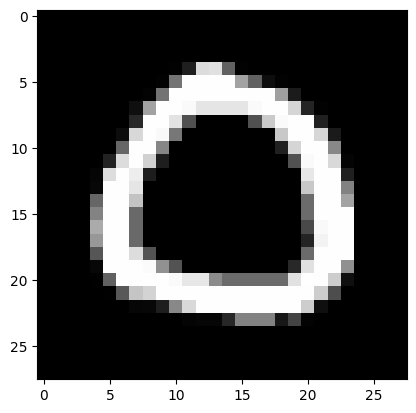

Prediction:  [1]


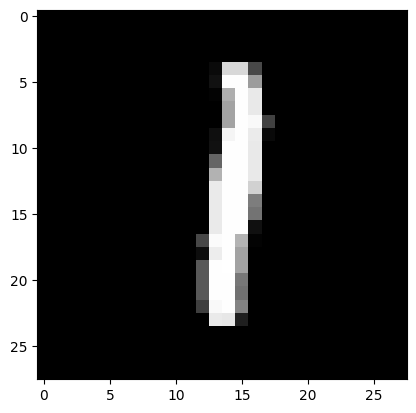

Prediction:  [0]


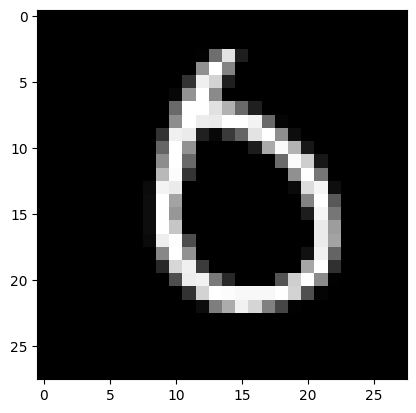

Prediction:  [6]


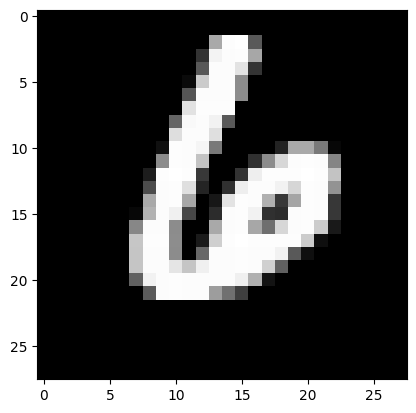

Prediction:  [3]


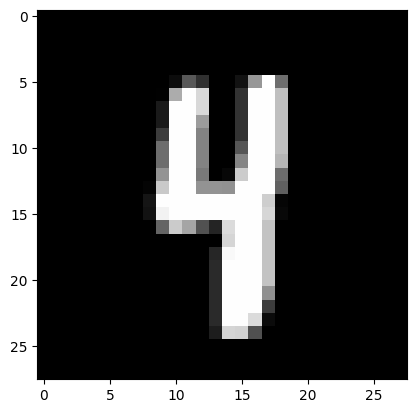

Prediction:  [2]


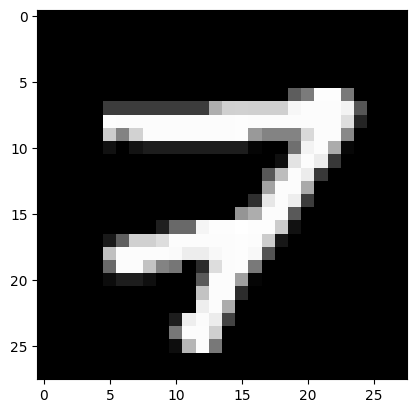

Prediction:  [5]


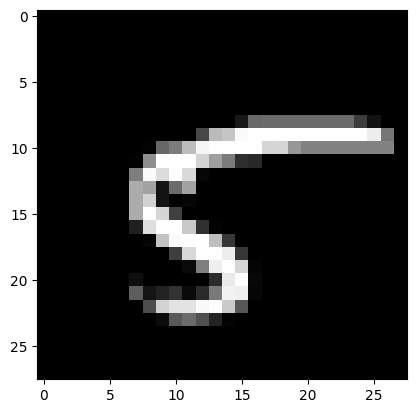

Prediction:  [7]


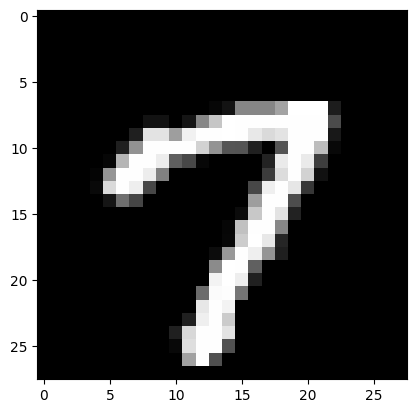

Prediction:  [1]


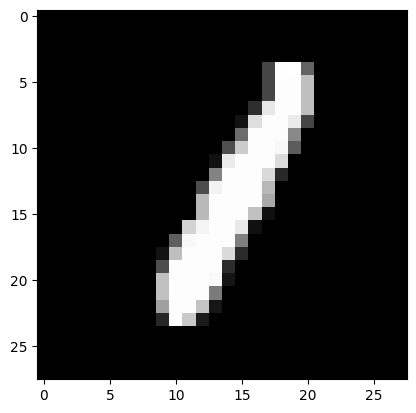

Prediction:  [1]


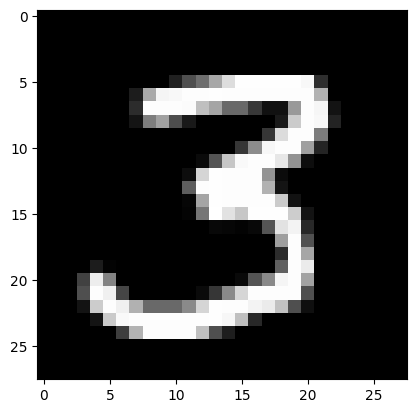

Prediction:  [2]


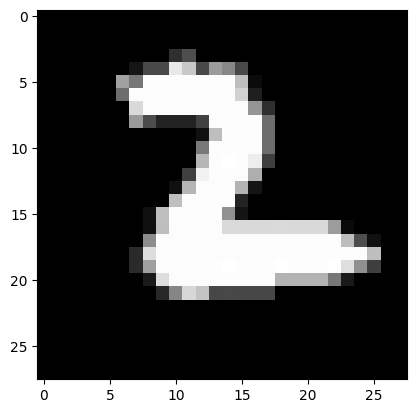

Prediction:  [3]


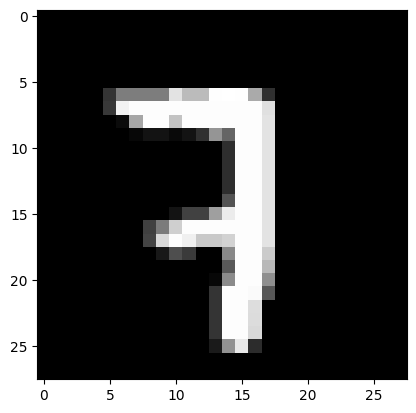

Prediction:  [7]


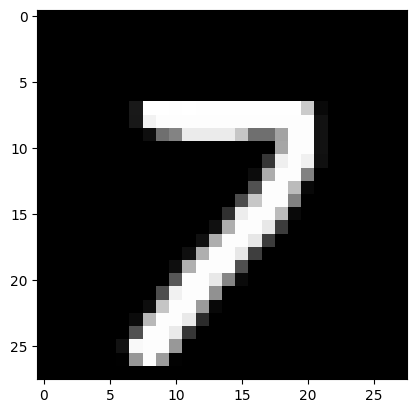

Prediction:  [1]


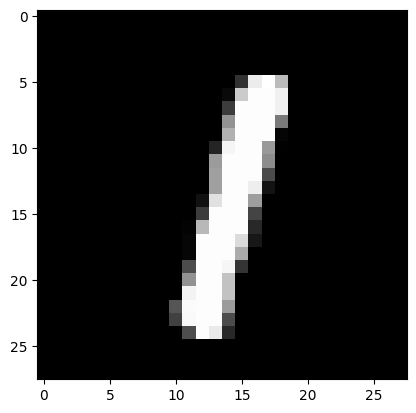

Prediction:  [5]


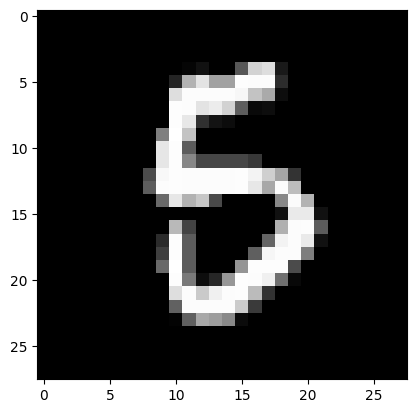

Prediction:  [1]


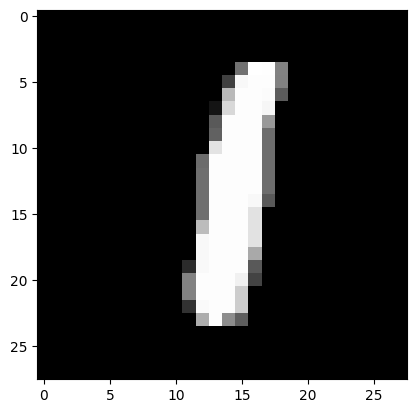

Prediction:  [3]


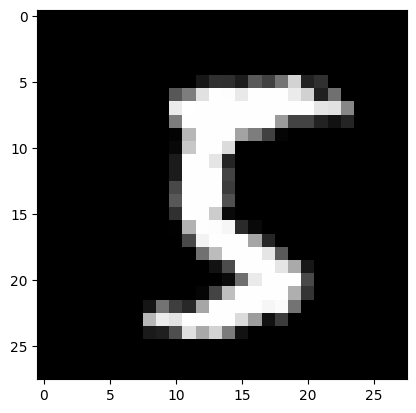

Prediction:  [4]


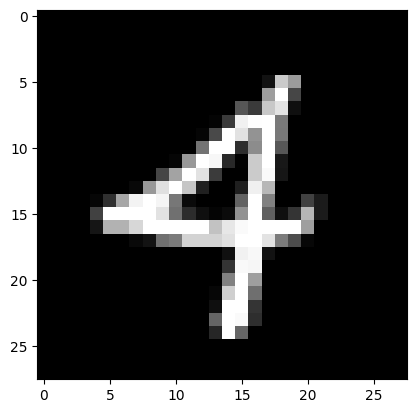

Prediction:  [4]


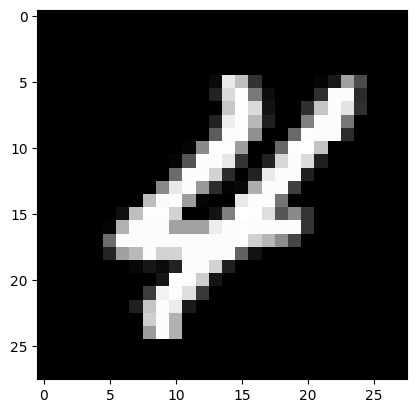

Prediction:  [3]


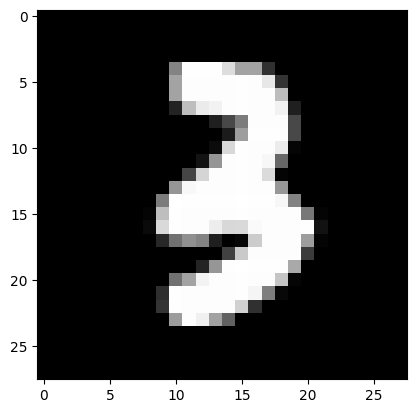

Prediction:  [4]


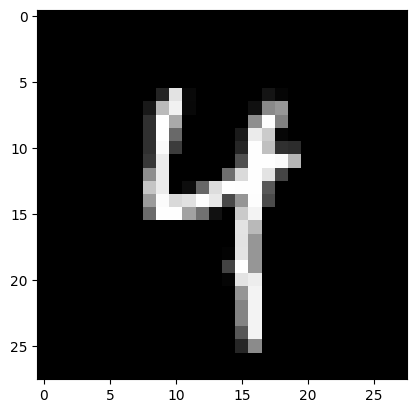

Prediction:  [3]


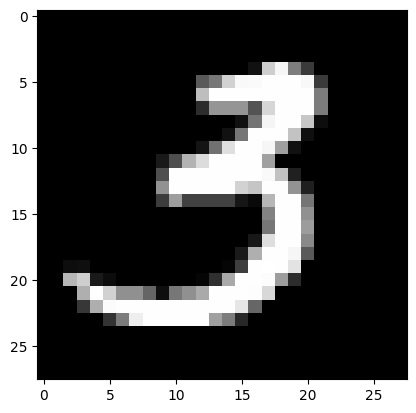

Prediction:  [4]


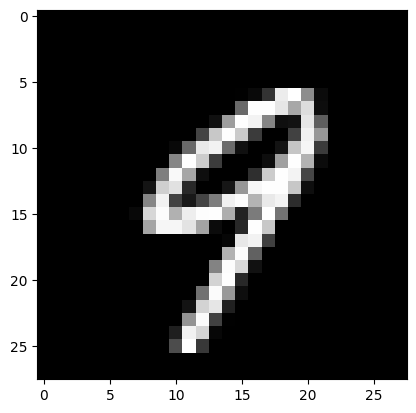

Prediction:  [0]


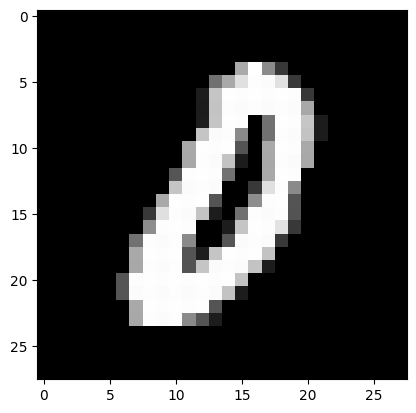

Prediction:  [7]


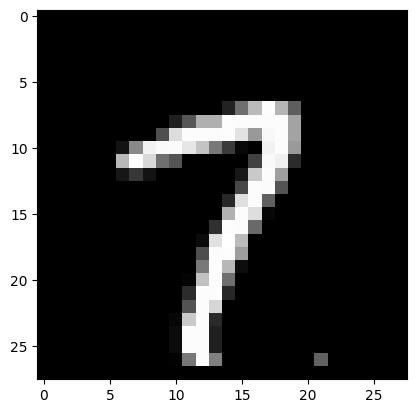

Prediction:  [2]


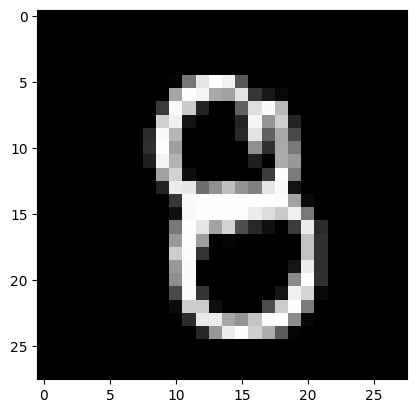

Prediction:  [6]


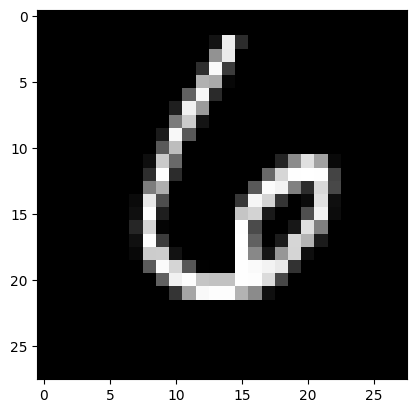

Prediction:  [4]


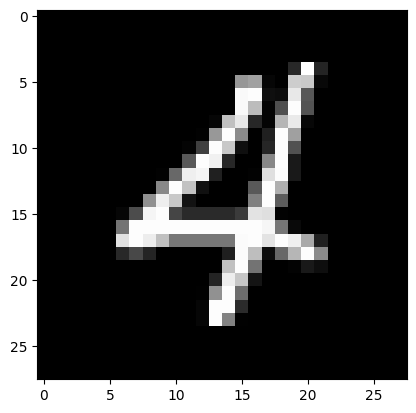

Prediction:  [3]


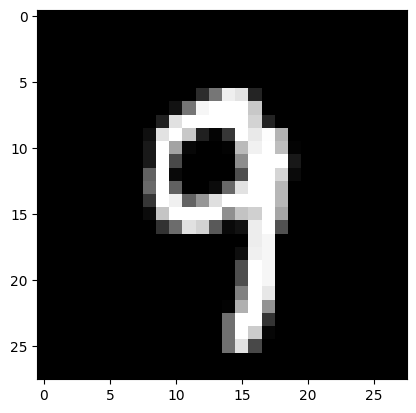

Prediction:  [4]


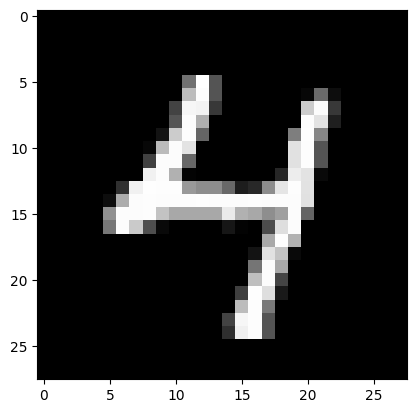

Prediction:  [2]


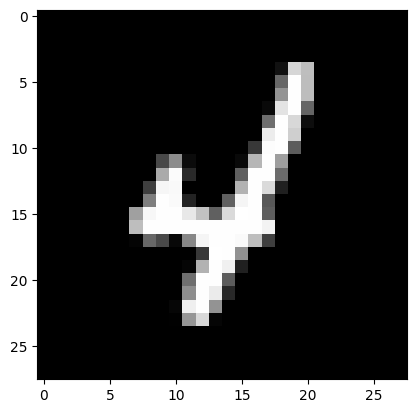

Prediction:  [1]


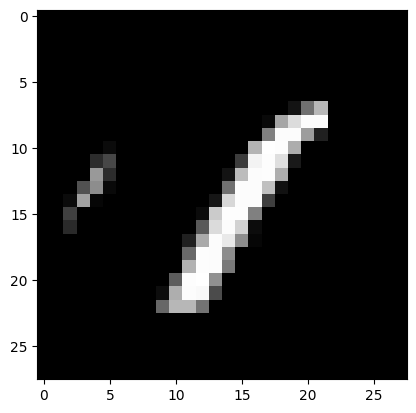

Prediction:  [4]


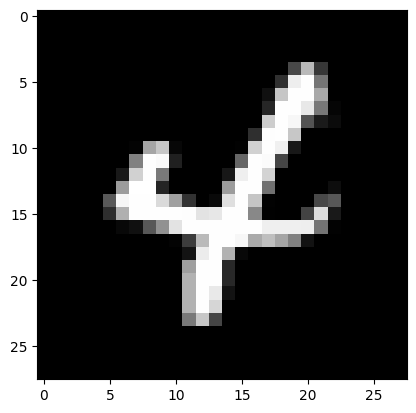

Prediction:  [7]


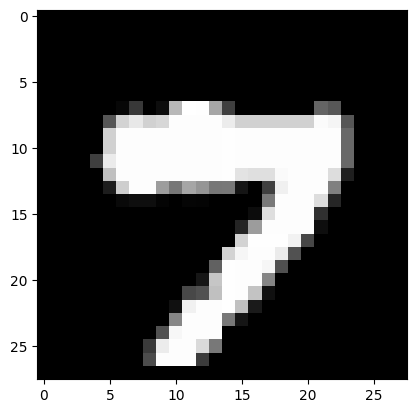

Prediction:  [1]


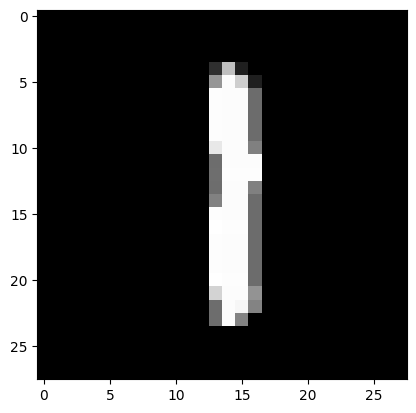

Prediction:  [1]


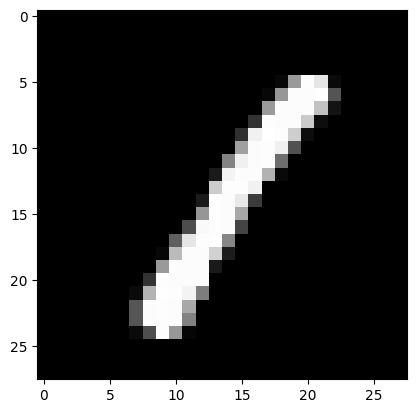

Prediction:  [5]


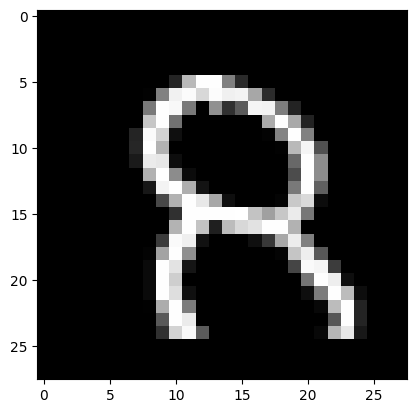

Prediction:  [2]


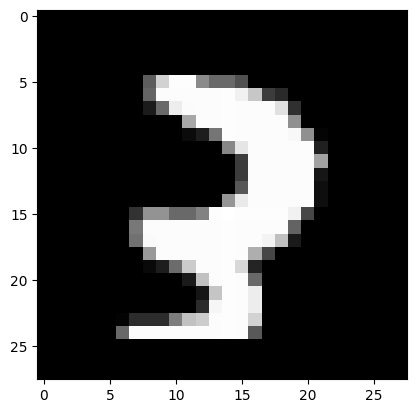

Prediction:  [0]


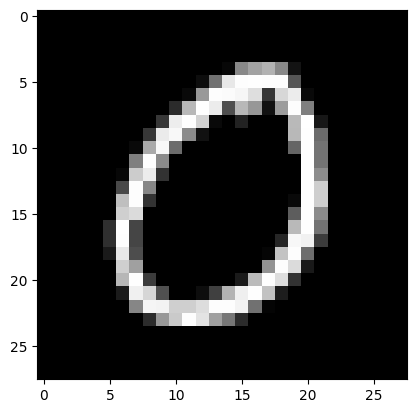

Prediction:  [2]


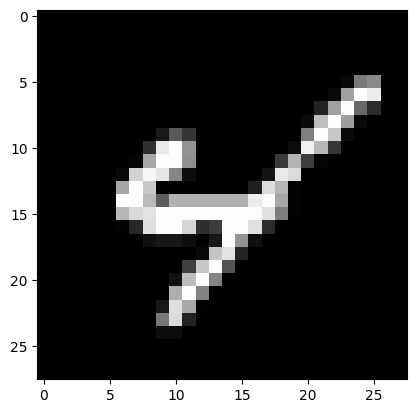

Prediction:  [0]


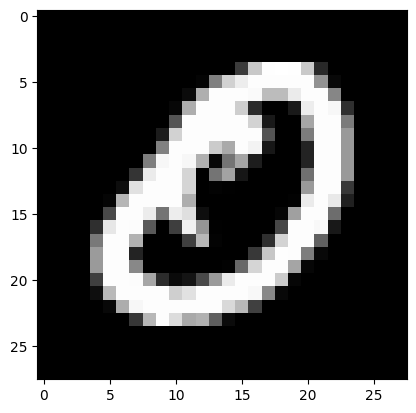

Prediction:  [4]


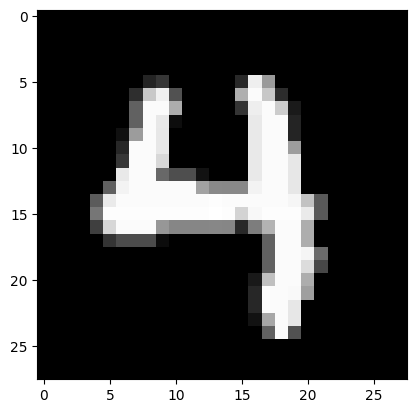

Prediction:  [0]


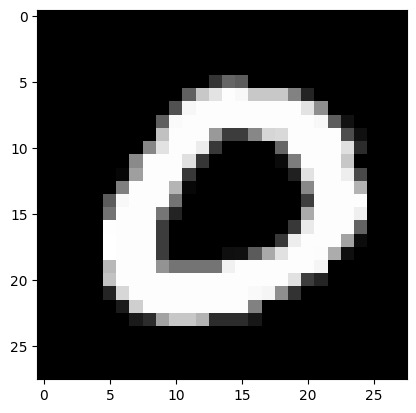

Prediction:  [0]


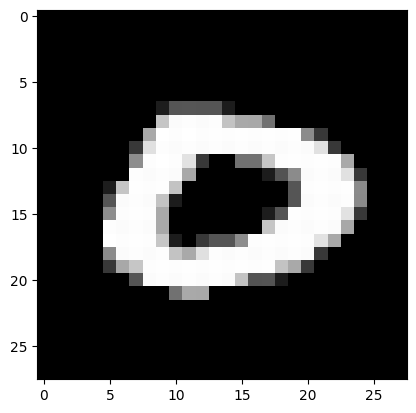

Prediction:  [3]


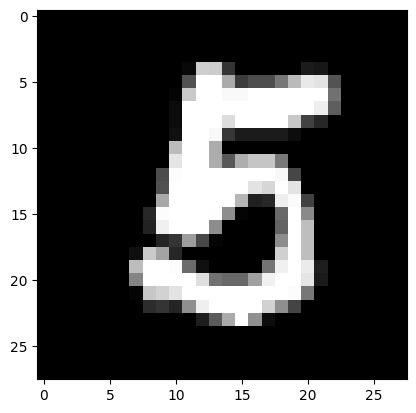

Prediction:  [1]


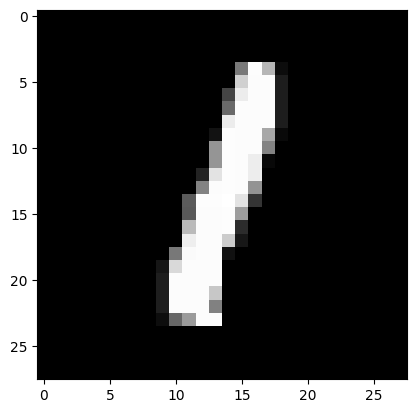

Prediction:  [2]


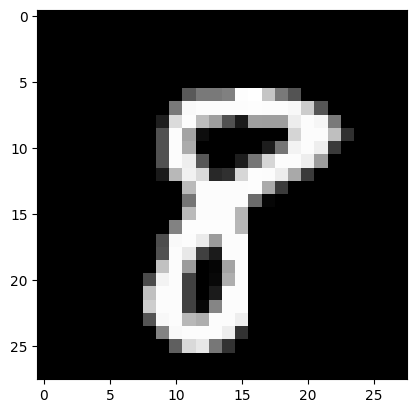

Prediction:  [0]


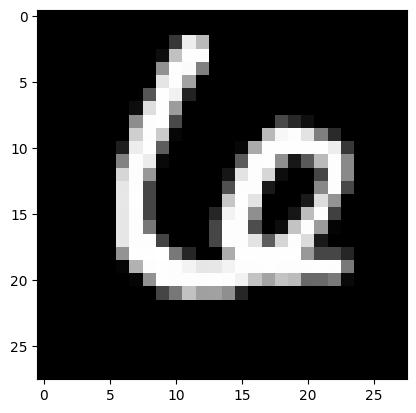

Prediction:  [3]


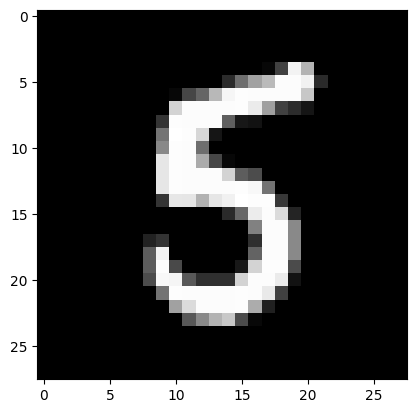

Prediction:  [0]


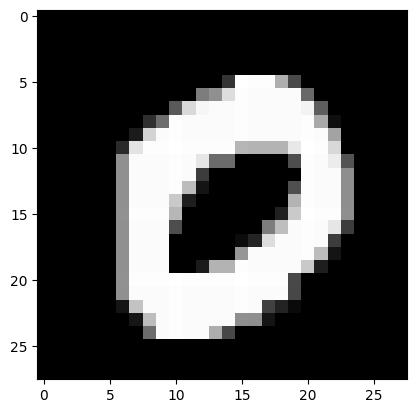

Prediction:  [1]


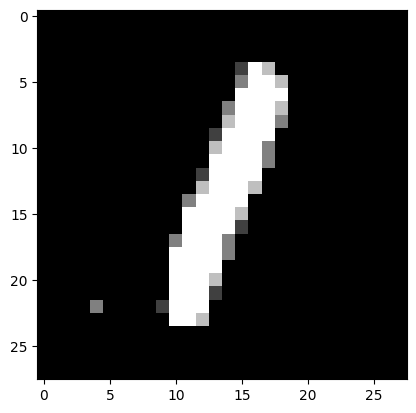

Prediction:  [0]


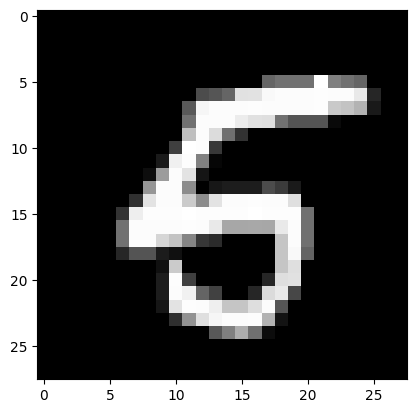

Prediction:  [1]


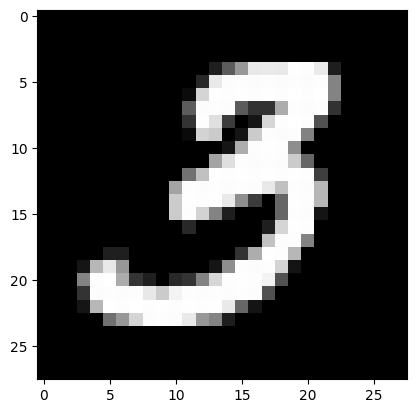

Prediction:  [4]


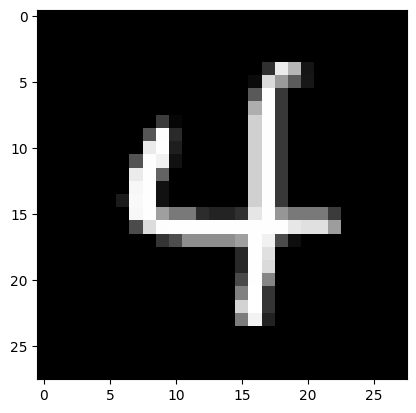

Prediction:  [6]


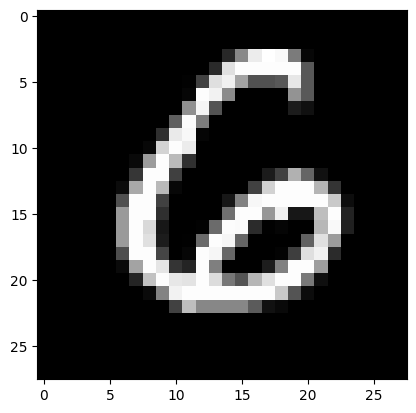

Prediction:  [3]


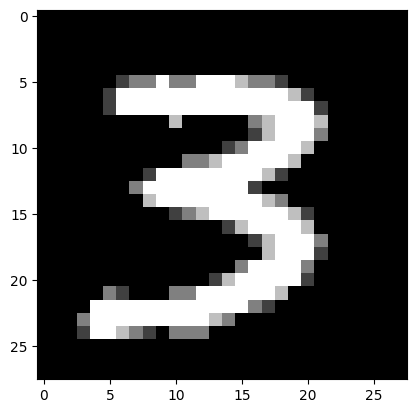

Prediction:  [1]


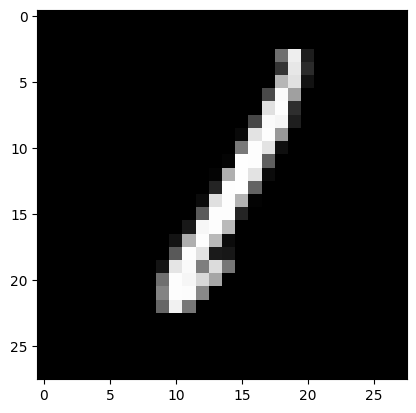

Prediction:  [1]


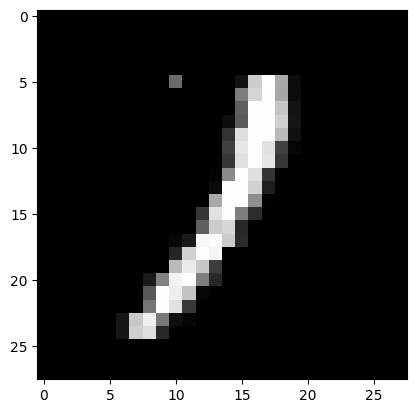

Prediction:  [6]


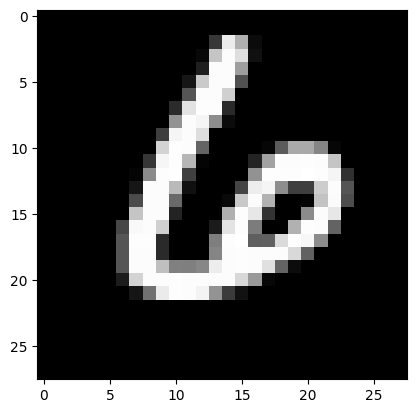

Prediction:  [4]


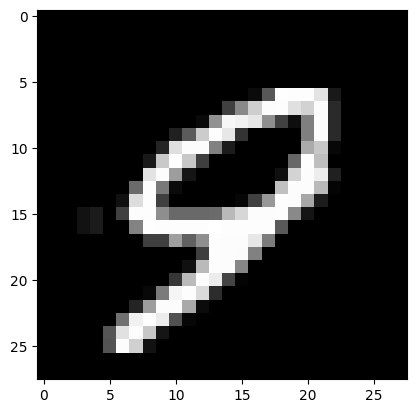

Prediction:  [2]


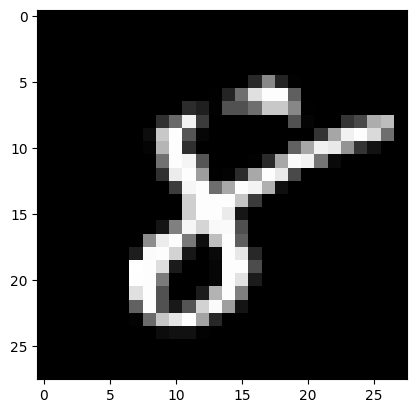

Prediction:  [1]


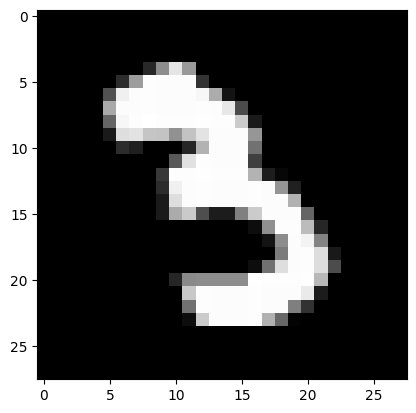

Prediction:  [5]


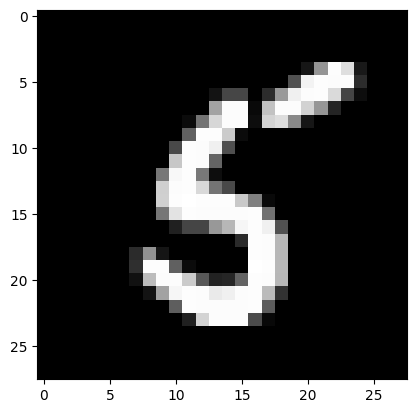

Prediction:  [3]


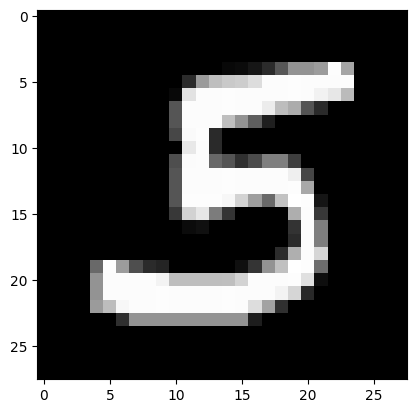

Prediction:  [4]


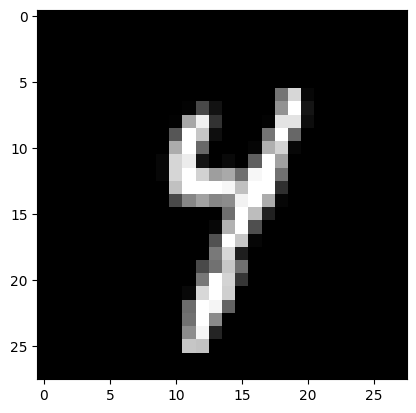

Prediction:  [3]


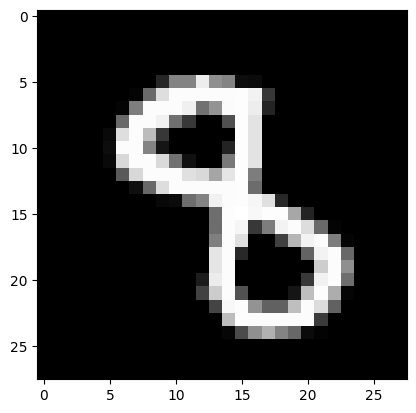

Prediction:  [0]


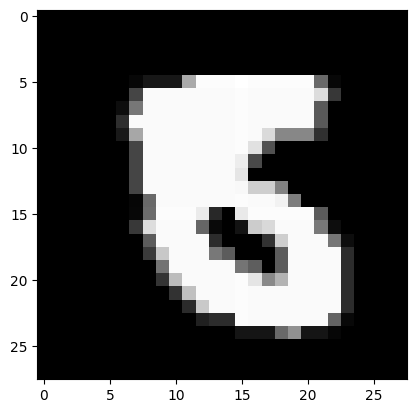

Prediction:  [3]


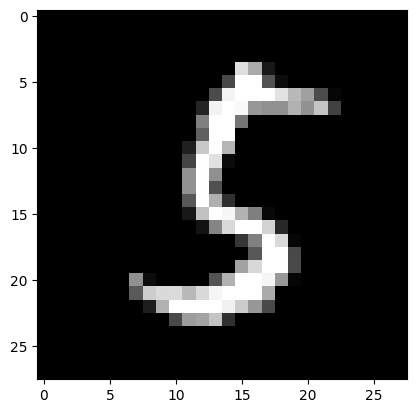

Prediction:  [0]


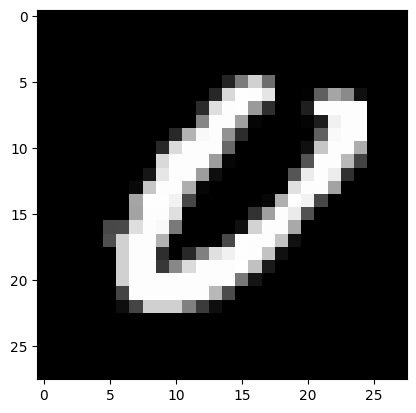

Prediction:  [4]


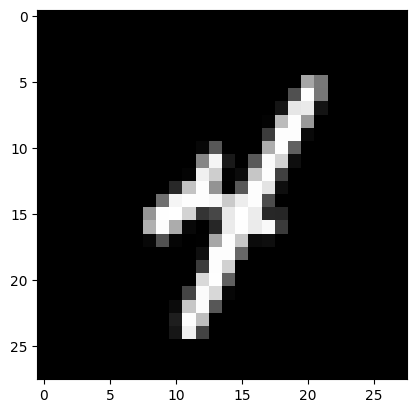

Prediction:  [0]


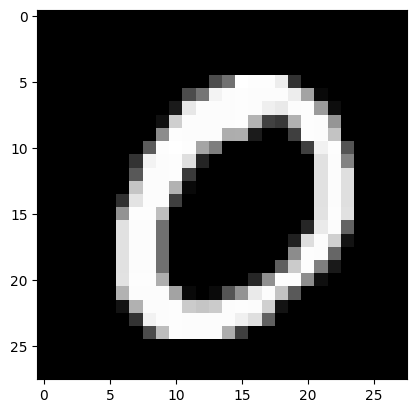

Prediction:  [4]


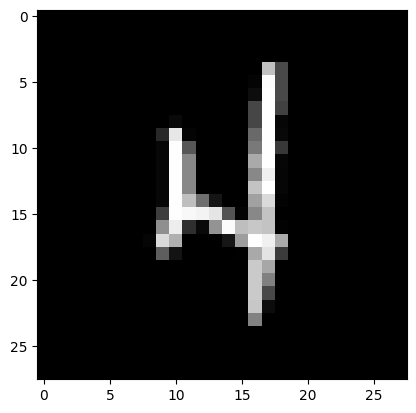

Prediction:  [2]


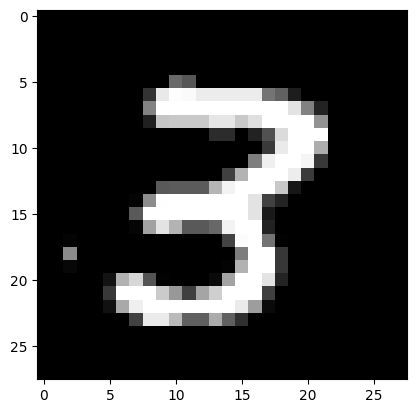

Prediction:  [1]


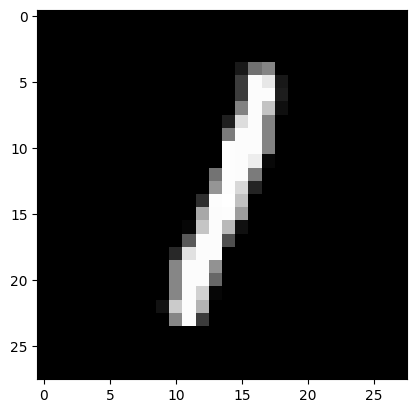

Prediction:  [6]


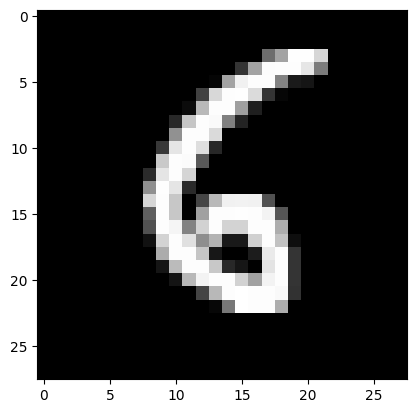

Prediction:  [3]


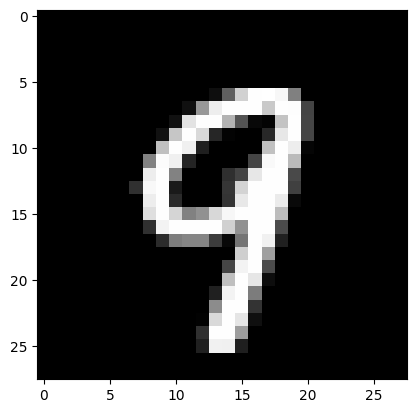

Prediction:  [7]


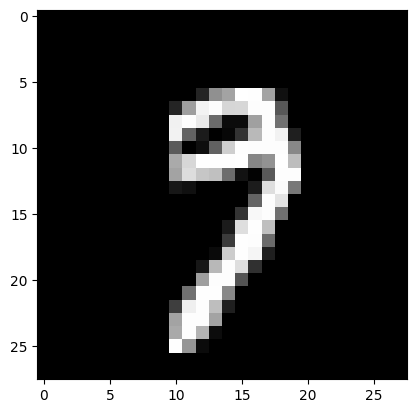

Prediction:  [1]


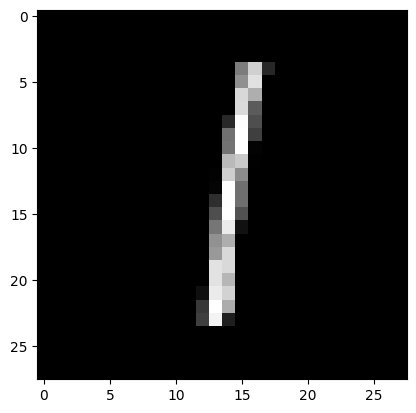

Prediction:  [1]


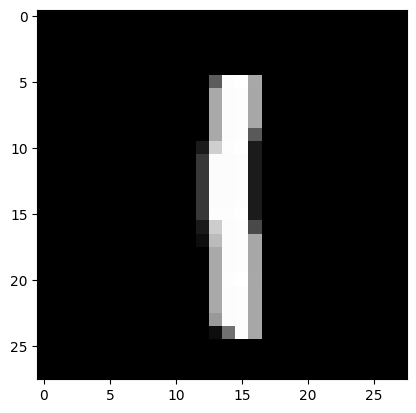

Prediction:  [1]


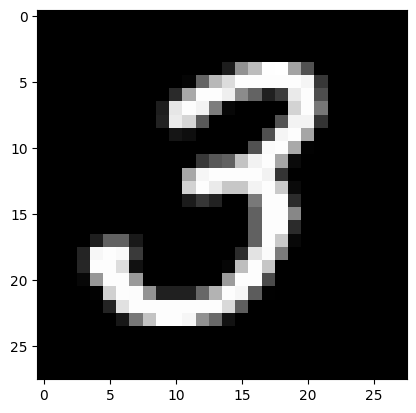

Prediction:  [3]


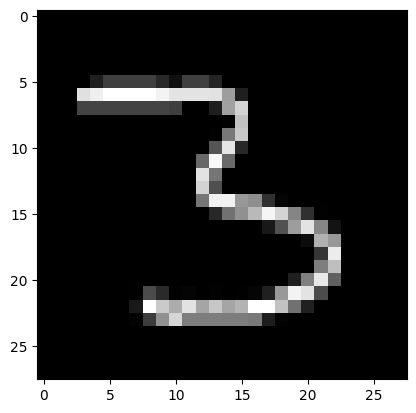

Prediction:  [1]


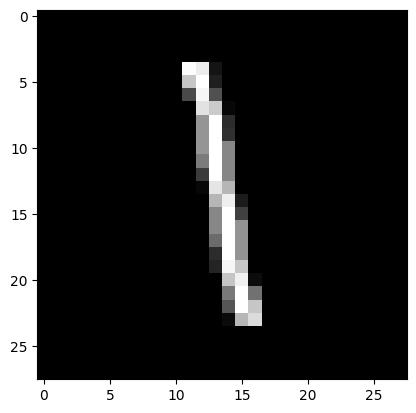

Prediction:  [4]


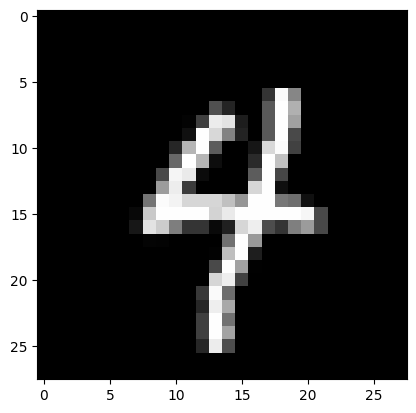

Prediction:  [4]


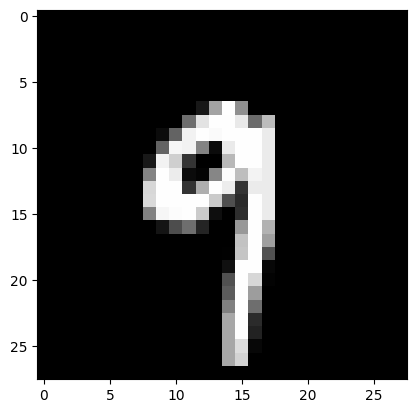

Prediction:  [2]


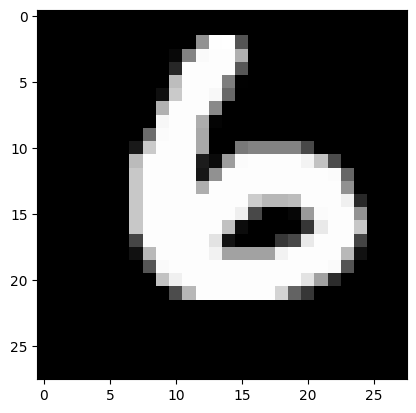

Prediction:  [4]


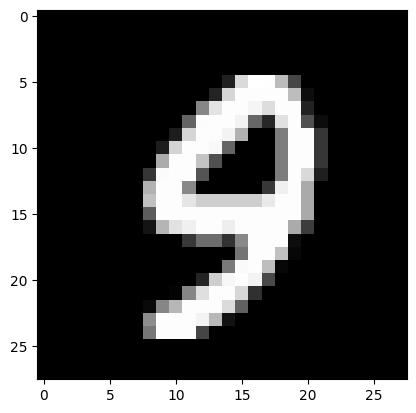

Prediction:  [1]


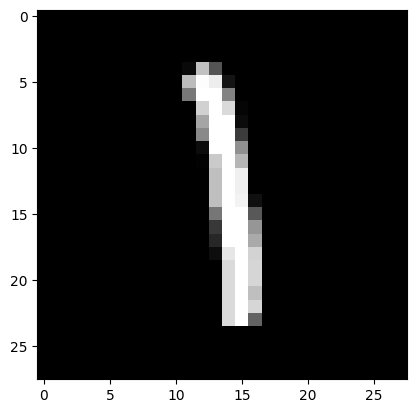

Prediction:  [5]


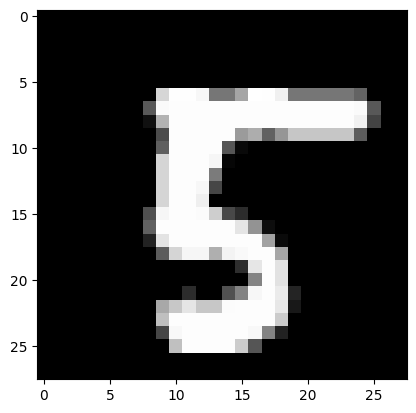

Prediction:  [4]


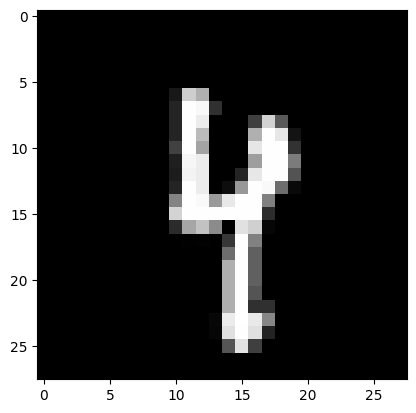

Prediction:  [2]


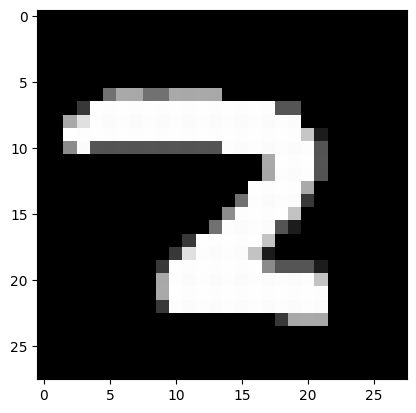

Prediction:  [2]


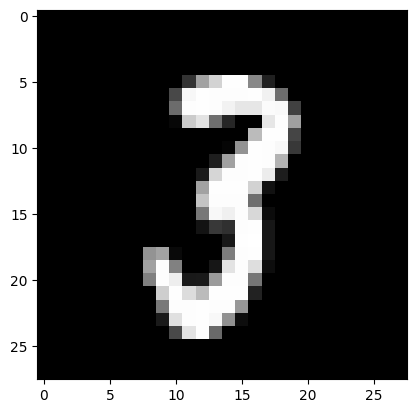

Prediction:  [2]


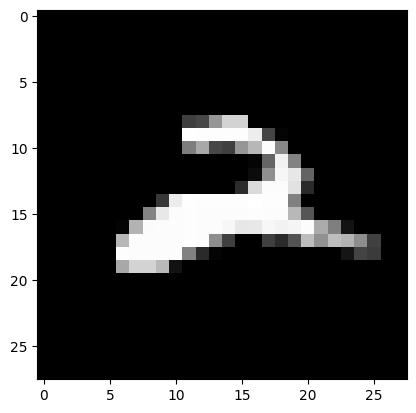

Prediction:  [4]


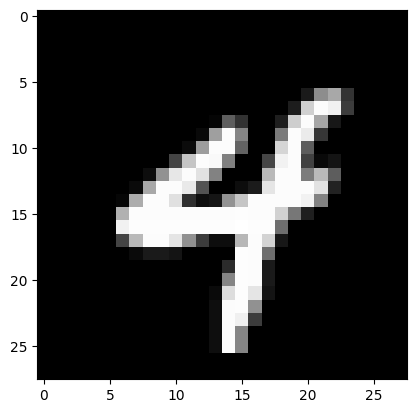

Prediction:  [0]


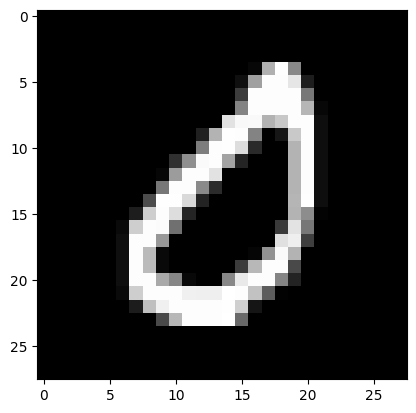

Prediction:  [4]


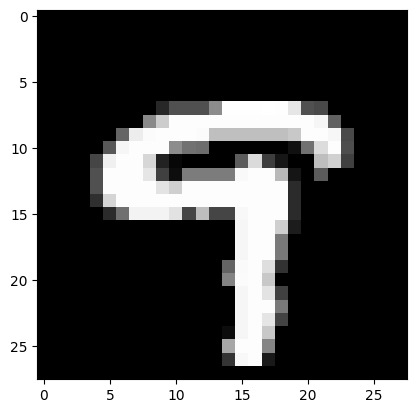

Prediction:  [7]


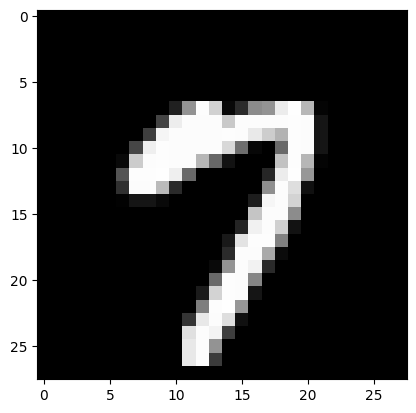

Prediction:  [4]


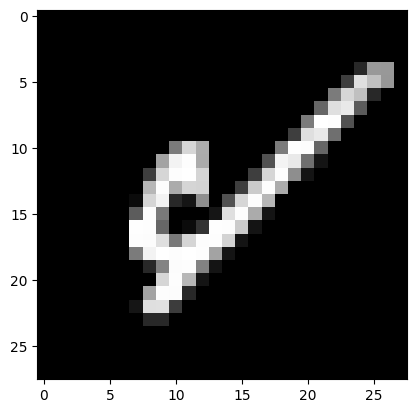

Prediction:  [3]


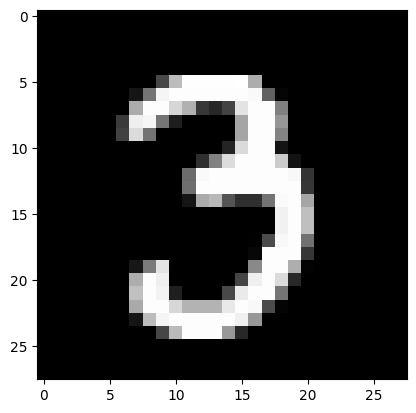

Prediction:  [0]


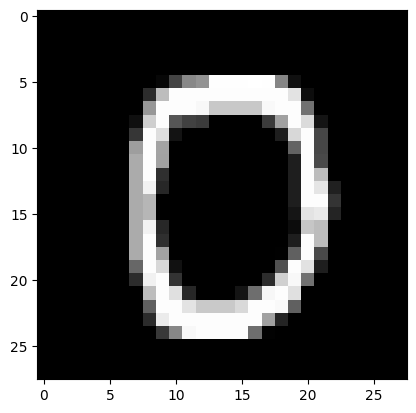

Prediction:  [5]


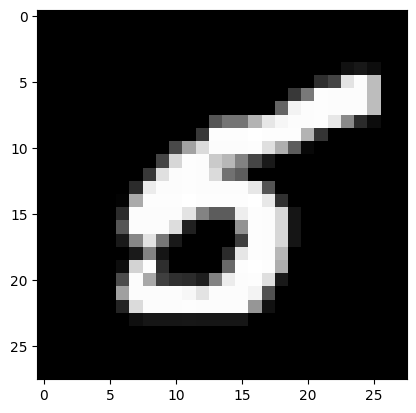

Prediction:  [0]


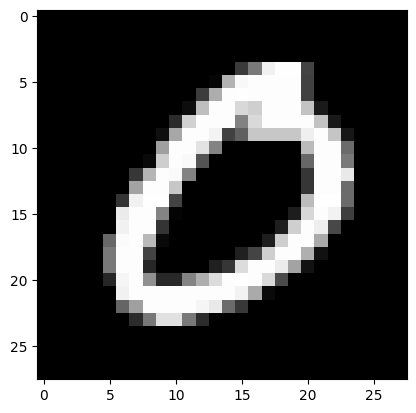

Prediction:  [1]


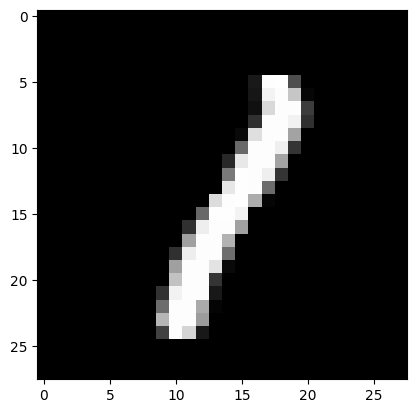

Prediction:  [4]


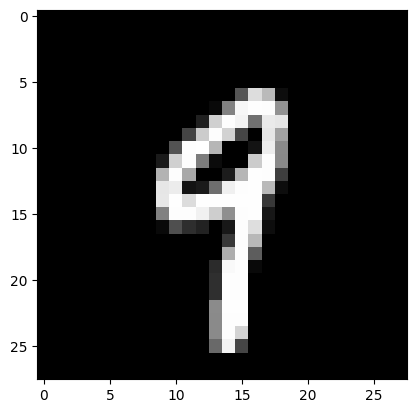

Prediction:  [0]


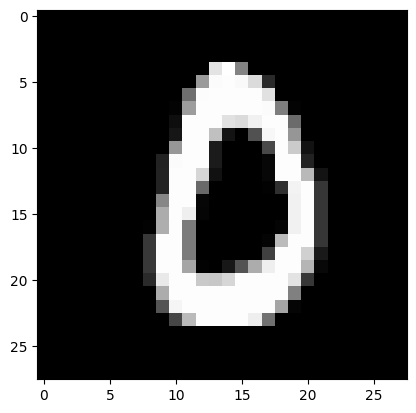

Prediction:  [4]


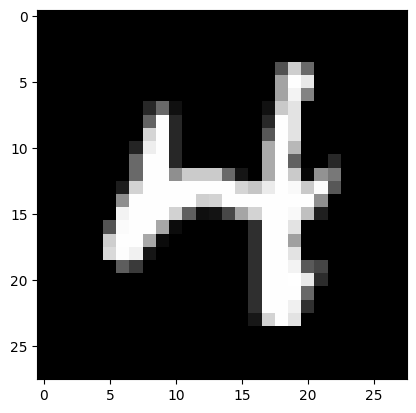

Prediction:  [4]


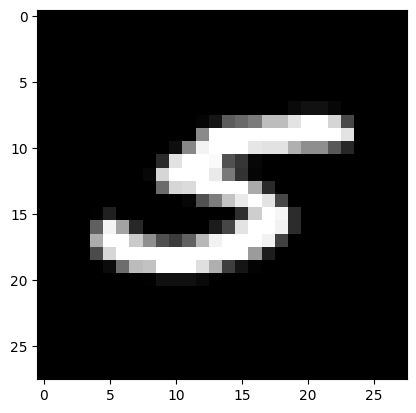

Prediction:  [2]


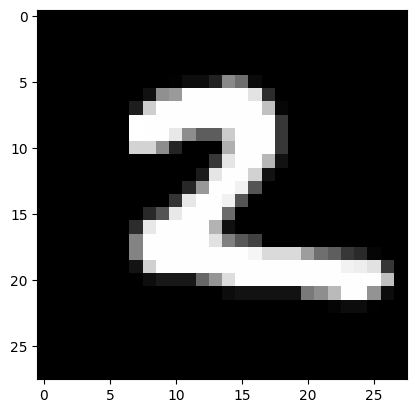

Prediction:  [2]


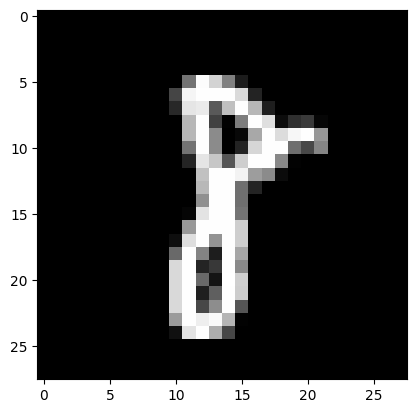

Prediction:  [6]


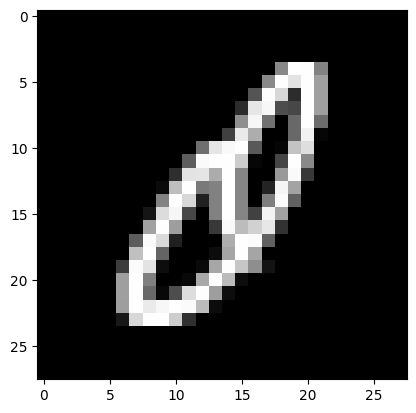

Prediction:  [3]


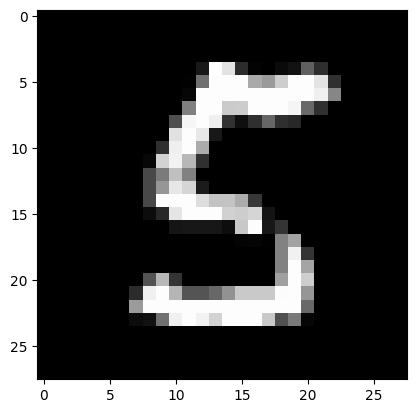

Prediction:  [4]


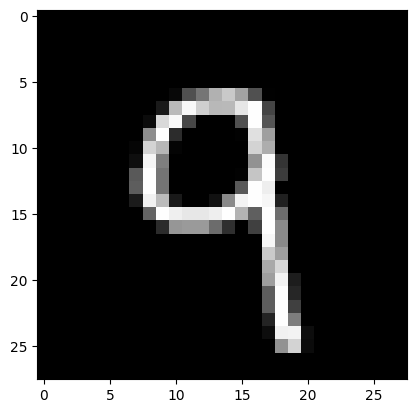

Prediction:  [3]


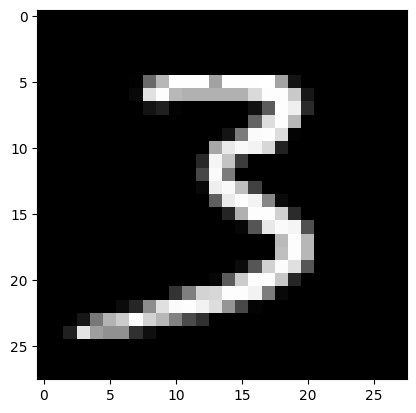

Prediction:  [3]


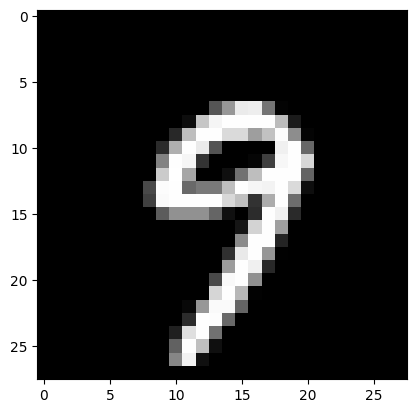

Prediction:  [0]


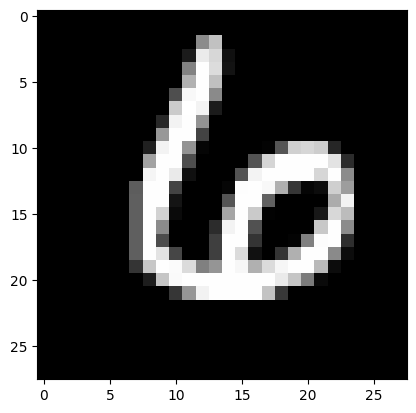

Prediction:  [1]


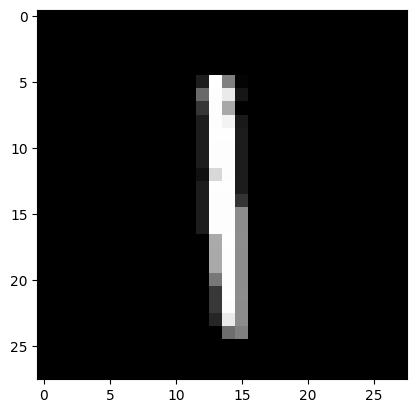

Prediction:  [3]


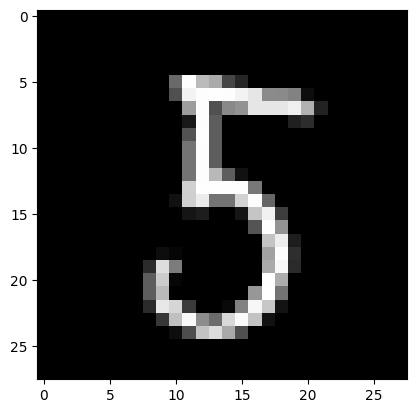

Prediction:  [1]


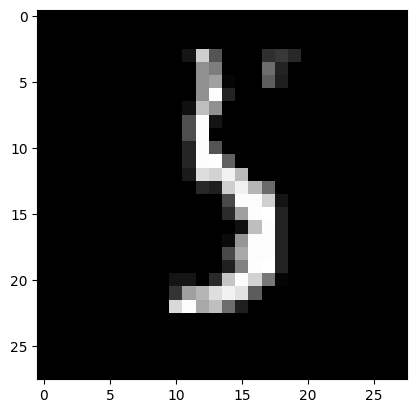

Prediction:  [1]


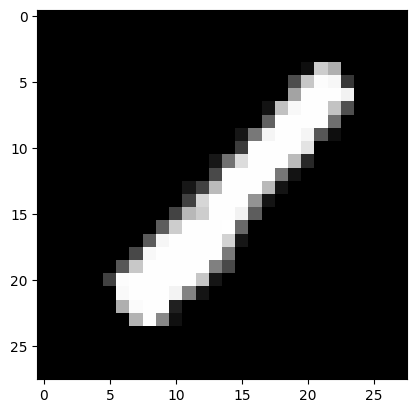

Prediction:  [4]


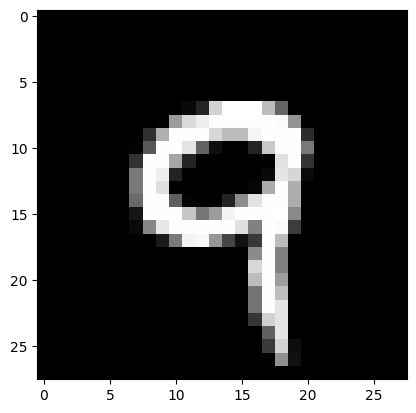

Prediction:  [0]


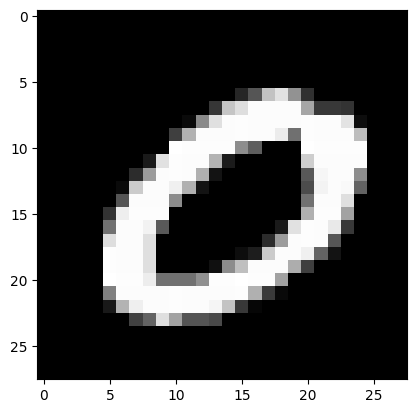

Prediction:  [2]


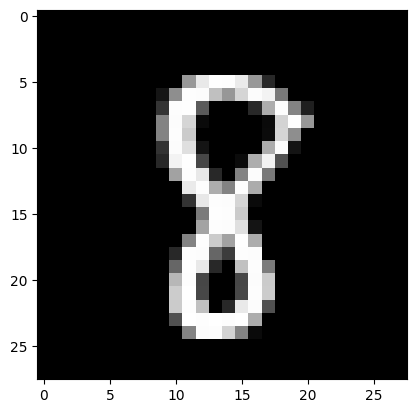

Prediction:  [4]


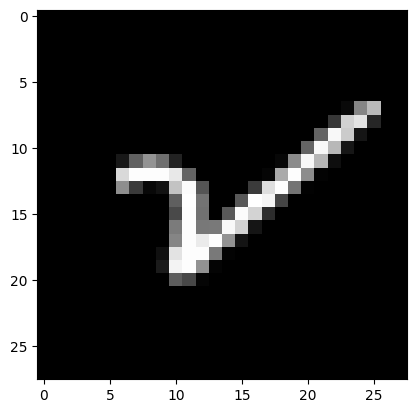

Prediction:  [5]


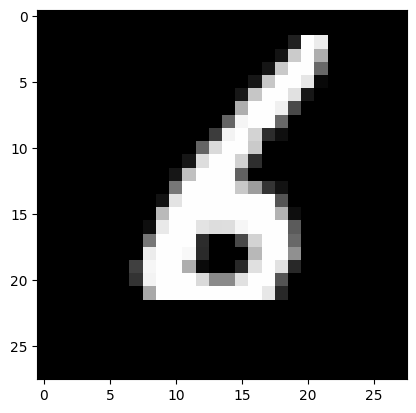

Prediction:  [7]


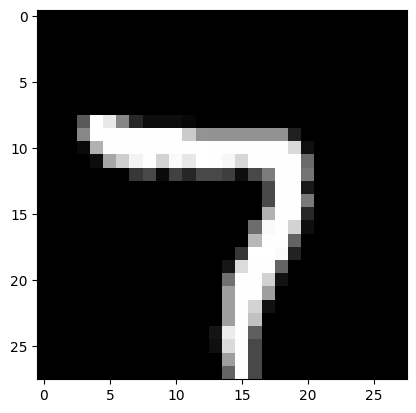

Prediction:  [2]


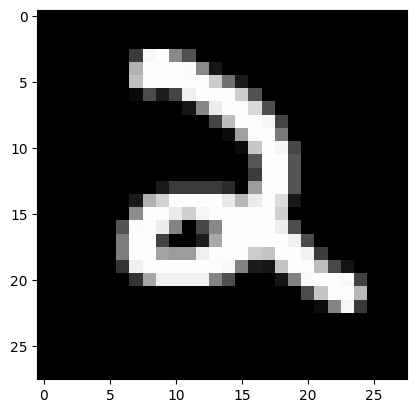

Prediction:  [2]


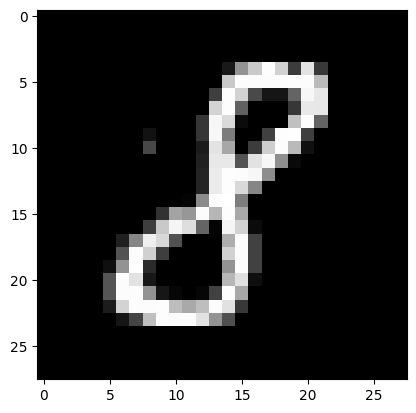

Prediction:  [3]


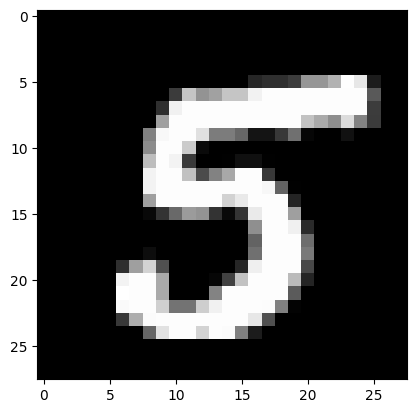

Prediction:  [8]


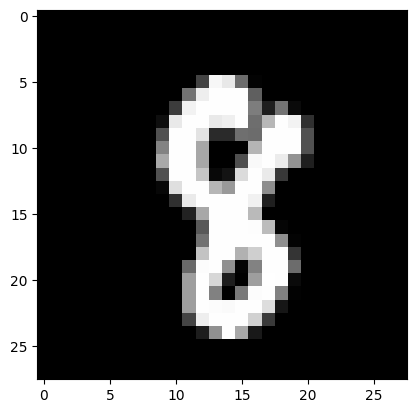

Prediction:  [3]


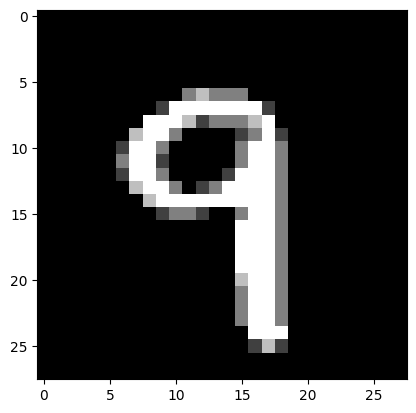

Prediction:  [7]


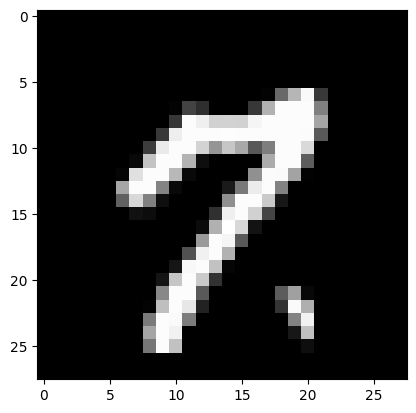

Prediction:  [7]


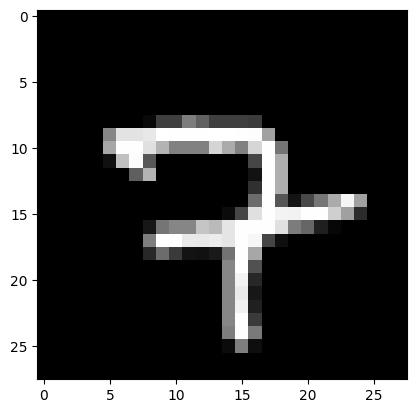

Prediction:  [1]


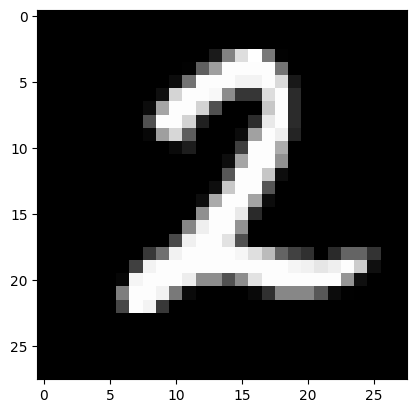

Prediction:  [3]


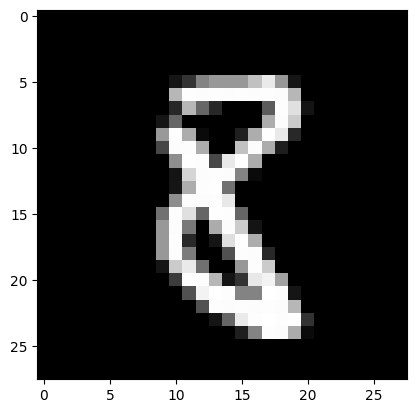

Prediction:  [1]


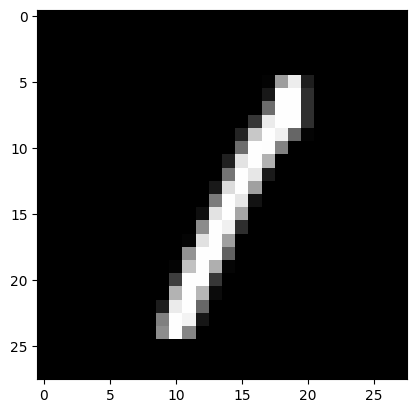

Prediction:  [1]


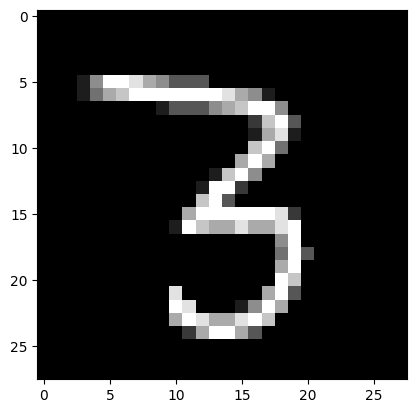

Prediction:  [4]


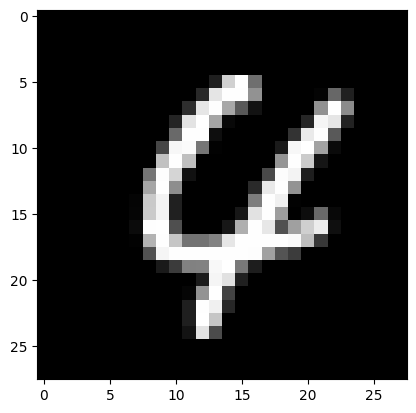

Prediction:  [5]


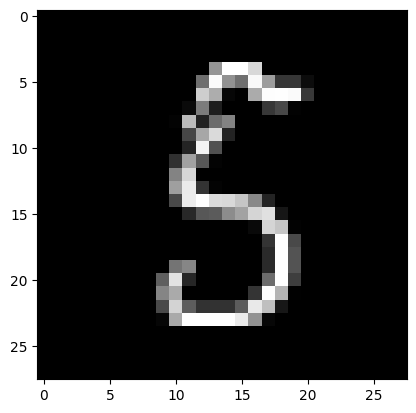

Prediction:  [0]


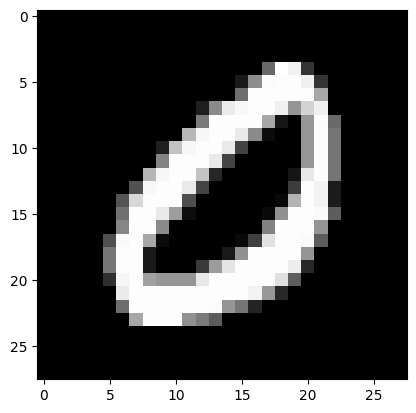

Prediction:  [4]


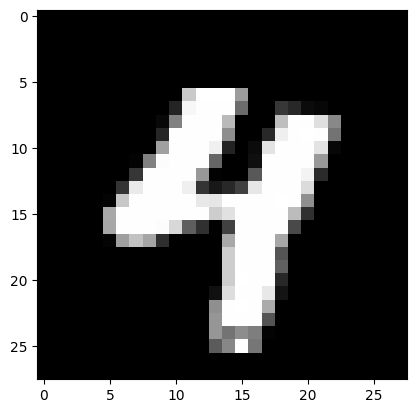

Prediction:  [1]


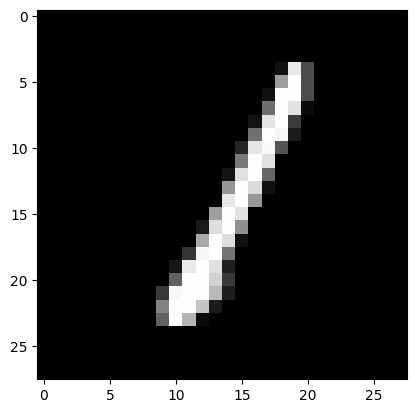

Prediction:  [4]


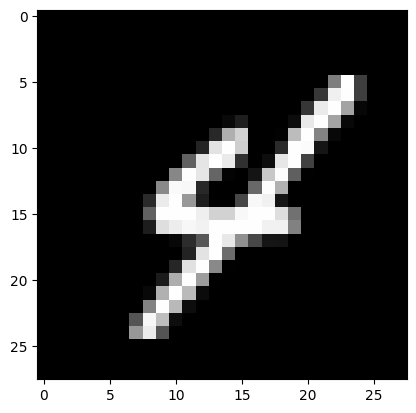

Prediction:  [2]


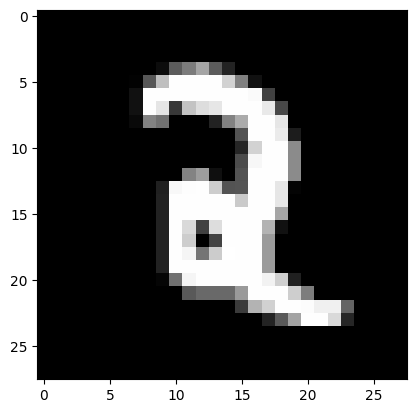

Prediction:  [1]


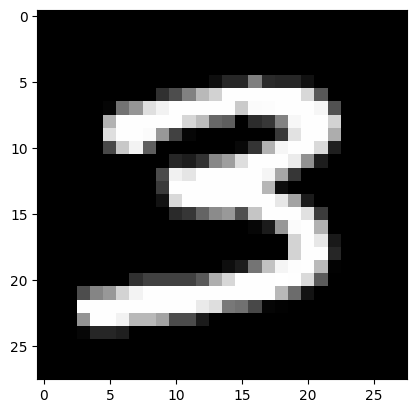

Prediction:  [6]


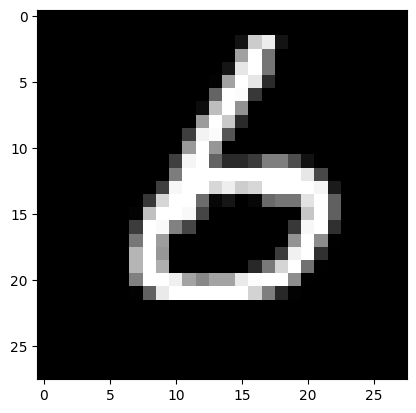

Prediction:  [4]


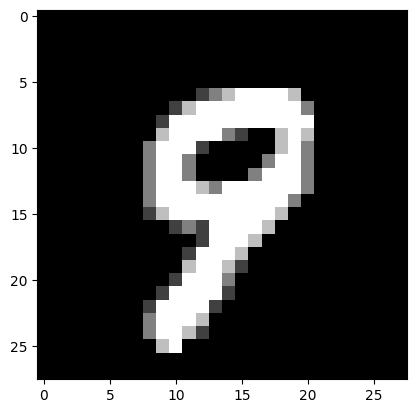

Prediction:  [2]


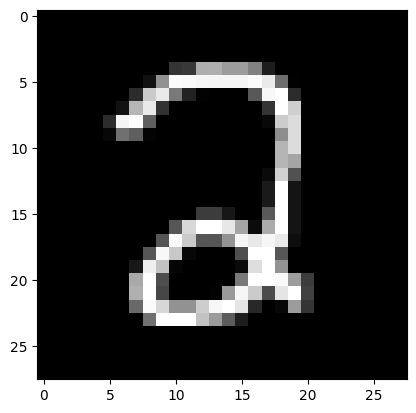

Prediction:  [3]


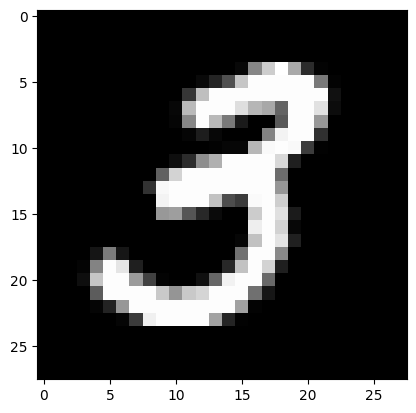

Prediction:  [4]


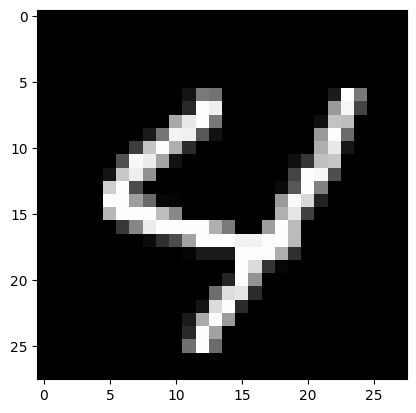

Prediction:  [4]


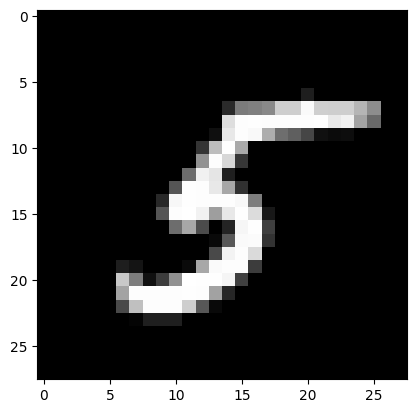

Prediction:  [4]


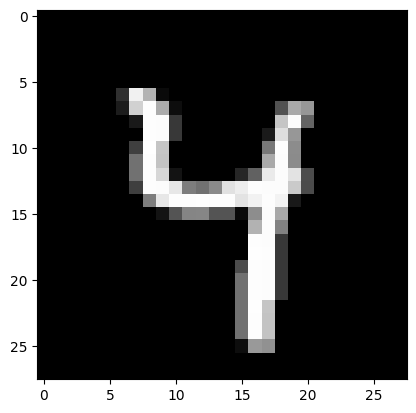

Prediction:  [2]


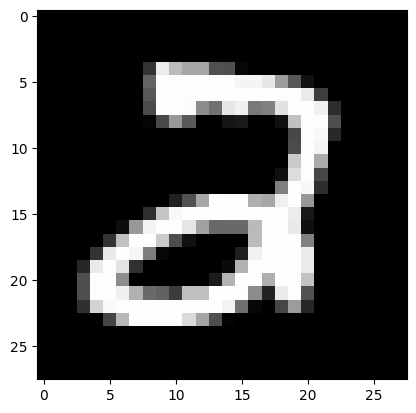

Prediction:  [3]


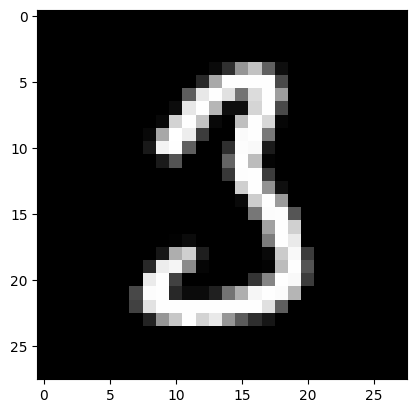

Prediction:  [3]


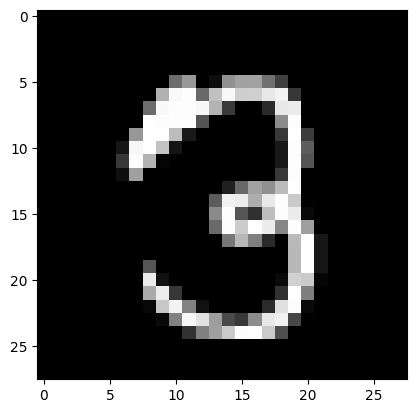

Prediction:  [1]


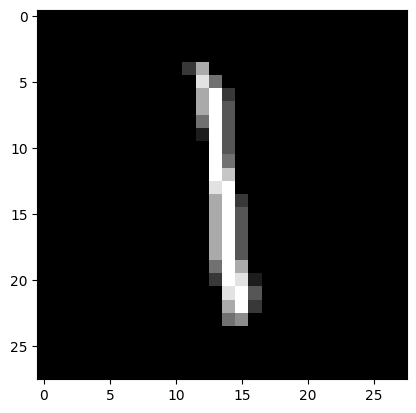

Prediction:  [1]


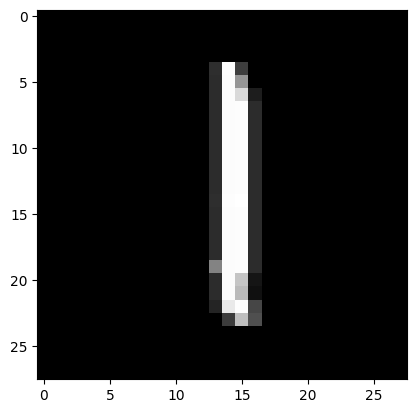

Prediction:  [0]


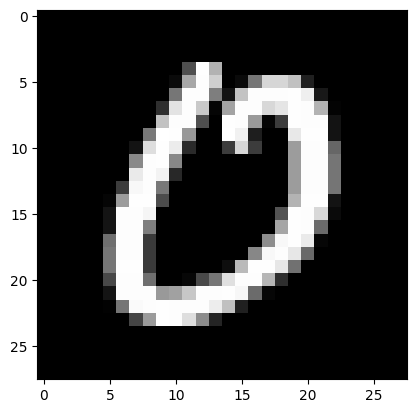

Prediction:  [1]


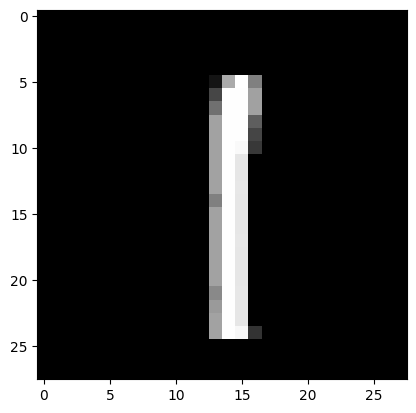

Prediction:  [4]


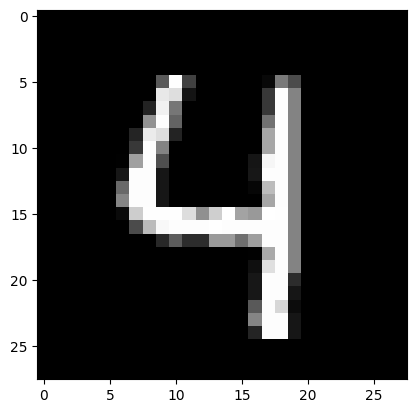

Prediction:  [4]


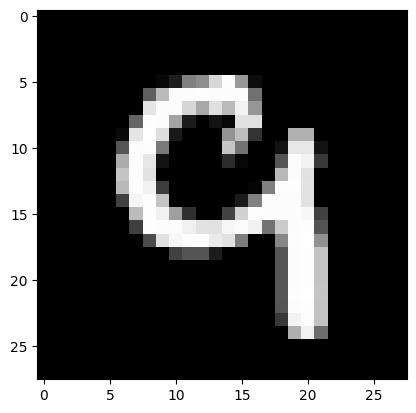

Prediction:  [1]


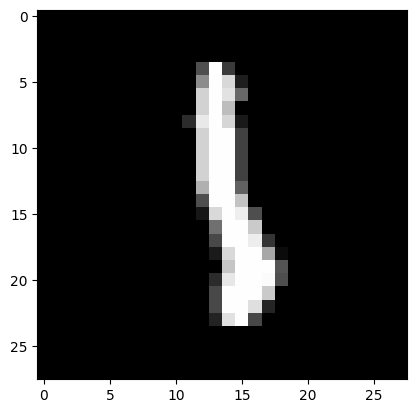

Prediction:  [1]


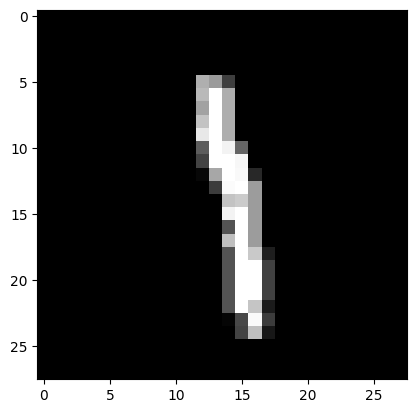

Prediction:  [2]


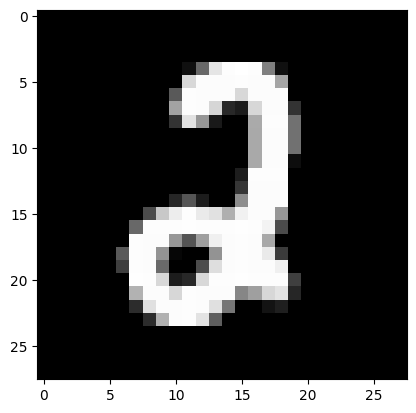

Prediction:  [3]


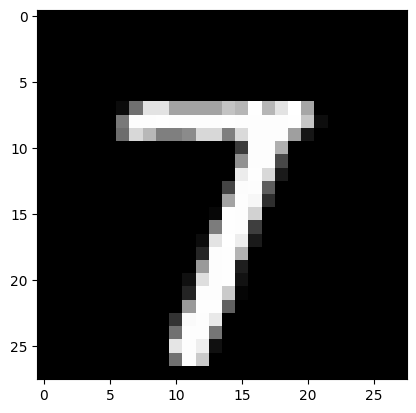

Prediction:  [1]


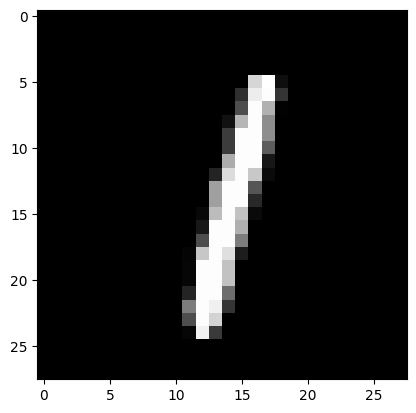

Prediction:  [3]


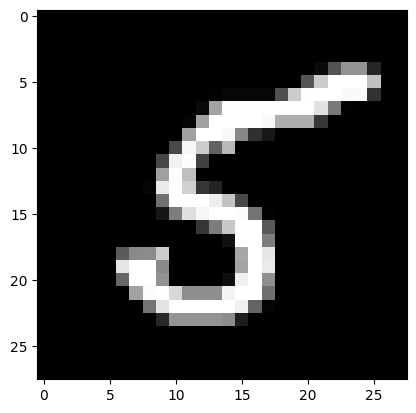

Prediction:  [4]


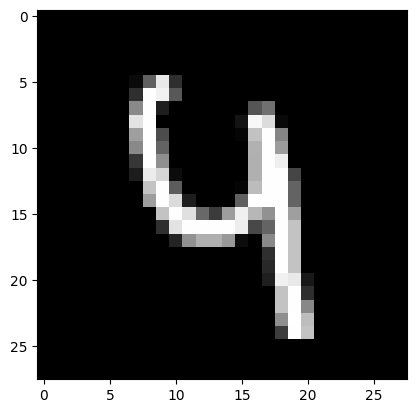

Prediction:  [4]


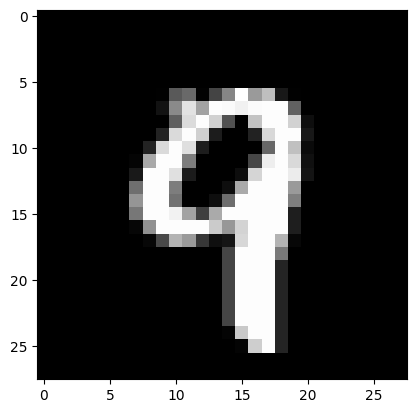

Prediction:  [1]


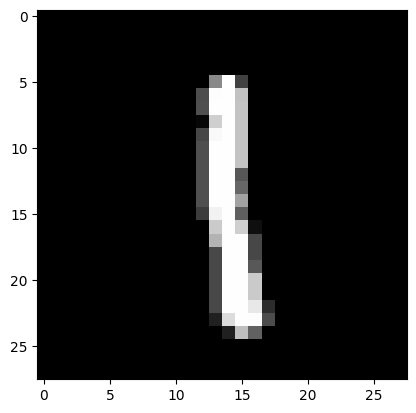

Prediction:  [7]


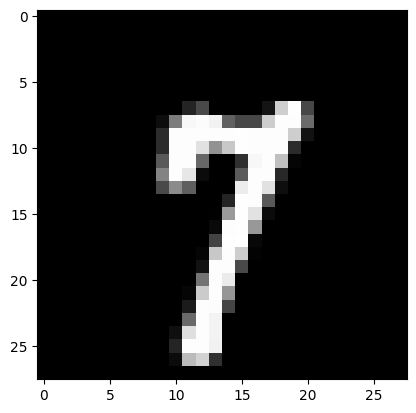

Prediction:  [4]


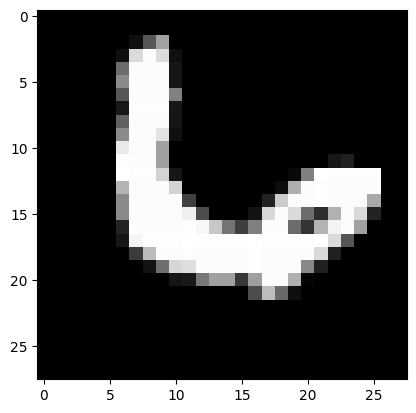

Prediction:  [0]


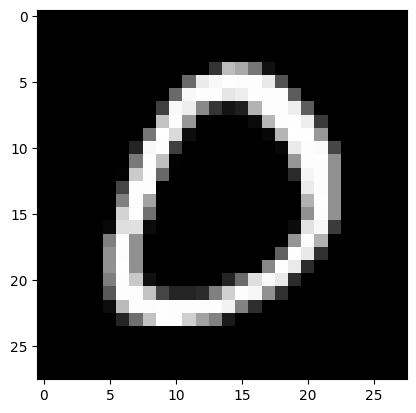

Prediction:  [4]


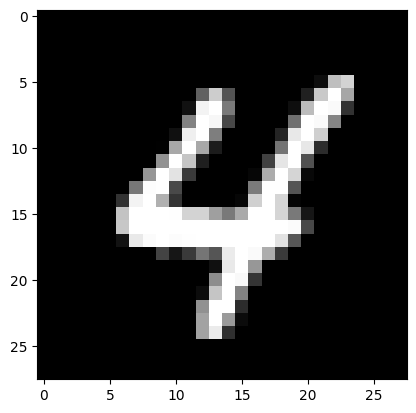

Prediction:  [2]


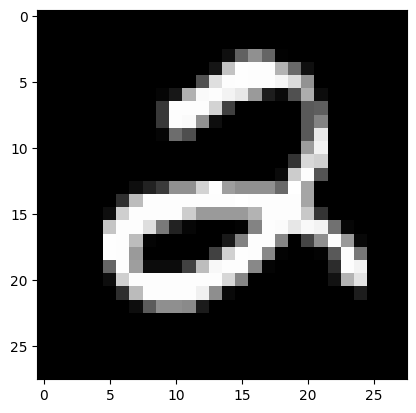

Prediction:  [4]


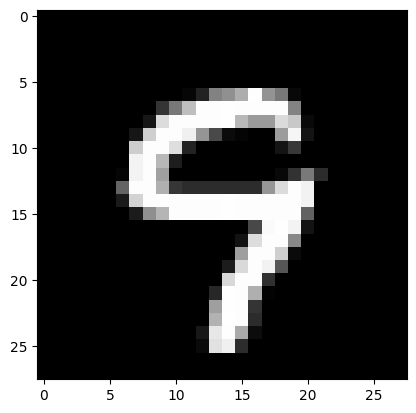

Prediction:  [4]


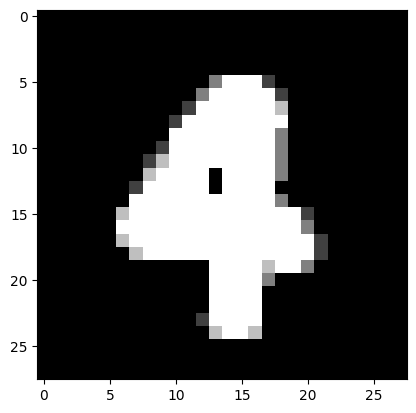

Prediction:  [1]


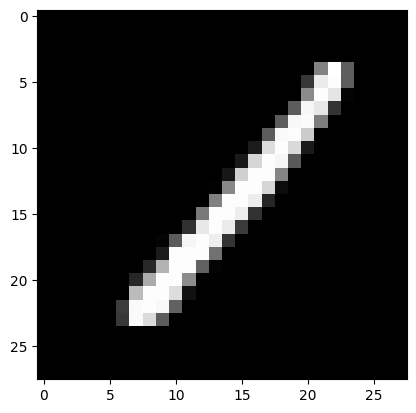

Prediction:  [1]


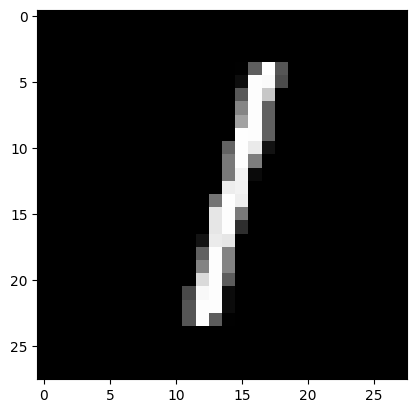

Prediction:  [3]


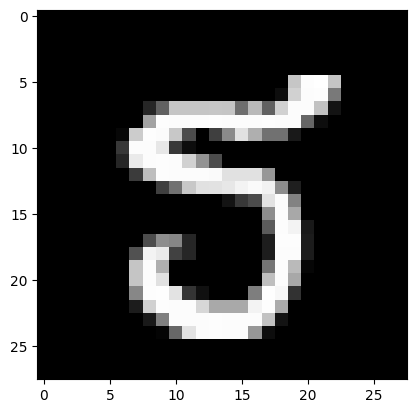

Prediction:  [1]


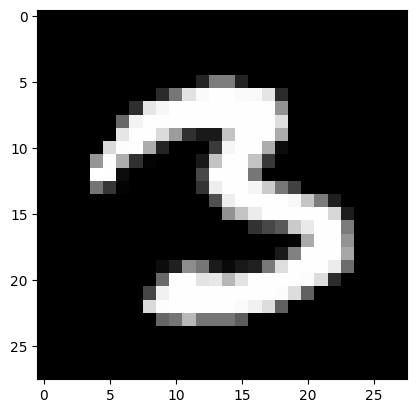

Prediction:  [3]


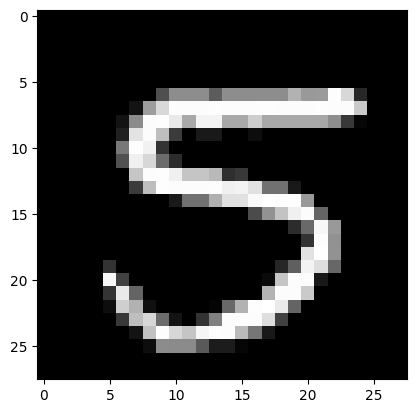

Prediction:  [7]


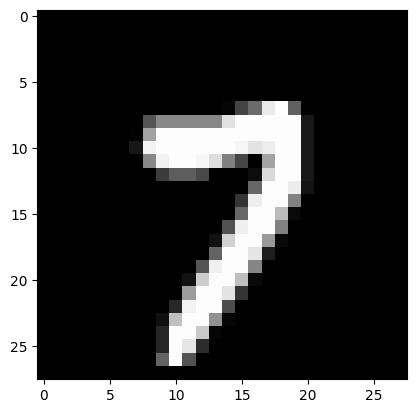

Prediction:  [4]


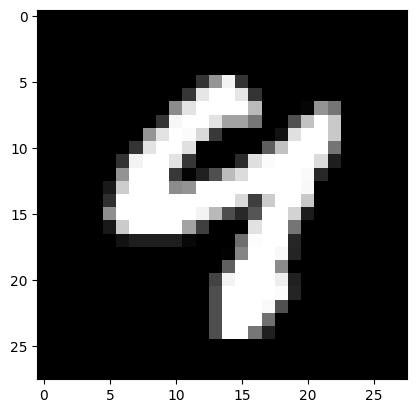

Prediction:  [7]


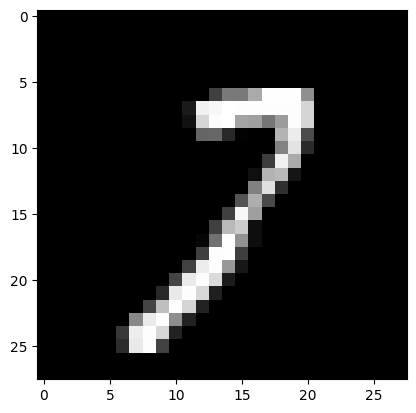

Prediction:  [6]


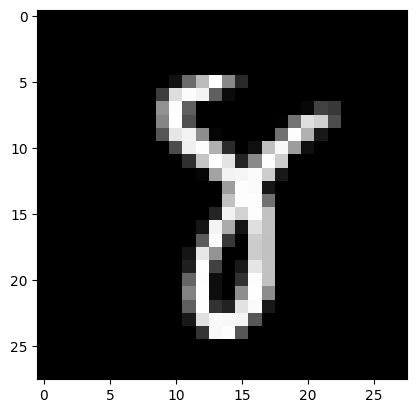

Prediction:  [3]


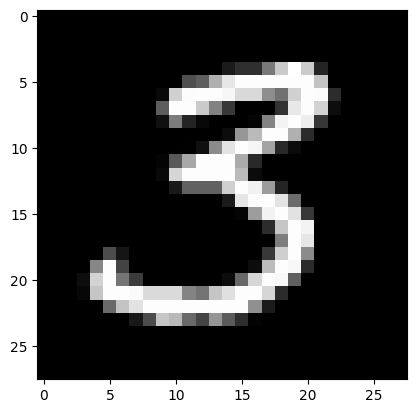

Prediction:  [2]


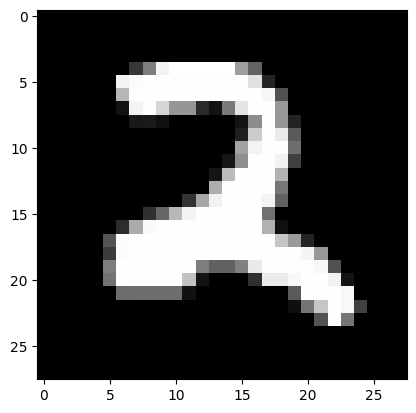

Prediction:  [7]


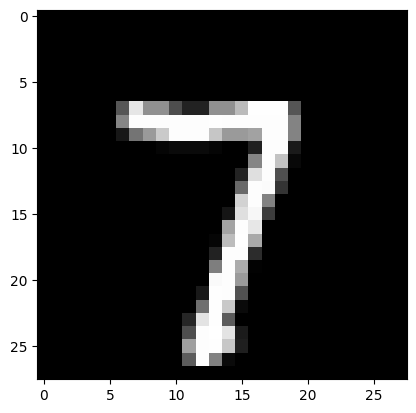

Prediction:  [2]


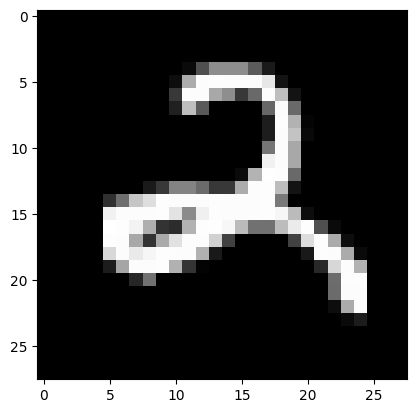

Prediction:  [0]


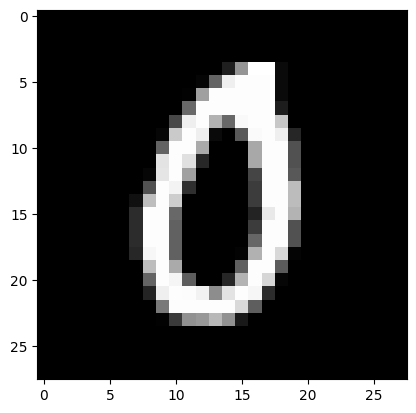

Prediction:  [4]


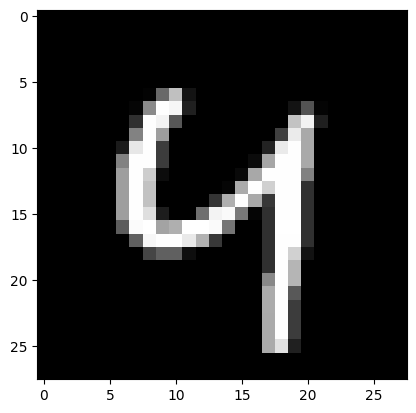

Prediction:  [7]


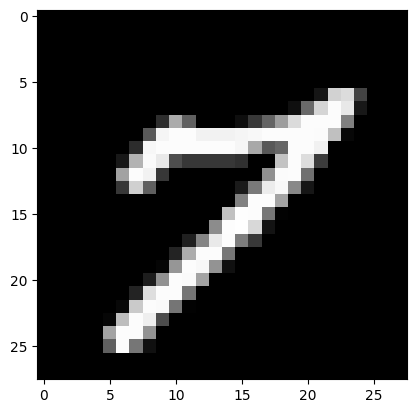

Prediction:  [1]


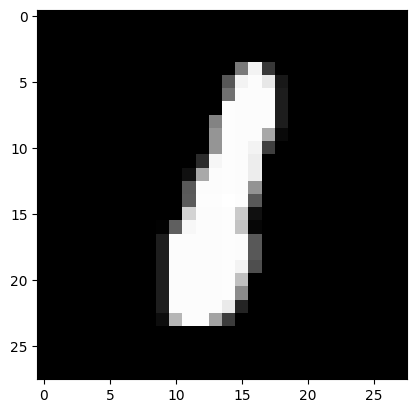

Prediction:  [0]


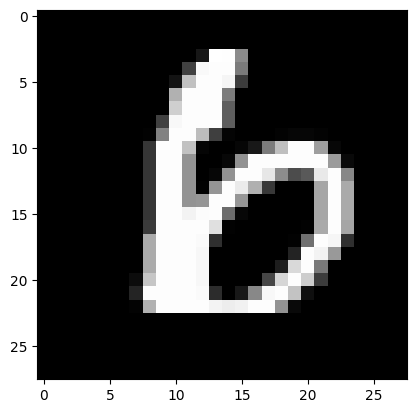

Prediction:  [4]


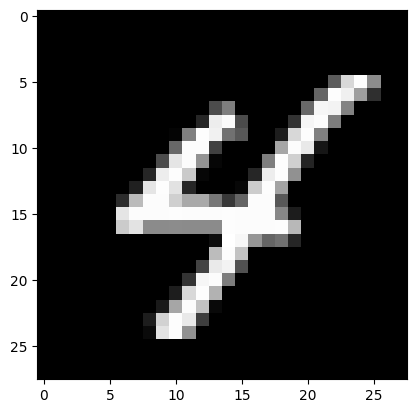

Prediction:  [5]


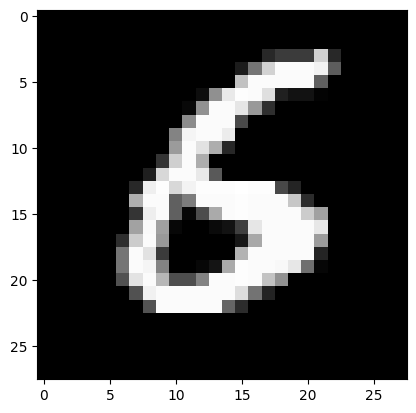

Prediction:  [1]


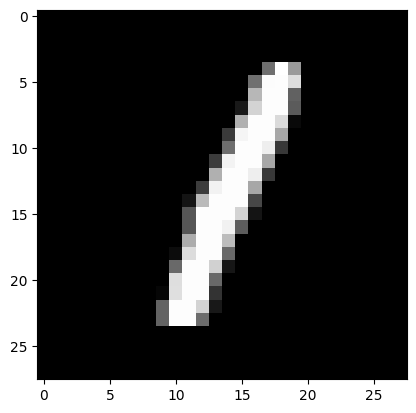

Prediction:  [3]


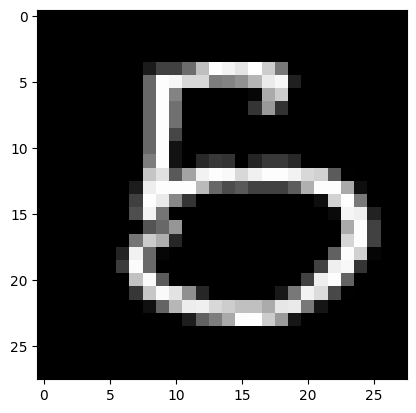

Prediction:  [7]


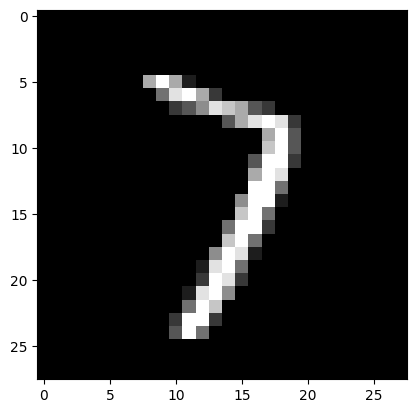

Prediction:  [3]


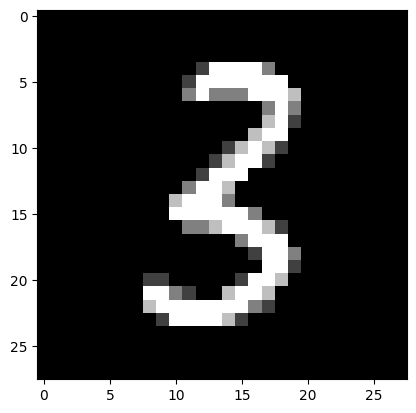

Prediction:  [0]


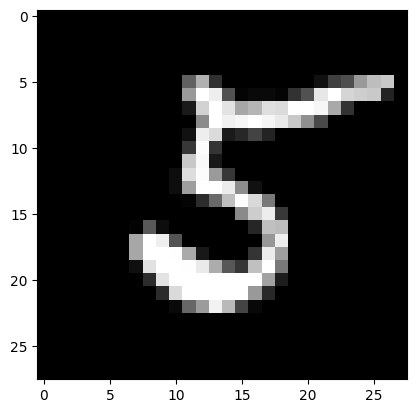

Prediction:  [7]


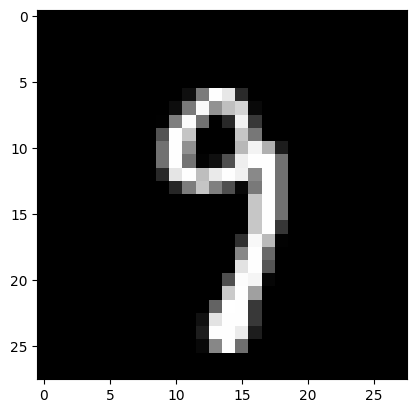

Prediction:  [4]


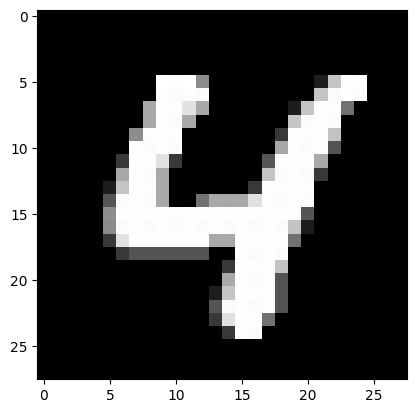

Prediction:  [7]


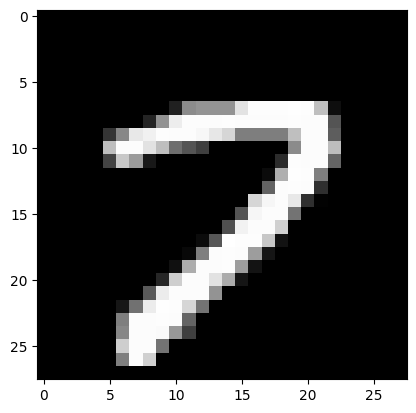

Prediction:  [4]


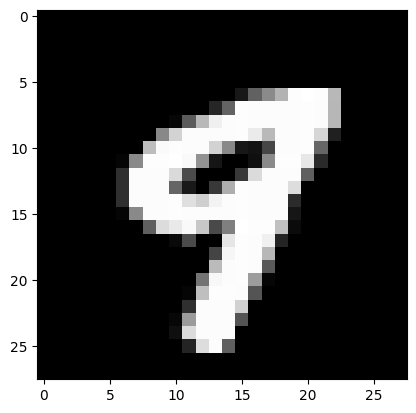

Prediction:  [0]


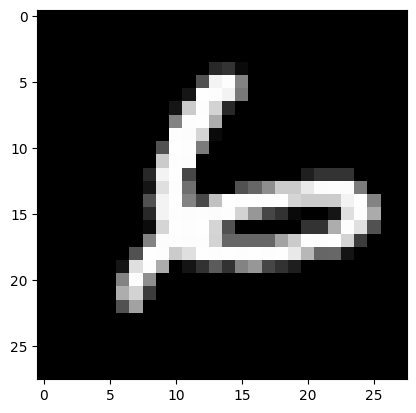

Prediction:  [6]


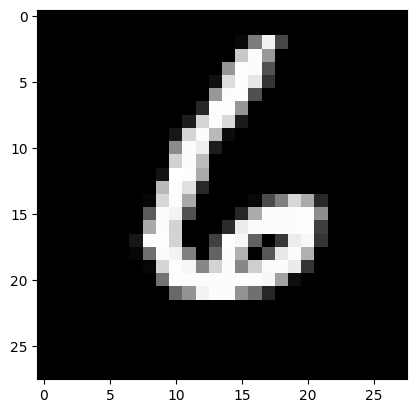

Prediction:  [1]


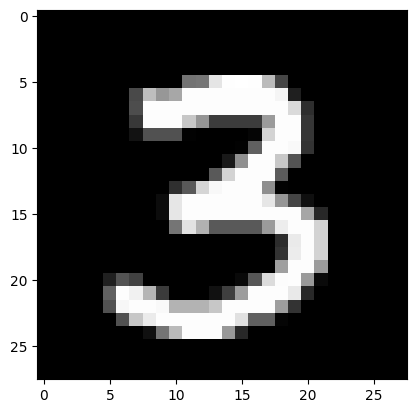

Prediction:  [1]


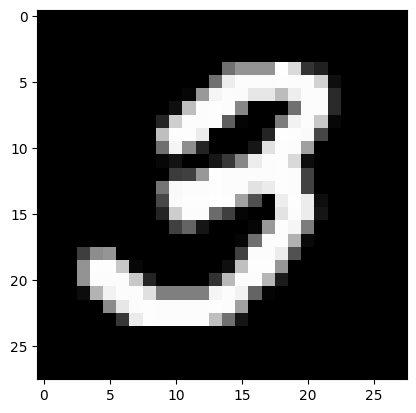

Prediction:  [2]


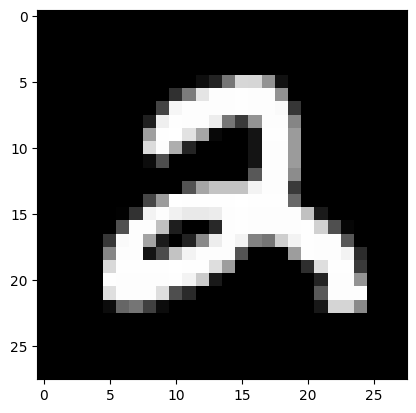

Prediction:  [1]


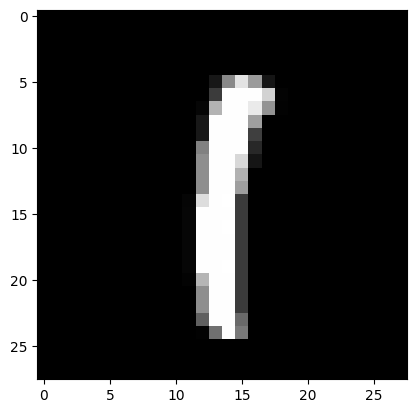

Prediction:  [4]


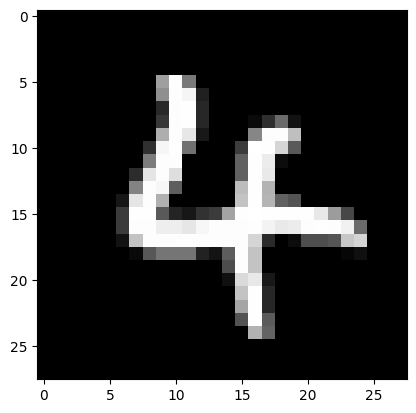

Prediction:  [4]


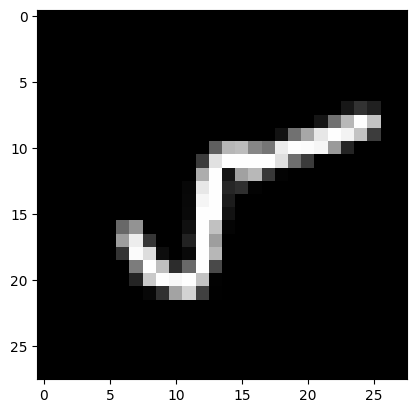

Prediction:  [2]


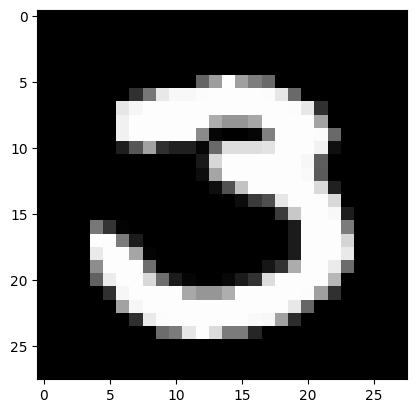

Prediction:  [7]


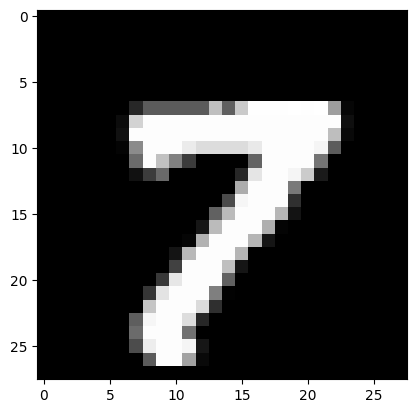

Prediction:  [7]


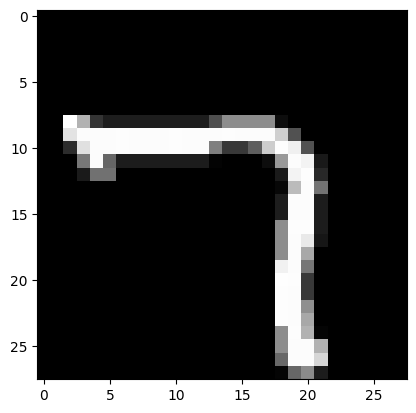

Prediction:  [3]


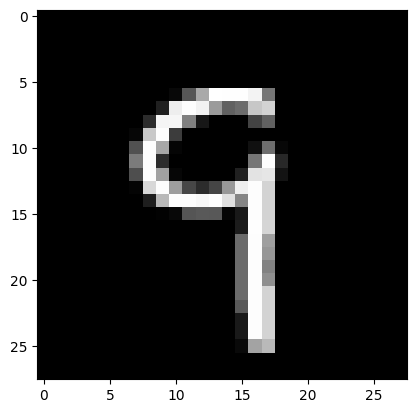

Prediction:  [3]


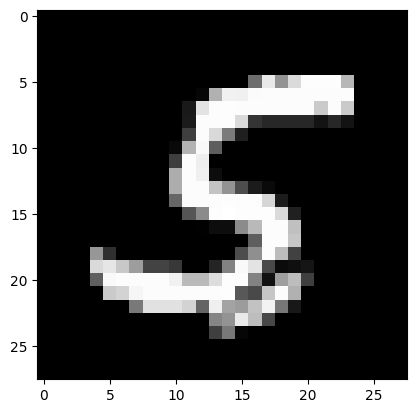

Prediction:  [6]


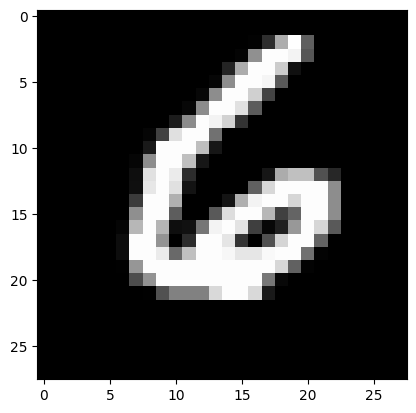

Prediction:  [2]


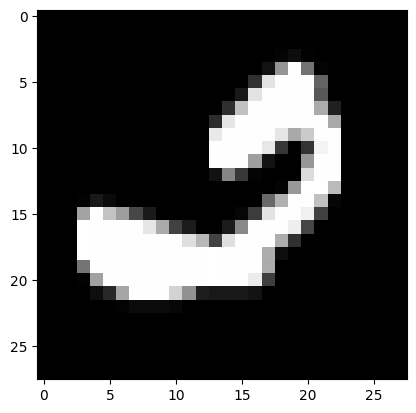

Prediction:  [6]


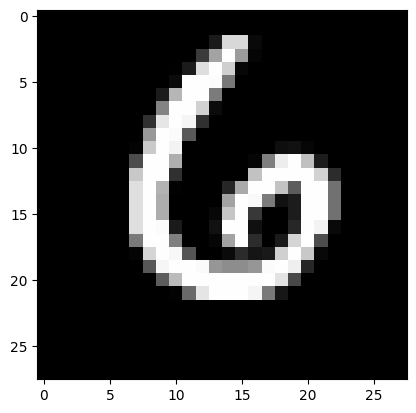

Prediction:  [1]


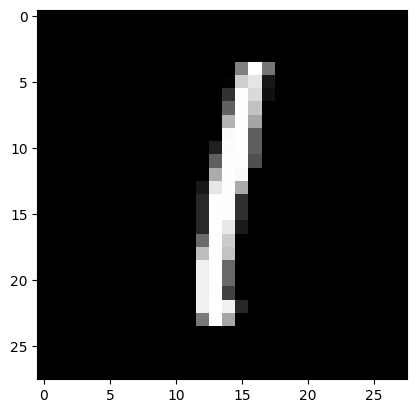

Prediction:  [0]


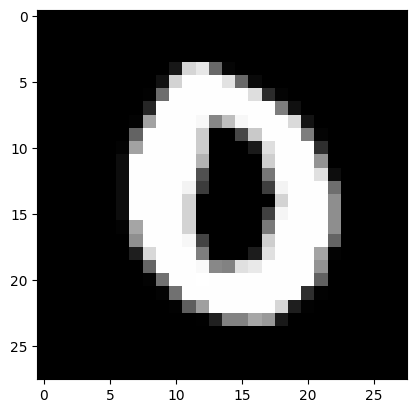

Prediction:  [3]


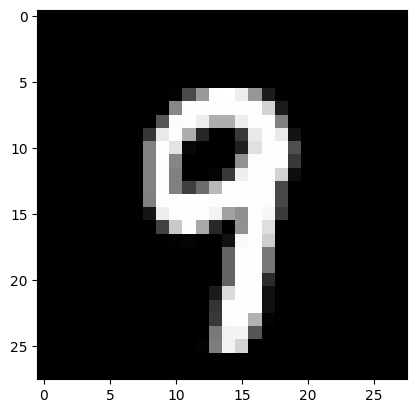

Prediction:  [2]


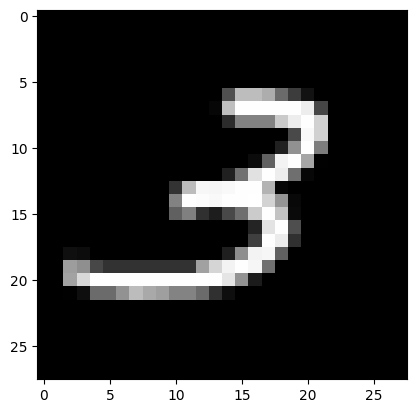

Prediction:  [2]


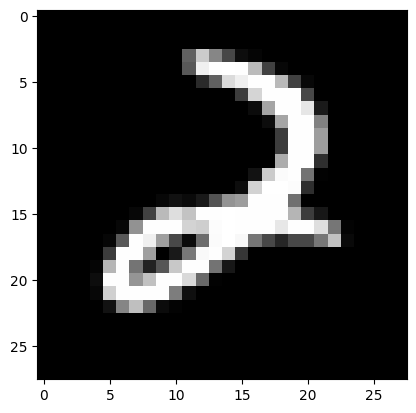

Prediction:  [4]


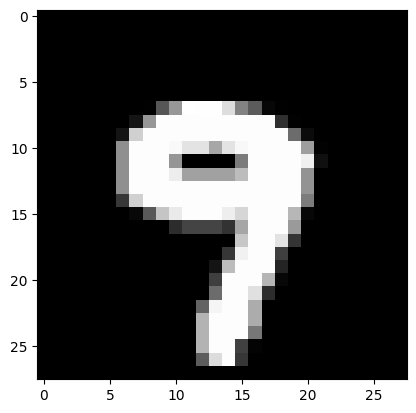

Prediction:  [2]


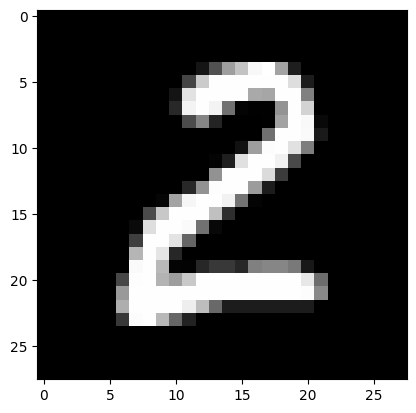

Prediction:  [2]


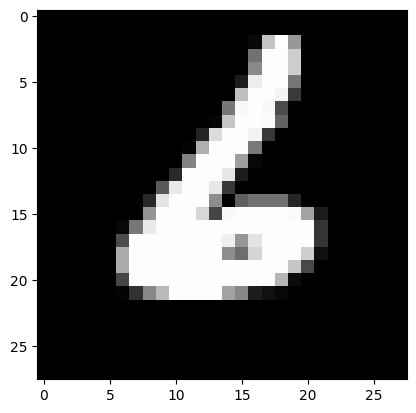

Prediction:  [7]


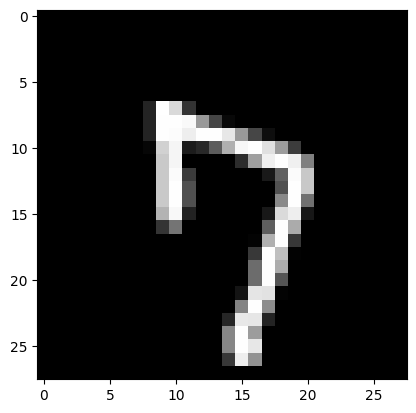

Prediction:  [5]


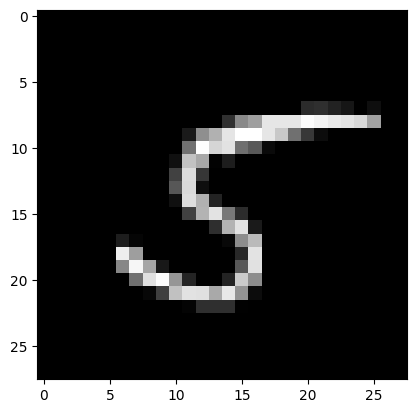

Prediction:  [2]


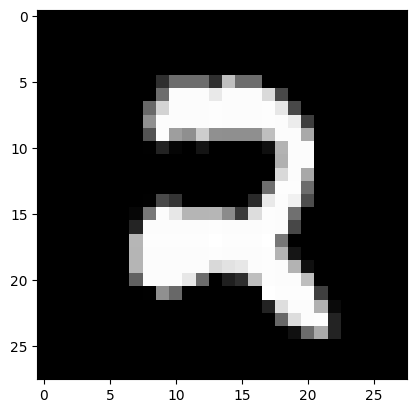

Prediction:  [3]


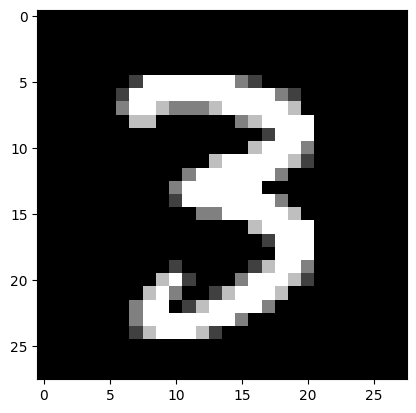

Prediction:  [2]


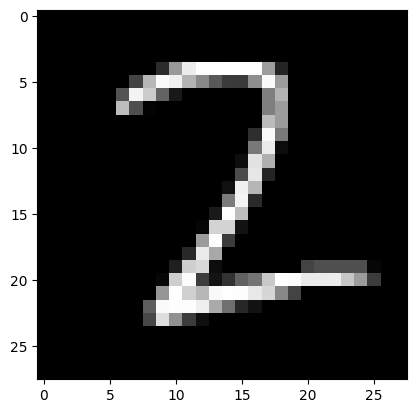

Prediction:  [1]


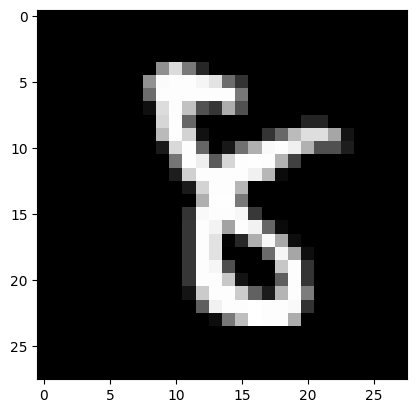

Prediction:  [2]


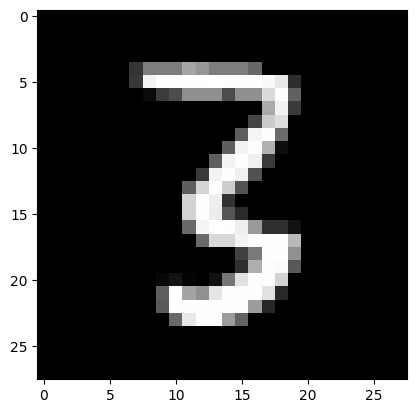

Prediction:  [0]


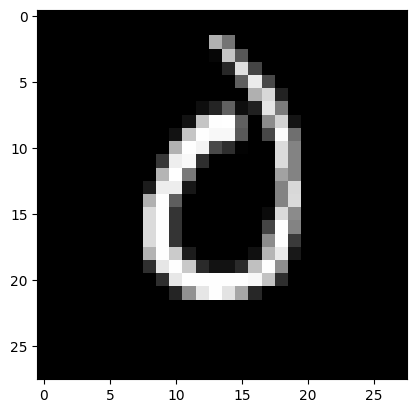

Prediction:  [2]


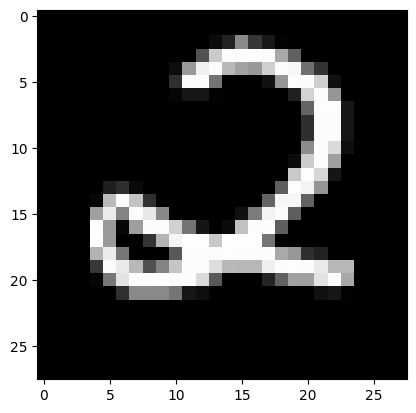

Prediction:  [7]


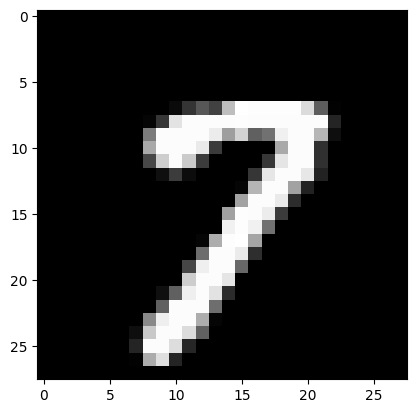

Prediction:  [4]


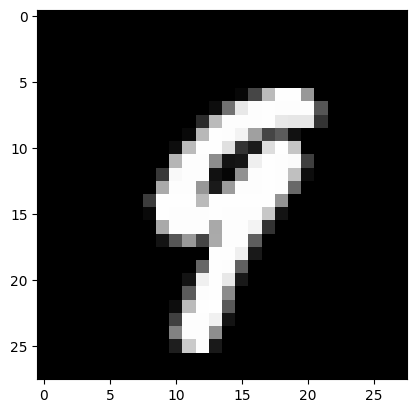

Prediction:  [4]


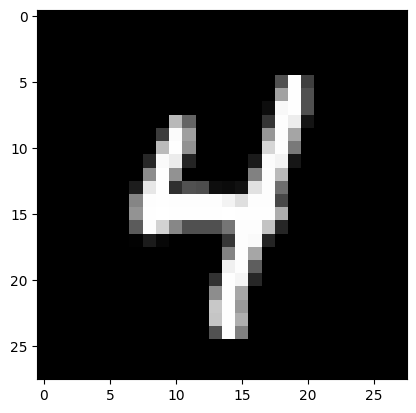

Prediction:  [0]


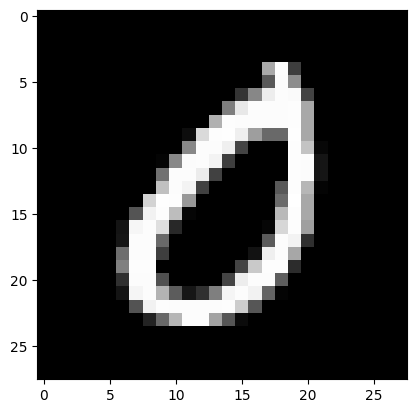

Prediction:  [9]


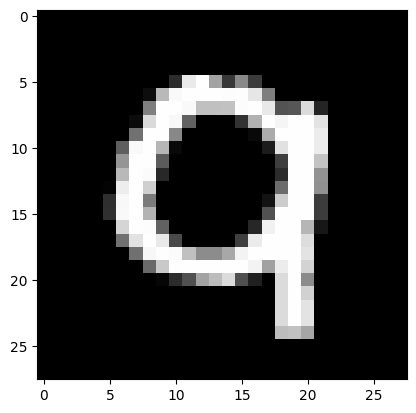

Prediction:  [3]


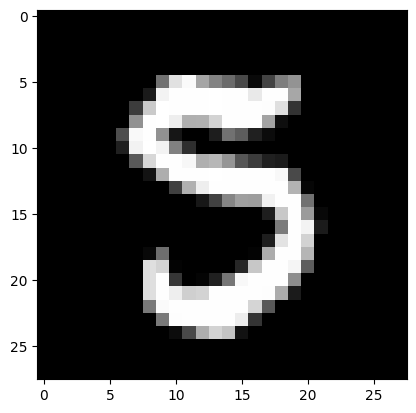

Prediction:  [1]


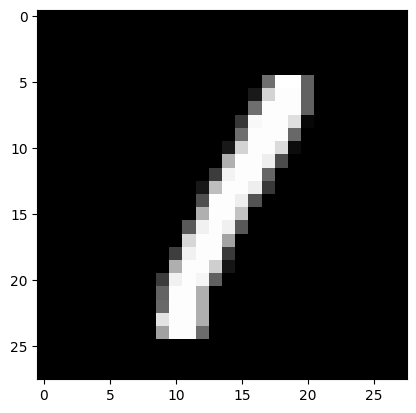

Prediction:  [2]


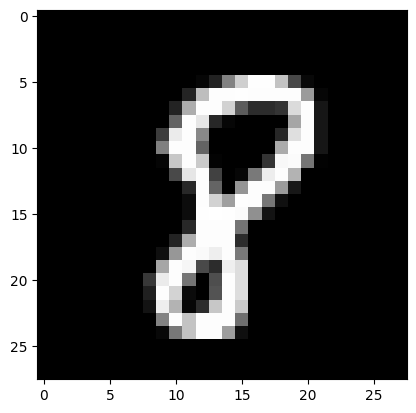

Prediction:  [2]


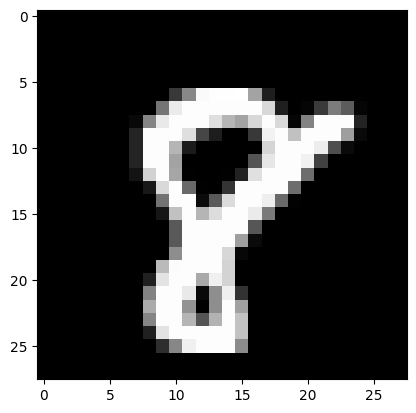

Prediction:  [3]


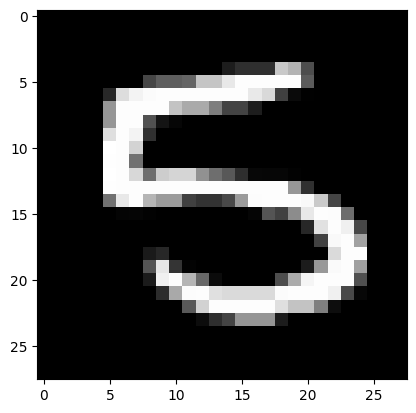

Prediction:  [3]


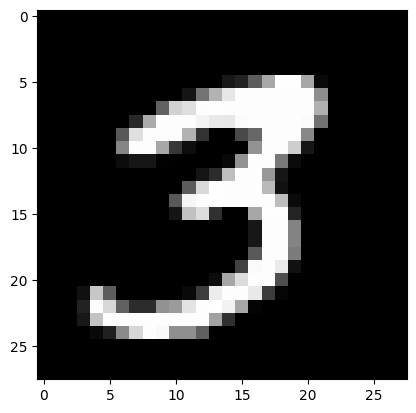

Prediction:  [2]


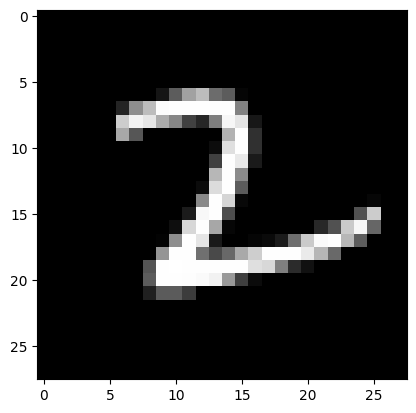

Prediction:  [4]


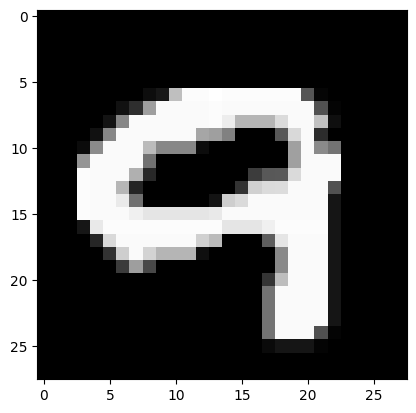

Prediction:  [2]


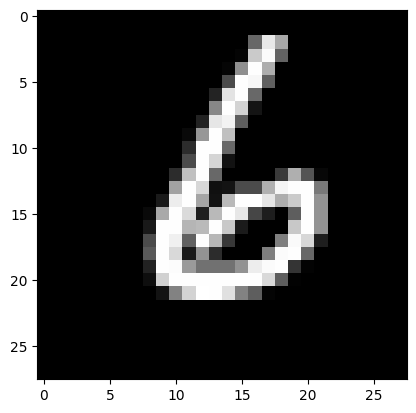

Prediction:  [7]


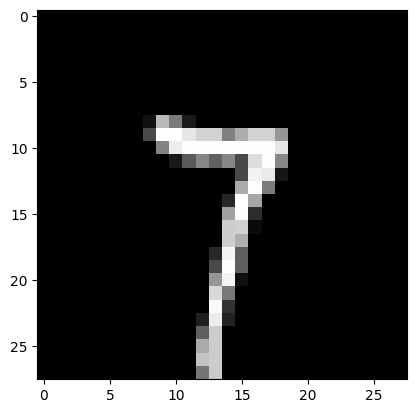

Prediction:  [0]


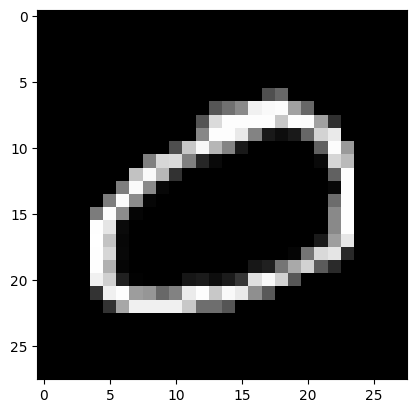

Prediction:  [2]


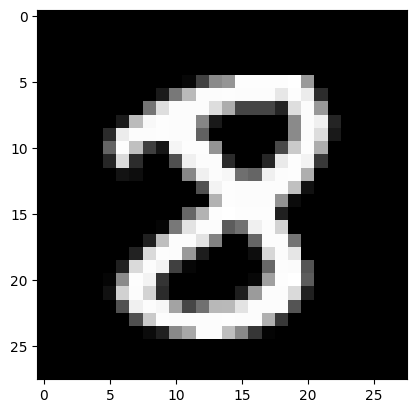

Prediction:  [0]


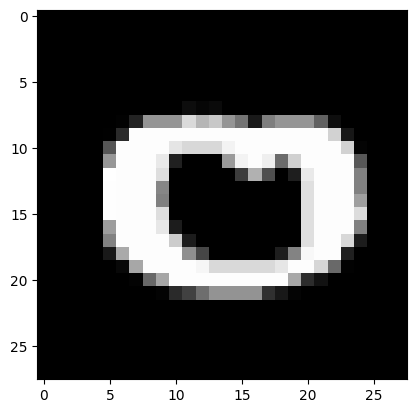

Prediction:  [7]


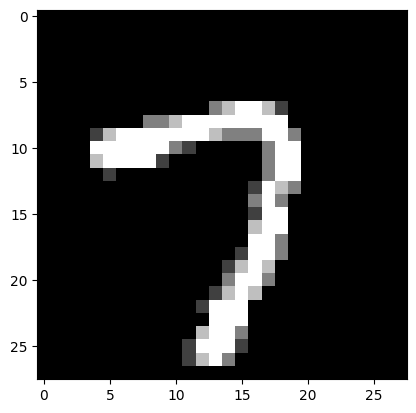

Prediction:  [2]


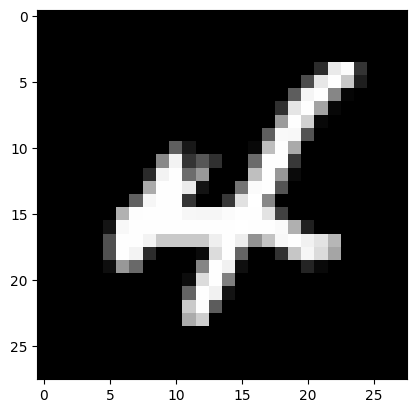

Prediction:  [0]


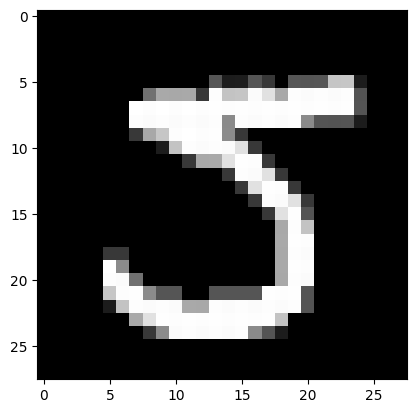

Prediction:  [2]


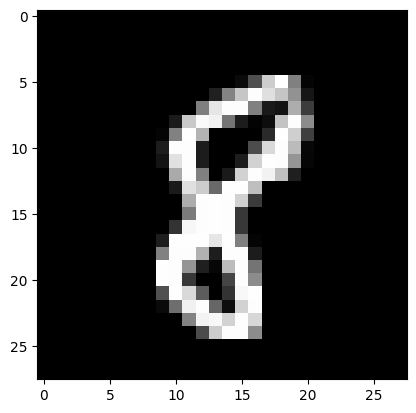

Prediction:  [7]


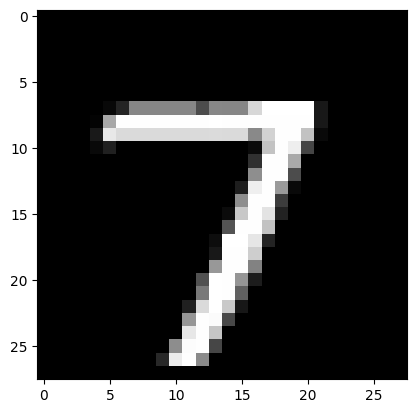

Prediction:  [3]


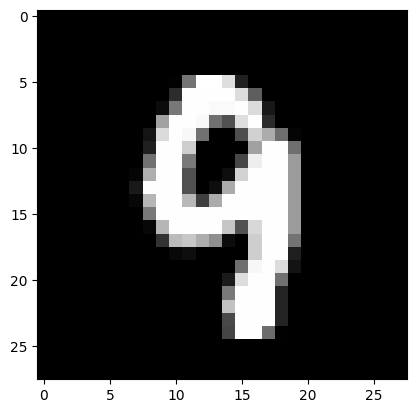

Prediction:  [7]


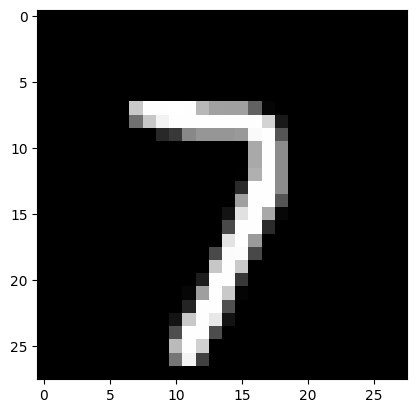

Prediction:  [7]


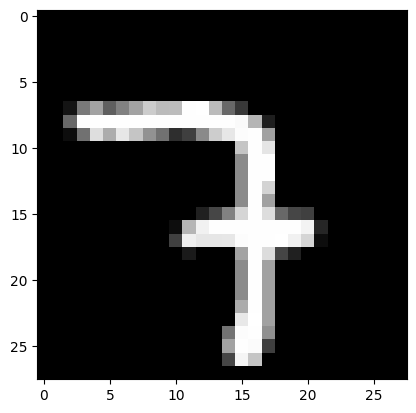

Prediction:  [0]


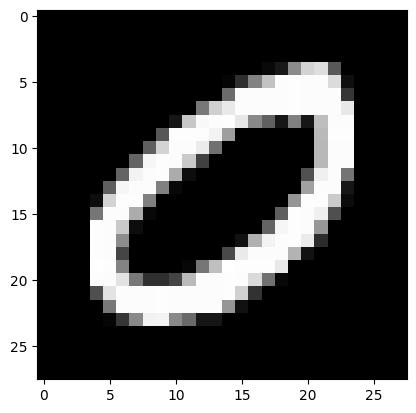

Prediction:  [3]


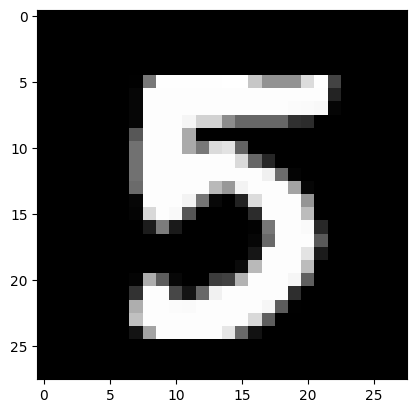

Prediction:  [2]


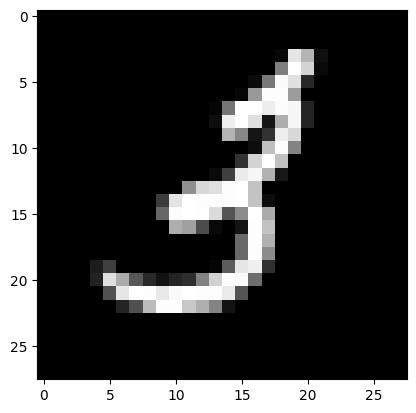

Prediction:  [0]


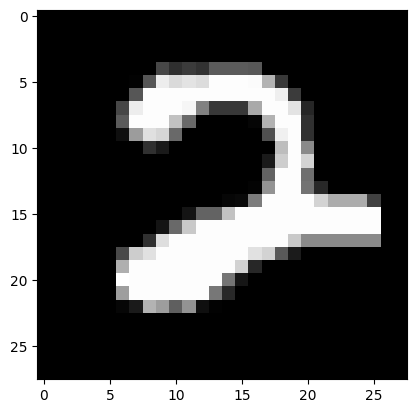

Prediction:  [1]


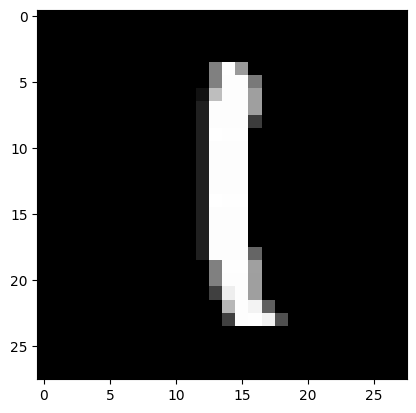

Prediction:  [9]


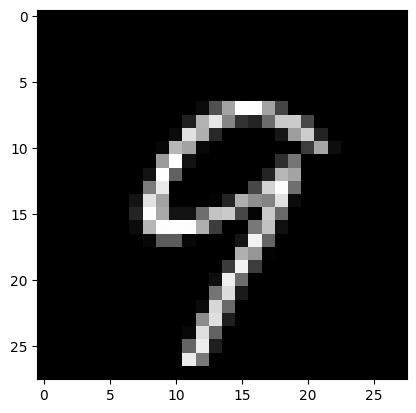

Prediction:  [0]


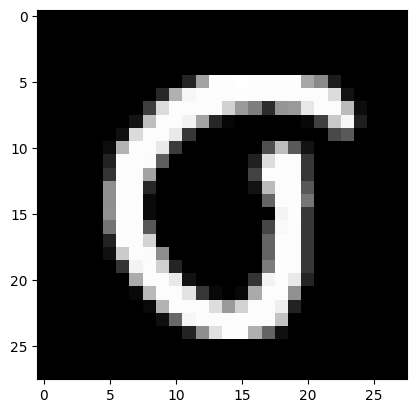

Prediction:  [2]


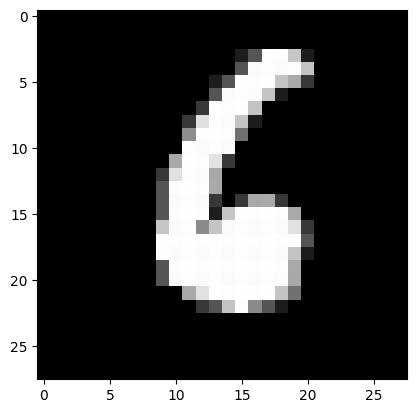

Prediction:  [2]


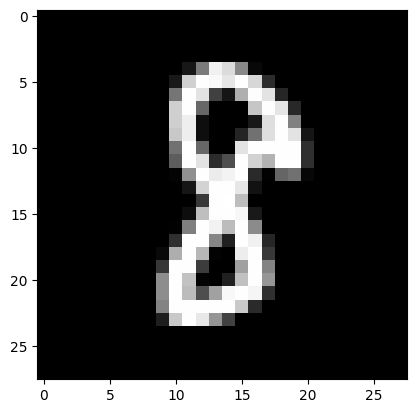

Prediction:  [3]


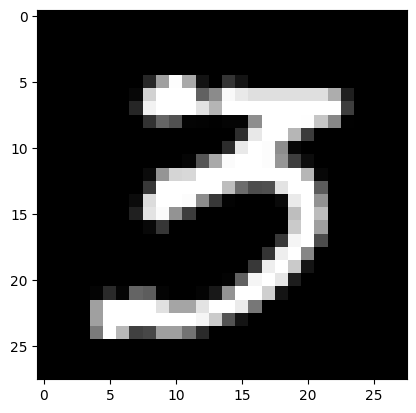

Prediction:  [4]


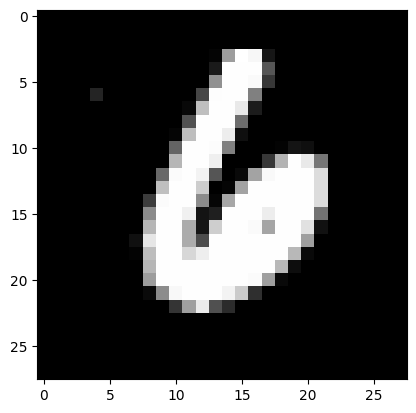

Prediction:  [2]


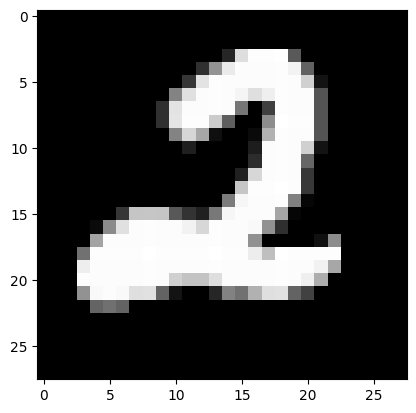

Prediction:  [2]


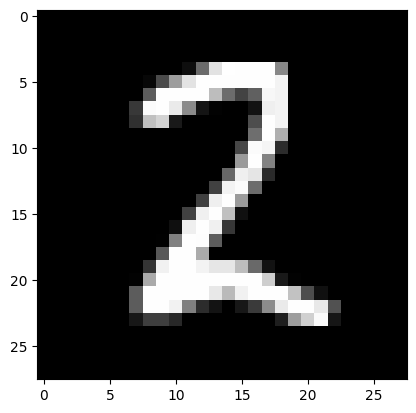

Prediction:  [4]


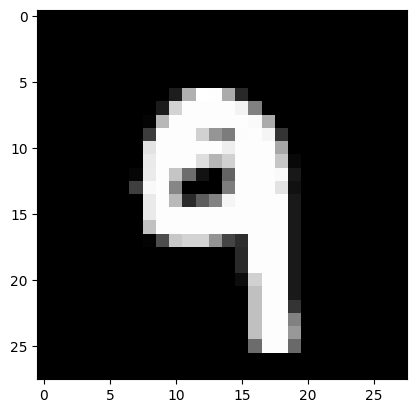

In [12]:
for i in range(500,1000):
    test_prediction2(i, W1, b1, W2, b2, W3, b3)